In [114]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gseapy as gp
import scanpy as sc

In [115]:
writeDir = "write/"

fileName = "pdacPdxMrtx"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileTotal = writeDir + fileName + 'wImm.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [116]:
adata = sc.read_h5ad(resultsFile)
adata

AnnData object with n_obs × n_vars = 5097 × 2098
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'tumor', 'scBasalScore', 'scClassicalScore', 'EMTScore', 'cellState', 'decoupler', 'zsig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'GMM_colors', 'cellState_colors', 'decoupler_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase

In [117]:
adata.uns["cellState_colors"]

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728'], dtype=object)

In [118]:
mrtxVehCmap = {"veh":'#ff7f0e',"mrtx":'#1f77b4'}

cellStateColDict = {"EMT":'#1f77b4', "basal":'#ff7f0e', "classical":'#279e68', "inter":'#d62728'}


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

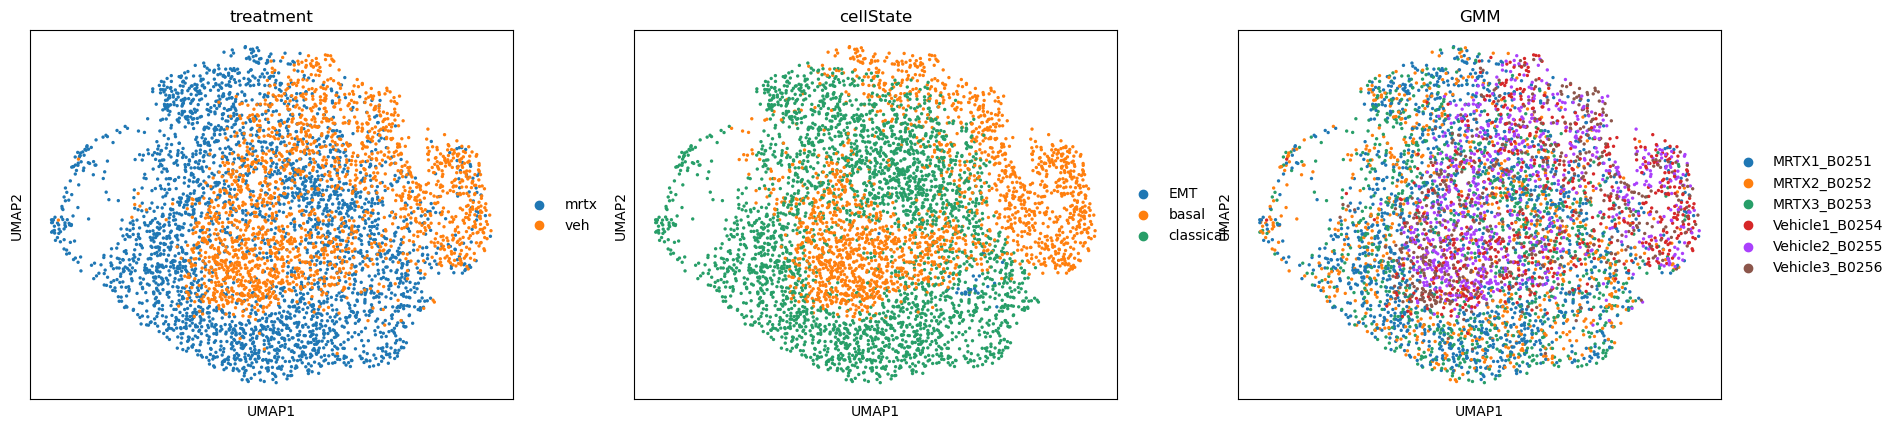

In [119]:
sc.pl.umap(adata, color=["treatment","cellState","GMM"])

In [120]:
cellstate = adata.obs.cellState

In [121]:
adata = sc.read_h5ad(resultsFileQC)
adata = adata[cellstate.index]
adata

View of AnnData object with n_obs × n_vars = 5097 × 22236
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment'

In [122]:
adata.obs["cellState"] = cellstate
adata.obs

/tmp/ipykernel_3931396/2281070606.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellState"] = cellstate


,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification,GMM,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256,treatment,cellState
AAACCCAGTACAGCGA-1-mrtx,2930.0,31.0,19.0,4347,4320,12858.0,24.540876,33.188687,41.929485,54.567997,...,5.349299e-17,0.999052,0.000948,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACCCAGTTCCTTGC-1-mrtx,1281.0,11.0,19.0,4785,4751,14625.0,20.476418,26.783155,34.919118,49.273087,...,1.122869e-11,0.999385,0.000615,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACGAACACTGAATC-1-mrtx,79.0,86.0,43.0,830,826,1117.0,20.535714,29.821429,43.928571,70.714286,...,9.075563e-02,0.876582,0.032662,MRTX2_B0252,MRTX2_B0252,NaN,NaN,NaN,mrtx,classical
AAACGAACAGGATGAC-1-mrtx,1499.0,13.0,18.0,5905,5883,22477.0,21.316210,27.897263,36.300213,49.568966,...,2.465464e-12,0.999504,0.000496,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACGCTAGTAGAGTT-1-mrtx,352.0,8.0,8.0,3979,3939,11856.0,28.390293,36.711731,45.688135,58.107314,...,7.189104e-07,0.999970,0.000030,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGAGAACCC-1-veh,NaN,NaN,NaN,5046,5011,16319.0,20.004875,26.598014,34.799829,48.632015,...,1.124192e-07,0.999991,0.000009,Vehicle3_B0256,Vehicle3_B0256,19.0,26.0,1176.0,veh,basal
TTTGGTTCATCCTAAG-1-veh,NaN,NaN,NaN,4896,4865,15075.0,16.396801,24.063182,33.262838,47.749653,...,2.228625e-16,0.999982,0.000018,Vehicle2_B0255,Vehicle2_B0255,20.0,3659.0,9.0,veh,classical
TTTGGTTGTGTACATC-1-veh,NaN,NaN,NaN,2593,2547,7451.0,30.309882,40.218114,50.738130,65.753425,...,4.537960e-04,0.999502,0.000044,Vehicle3_B0256,Vehicle3_B0256,27.0,38.0,319.0,veh,basal
TTTGGTTTCGTAGAGG-1-veh,NaN,NaN,NaN,6661,6611,31000.0,17.357580,26.353396,36.565819,50.672675,...,1.308902e-16,0.999960,0.000040,Vehicle2_B0255,Vehicle2_B0255,26.0,3877.0,21.0,veh,basal


In [123]:
adata.obs.groupby('cellState')['treatment'].value_counts()

/tmp/ipykernel_3931396/2804383007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('cellState')['treatment'].value_counts()


cellState  treatment
EMT        mrtx           16
           veh             8
basal      veh          1410
           mrtx          551
classical  mrtx         2614
           veh           498
Name: count, dtype: int64

In [124]:
adata.obs['treatmentNum'] = pd.Categorical(adata.obs['treatment'], categories=["veh","mrtx"], ordered=True)
indices = adata.obs.sort_values(['cellState', 'treatmentNum']).index
adata = adata[indices,:]
cellStateCols = [cellStateColDict[cs] for cs in adata.obs.cellState]

In [182]:
def plotGseaHeat(i, res):
    genes = res.res2d.Lead_genes.iloc[i].split(";")[:25]
    geHeat = res.heatmat.loc[genes]
    geHeatColCol = [mrtxVehCmap[barc.split("-")[2]] for barc in geHeat.columns]
    
    cmap = sns.clustermap(data = geHeat,
                        #col_colors=[geHeatColCol,cellStateCols],
                        col_colors=geHeatColCol,

                          cmap="Reds",
                        row_cluster=False, col_cluster=False,cbar_pos=None,
                        xticklabels=False)
    
    cmap.ax_heatmap.set_ylabel("genes")
    cmap.ax_heatmap.set_xlabel('Cells')
    cmap.fig.suptitle(res.res2d.Term.iloc[i], fontsize=16)

In [126]:
bdata = adata.copy()#[adata.obs.cellState == "basal"].copy()

bdata.var['mt'] = bdata.var_names.str.startswith('mt-') 
bdata = bdata[:, np.logical_not(bdata.var.mt)]
bdata.var_names = [g.upper() for g in bdata.var_names]
bdata

AnnData object with n_obs × n_vars = 5097 × 22236
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment', 'cellState', 'treatmentNum'
    var: 'mt'

In [127]:
hallmarks = {             
    
 "---> SPDE" :["SPDEF","FOXA3","ERN2","AGR2","GCNT3","CLCA1","MUC5AC","GKN3","GKN2","GKN1","TFF2","TFF1"],
"upOnKras": ["EMP1","ADCK1","C3orf38","BIRC3","UNKL","CEP128","JAZF1","MND1","ANKRD22","FEN1","C17orf58","PIP4K2A","ANAPC16","GPR19","LRWD1","NCR3LG1","ACTA2","ACOX2","CDC25A","TGFBR2","ERGIC2","CCDC117","WEE1","WT1","SEPTIN8","VEGFC","CD83","RMND5A","TMED2","MZT1","MSL3","EFR3A","DKK1","FEZ2","C4orf46","OGFOD1","E2F7","KBTBD8","UBE2K","GPR3","SPRED2","NUF2","SERPINB8","CPNE8","ITGB8","MTMR9","RHEBL1","OTUD6B","TMEM131","WDR45B","TMA16","GOLM2","UBASH3B","STEAP1","HSBP1","FABP5","DENND6A","KIF2C","MYBL1","FRRS1","QARS1","CCND1","CD274","TLR6","BATF3","PLEKHA3","EREG","ITGA2","SPRY4","RGS2","CALB2","ETV4","CBFB","GSDMC","ETV5","RAB1A","PCNX4","WDR12","MCTP1","REXO5","FOSL1","RAP1B","TOX","NCEH1","RAD51","SCML2","TNS4","DUSP6","ITGB3BP","SETD9","NAV3","TMEM156","GALNT3","SCML1","HMGA2","PTX3","STARD3NL","ETV1","NT5E","KRAS"],
"downOnKras": ["NPPC","SMTNL2","KCNK3","CHPF","EXOC3L1","EMP2","HIPK3","SCN1B","STEAP3","PXYLP1","PYGM","TP53INP1","ATP6V1B1","CLIC3","IL10RB","ADRA2C","SPTBN4","TMEM229B","SAMD11","ISM2","SDK2","ISLR","GPR37L1","KCNQ1","PRR15L","TLN1","FGFR3","HS6ST1","AP3B2","ZDHHC1","ANO10","TMEM170B","RAB3C","SCAMP1","LYPD2","NUDT15","MAPK8IP2","GDF11","NTF4","HSPE1-MOB4","THG1L","SOX18","LYNX1-SLURP2","CPLX1","SAR1B","ALDH3B2","TMEM191B","SLC41A1","MAPK3","ZNF467","GABRD","ELOVL7","SLC29A4","ZDHHC20","MEIS3","TMEM151A","PALM","TNXB","IQSEC1","DHX40","NYNRIN","LSM14A","APC2","FAM171B","DAPK2","HCN2","LY6D","LRFN1","DISC1","CARMIL3","DEPP1","NYAP1","RASD2","SNPH","ATP1A3","YPEL2","CKMT1B","WIPF3","MOGS","ERMP1","EHD3","KCNH3","SS18L1","TMEM198","BSN","DUSP8","NATD1","GPRC5C","GOLGA4","SMIM1","TJP3","RHOB","PRRT2","TOP1MT","NT5DC2","MAPK8IP1","RAB26","PANK3","LYNX1","TMEM184B"],

"ADIPOGENESIS" : ['ABCA1', 'ABCB8', 'ACAA2', 'ACADL', 'ACADM', 'ACADS', 'ACLY', 'ACO2', 'ACOX1', 'ADCY6', 'ADIG', 'ADIPOQ', 'ADIPOR2', 'AGPAT3', 'AIFM1', 'AK2', 'ALDH2', 'ALDOA', 'ANGPT1', 'ANGPTL4', 'APLP2', 'APOE', 'ARAF', 'ARL4A', 'ATL2', 'ATP1B3', 'ATP5PO', 'BAZ2A', 'BCKDHA', 'BCL2L13', 'BCL6', 'C3', 'CAT', 'CAVIN1', 'CAVIN2', 'CCNG2', 'CD151', 'CD302', 'CD36', 'CDKN2C', 'CHCHD10', 'CHUK', 'CIDEA', 'CMBL', 'CMPK1', 'COL15A1', 'COL4A1', 'COQ3', 'COQ5', 'COQ9', 'COX6A1', 'COX7B', 'COX8A', 'CPT2', 'CRAT', 'CS', 'CYC1', 'CYP4B1', 'DBT', 'DDT', 'DECR1', 'DGAT1', 'DHCR7', 'DHRS7', 'DHRS7B', 'DLAT', 'DLD', 'DNAJB9', 'DNAJC15', 'DRAM2', 'ECH1', 'ECHS1', 'ELMOD3', 'ELOVL6', 'ENPP2', 'EPHX2', 'ESRRA', 'ESYT1', 'ETFB', 'FABP4', 'FAH', 'FZD4', 'G3BP2', 'GADD45A', 'GBE1', 'GHITM', 'GPAM', 'GPAT4', 'GPD2', 'GPHN', 'GPX3', 'GPX4', 'GRPEL1', 'HADH', 'HIBCH', 'HSPB8', 'IDH1', 'IDH3A', 'IDH3G', 'IFNGR1', 'IMMT', 'ITGA7', 'ITIH5', 'ITSN1', 'JAGN1', 'LAMA4', 'LEP', 'LIFR', 'LIPE', 'LPCAT3', 'LPL', 'LTC4S', 'MAP4K3', 'MCCC1', 'MDH2', 'ME1', 'MGLL', 'MGST3', 'MIGA2', 'MRAP', 'MRPL15', 'MTARC2', 'MTCH2', 'MYLK', 'NABP1', 'NDUFA5', 'NDUFAB1', 'NDUFB7', 'NDUFS3', 'NKIRAS1', 'NMT1', 'OMD', 'ORM1', 'PDCD4', 'PEMT', 'PEX14', 'PFKFB3', 'PFKL', 'PGM1', 'PHLDB1', 'PHYH', 'PIM3', 'PLIN2', 'POR', 'PPARG', 'PPM1B', 'PPP1R15B', 'PRDX3', 'PREB', 'PTCD3', 'PTGER3', 'QDPR', 'RAB34', 'REEP5', 'REEP6', 'RETN', 'RETSAT', 'RIOK3', 'RMDN3', 'RNF11', 'RREB1', 'RTN3', 'SAMM50', 'SCARB1', 'SCP2', 'SDHB', 'SDHC', 'SLC19A1', 'SLC1A5', 'SLC25A1', 'SLC25A10', 'SLC27A1', 'SLC5A6', 'SLC66A3', 'SNCG', 'SOD1', 'SORBS1', 'SOWAHC', 'SPARCL1', 'SQOR', 'SSPN', 'STAT5A', 'STOM', 'SUCLG1', 'SULT1A1', 'TALDO1', 'TANK', 'TKT', 'TOB1', 'TST', 'UBC', 'UBQLN1', 'UCK1', 'UCP2', 'UQCR10', 'UQCR11', 'UQCRC1', 'UQCRQ', 'VEGFB', 'YWHAG'],
"ALLOGRAFT_REJECTION" : ['AARS1', 'ABCE1', 'ABI1', 'ACHE', 'ACVR2A', 'AKT1', 'APBB1', 'B2M', 'BCAT1', 'BCL10', 'BCL3', 'BRCA1', 'C2', 'CAPG', 'CARTPT', 'CCL11', 'CCL13', 'CCL19', 'CCL2', 'CCL22', 'CCL4', 'CCL5', 'CCL7', 'CCND2', 'CCND3', 'CCR1', 'CCR2', 'CCR5', 'CD1D', 'CD2', 'CD247', 'CD28', 'CD3D', 'CD3E', 'CD3G', 'CD4', 'CD40', 'CD40LG', 'CD47', 'CD7', 'CD74', 'CD79A', 'CD80', 'CD86', 'CD8A', 'CD8B', 'CD96', 'CDKN2A', 'CFP', 'CRTAM', 'CSF1', 'CSK', 'CTSS', 'CXCL13', 'CXCL9', 'CXCR3', 'DARS1', 'DEGS1', 'DYRK3', 'EGFR', 'EIF3A', 'EIF3D', 'EIF3J', 'EIF4G3', 'EIF5A', 'ELANE', 'ELF4', 'EREG', 'ETS1', 'F2', 'F2R', 'FAS', 'FASLG', 'FCGR2B', 'FGR', 'FLNA', 'FYB1', 'GALNT1', 'GBP2', 'GCNT1', 'GLMN', 'GPR65', 'GZMA', 'GZMB', 'HCLS1', 'HDAC9', 'HIF1A', 'HLA-A', 'HLA-DMA', 'HLA-DMB', 'HLA-DOA', 'HLA-DOB', 'HLA-DQA1', 'HLA-DRA', 'HLA-E', 'HLA-G', 'ICAM1', 'ICOSLG', 'IFNAR2', 'IFNG', 'IFNGR1', 'IFNGR2', 'IGSF6', 'IKBKB', 'IL10', 'IL11', 'IL12A', 'IL12B', 'IL12RB1', 'IL13', 'IL15', 'IL16', 'IL18', 'IL18RAP', 'IL1B', 'IL2', 'IL27RA', 'IL2RA', 'IL2RB', 'IL2RG', 'IL4', 'IL4R', 'IL6', 'IL7', 'IL9', 'INHBA', 'INHBB', 'IRF4', 'IRF7', 'IRF8', 'ITGAL', 'ITGB2', 'ITK', 'JAK2', 'KLRD1', 'KRT1', 'LCK', 'LCP2', 'LIF', 'LTB', 'LY75', 'LY86', 'LYN', 'MAP3K7', 'MAP4K1', 'MBL2', 'MMP9', 'MRPL3', 'MTIF2', 'NCF4', 'NCK1', 'NCR1', 'NLRP3', 'NME1', 'NOS2', 'NPM1', 'PF4', 'PRF1', 'PRKCB', 'PRKCG', 'PSMB10', 'PTPN6', 'PTPRC', 'RARS1', 'RIPK2', 'RPL39', 'RPL3L', 'RPL9', 'RPS19', 'RPS3A', 'RPS9', 'SIT1', 'SOCS1', 'SOCS5', 'SPI1', 'SRGN', 'ST8SIA4', 'STAB1', 'STAT1', 'STAT4', 'TAP1', 'TAP2', 'TAPBP', 'TGFB1', 'TGFB2', 'THY1', 'TIMP1', 'TLR1', 'TLR2', 'TLR3', 'TLR6', 'TNF', 'TPD52', 'TRAF2', 'TRAT1', 'UBE2D1', 'UBE2N', 'WARS1', 'WAS', 'ZAP70'],
"ANDROGEN_RESPONSE" : ['ABCC4', 'ABHD2', 'ACSL3', 'ACTN1', 'ADAMTS1', 'ADRM1', 'AKAP12', 'AKT1', 'ALDH1A3', 'ANKH', 'APPBP2', 'ARID5B', 'AZGP1', 'B2M', 'B4GALT1', 'BMPR1B', 'CAMKK2', 'CCND1', 'CCND3', 'CDC14B', 'CDK6', 'CENPN', 'DBI', 'DHCR24', 'DNAJB9', 'ELK4', 'ELL2', 'ELOVL5', 'FADS1', 'FKBP5', 'GNAI3', 'GPD1L', 'GSR', 'GUCY1A1', 'H1-0', 'HERC3', 'HMGCR', 'HMGCS1', 'HOMER2', 'HPGD', 'HSD17B14', 'IDI1', 'INPP4B', 'INSIG1', 'IQGAP2', 'ITGAV', 'KLK2', 'KLK3', 'KRT19', 'KRT8', 'LIFR', 'LMAN1', 'MAF', 'MAK', 'MAP7', 'MERTK', 'MYL12A', 'NCOA4', 'NDRG1', 'NGLY1', 'NKX3-1', 'PA2G4', 'PDLIM5', 'PGM3', 'PIAS1', 'PLPP1', 'PMEPA1', 'PTK2B', 'PTPN21', 'RAB4A', 'RPS6KA3', 'RRP12', 'SAT1', 'SCD', 'SEC24D', 'SELENOP', 'SGK1', 'SLC26A2', 'SLC38A2', 'SMS', 'SORD', 'SPCS3', 'SPDEF', 'SRF', 'SRP19', 'STEAP4', 'STK39', 'TARP', 'TMEM50A', 'TMPRSS2', 'TNFAIP8', 'TPD52', 'TSC22D1', 'UAP1', 'UBE2I', 'UBE2J1', 'VAPA', 'XRCC5', 'XRCC6', 'ZBTB10', 'ZMIZ1'],
"ANGIOGENESIS" : ['APOH', 'APP', 'CCND2', 'COL3A1', 'COL5A2', 'CXCL6', 'FGFR1', 'FSTL1', 'ITGAV', 'JAG1', 'JAG2', 'KCNJ8', 'LPL', 'LRPAP1', 'LUM', 'MSX1', 'NRP1', 'OLR1', 'PDGFA', 'PF4', 'PGLYRP1', 'POSTN', 'PRG2', 'PTK2', 'S100A4', 'SERPINA5', 'SLCO2A1', 'SPP1', 'STC1', 'THBD', 'TIMP1', 'TNFRSF21', 'VAV2', 'VCAN', 'VEGFA', 'VTN'],
"APICAL_JUNCTION" : ['ACTA1', 'ACTB', 'ACTC1', 'ACTG1', 'ACTG2', 'ACTN1', 'ACTN2', 'ACTN3', 'ACTN4', 'ADAM15', 'ADAM23', 'ADAM9', 'ADAMTS5', 'ADRA1B', 'AKT2', 'AKT3', 'ALOX15B', 'AMH', 'AMIGO1', 'AMIGO2', 'ARHGEF6', 'ARPC2', 'ATP1A3', 'B4GALT1', 'BAIAP2', 'BMP1', 'CADM2', 'CADM3', 'CALB2', 'CAP1', 'CD209', 'CD274', 'CD276', 'CD34', 'CD86', 'CD99', 'CDH1', 'CDH11', 'CDH15', 'CDH3', 'CDH4', 'CDH6', 'CDH8', 'CDK8', 'CDSN', 'CERCAM', 'CLDN11', 'CLDN14', 'CLDN15', 'CLDN18', 'CLDN19', 'CLDN4', 'CLDN5', 'CLDN6', 'CLDN7', 'CLDN8', 'CLDN9', 'CNN2', 'CNTN1', 'COL16A1', 'COL17A1', 'COL9A1', 'CRAT', 'CRB3', 'CTNNA1', 'CTNND1', 'CX3CL1', 'DHX16', 'DLG1', 'DMP1', 'DSC1', 'DSC3', 'EGFR', 'EPB41L2', 'EVL', 'EXOC4', 'FBN1', 'FLNC', 'FSCN1', 'FYB1', 'GAMT', 'GNAI1', 'GNAI2', 'GRB7', 'GTF2F1', 'HADH', 'HRAS', 'ICAM1', 'ICAM2', 'ICAM4', 'ICAM5', 'IKBKG', 'INPPL1', 'INSIG1', 'IRS1', 'ITGA10', 'ITGA2', 'ITGA3', 'ITGA9', 'ITGB1', 'ITGB4', 'JAM3', 'JUP', 'KCNH2', 'KRT31', 'LAMA3', 'LAMB3', 'LAMC2', 'LAYN', 'LDLRAP1', 'LIMA1', 'MADCAM1', 'MAP3K20', 'MAP4K2', 'MAPK11', 'MAPK13', 'MAPK14', 'MDK', 'MMP2', 'MMP9', 'MPZL1', 'MPZL2', 'MSN', 'MVD', 'MYH10', 'MYH9', 'MYL12B', 'MYL9', 'NECTIN1', 'NECTIN2', 'NECTIN3', 'NECTIN4', 'NEGR1', 'NEXN', 'NF1', 'NF2', 'NFASC', 'NHERF4', 'NLGN2', 'NLGN3', 'NRAP', 'NRTN', 'NRXN2', 'PALS1', 'PARD6G', 'PARVA', 'PBX2', 'PCDH1', 'PECAM1', 'PFN1', 'PIK3CB', 'PIK3R3', 'PKD1', 'PLCG1', 'PPP2R2C', 'PTEN', 'PTK2', 'PTPRC', 'RAC2', 'RASA1', 'RHOF', 'RRAS', 'RSU1', 'SDC3', 'SGCE', 'SHC1', 'SHROOM2', 'SIRPA', 'SKAP2', 'SLC30A3', 'SLIT2', 'SORBS3', 'SPEG', 'SRC', 'STX4', 'SYK', 'SYMPK', 'TAOK2', 'TGFBI', 'THBS3', 'THY1', 'TIAL1', 'TJP1', 'TMEM8B', 'TNFRSF11B', 'TRAF1', 'TRO', 'TSC1', 'TSPAN4', 'TUBG1', 'VASP', 'VAV2', 'VCAM1', 'VCAN', 'VCL', 'VWF', 'WASL', 'WNK4', 'YWHAH', 'ZYX'],
"APICAL_SURFACE" : ['ADAM10', 'ADIPOR2', 'AFAP1L2', 'AKAP7', 'APP', 'ATP6V0A4', 'ATP8B1', 'B4GALT1', 'BRCA1', 'CD160', 'CROCC', 'CRYBG1', 'CX3CL1', 'DCBLD2', 'EFNA5', 'EPHB4', 'FLOT2', 'GAS1', 'GATA3', 'GHRL', 'GSTM3', 'HSPB1', 'IL2RB', 'IL2RG', 'LYN', 'LYPD3', 'MAL', 'MDGA1', 'NCOA6', 'NTNG1', 'PCSK9', 'PKHD1', 'PLAUR', 'RHCG', 'RTN4RL1', 'SCUBE1', 'SHROOM2', 'SLC22A12', 'SLC2A4', 'SLC34A3', 'SRPX', 'SULF2', 'THY1', 'TMEM8B'],
"APOPTOSIS" : ['ADD1', 'AIFM3', 'ANKH', 'ANXA1', 'APP', 'ATF3', 'AVPR1A', 'BAX', 'BCAP31', 'BCL10', 'BCL2L1', 'BCL2L10', 'BCL2L11', 'BCL2L2', 'BGN', 'BID', 'BIK', 'BIRC3', 'BMF', 'BMP2', 'BNIP3L', 'BRCA1', 'BTG2', 'BTG3', 'CASP1', 'CASP2', 'CASP3', 'CASP4', 'CASP6', 'CASP7', 'CASP8', 'CASP9', 'CAV1', 'CCNA1', 'CCND1', 'CCND2', 'CD14', 'CD2', 'CD38', 'CD44', 'CD69', 'CDC25B', 'CDK2', 'CDKN1A', 'CDKN1B', 'CFLAR', 'CLU', 'CREBBP', 'CTH', 'CTNNB1', 'CYLD', 'DAP', 'DAP3', 'DCN', 'DDIT3', 'DFFA', 'DIABLO', 'DNAJA1', 'DNAJC3', 'DNM1L', 'DPYD', 'EBP', 'EGR3', 'EMP1', 'ENO2', 'ERBB2', 'ERBB3', 'EREG', 'ETF1', 'F2', 'F2R', 'FAS', 'FASLG', 'FDXR', 'FEZ1', 'GADD45A', 'GADD45B', 'GCH1', 'GNA15', 'GPX1', 'GPX3', 'GPX4', 'GSN', 'GSR', 'GSTM1', 'GUCY2D', 'H1-0', 'HGF', 'HMGB2', 'HMOX1', 'HSPB1', 'IER3', 'IFITM3', 'IFNB1', 'IFNGR1', 'IGF2R', 'IGFBP6', 'IL18', 'IL1A', 'IL1B', 'IL6', 'IRF1', 'ISG20', 'JUN', 'KRT18', 'LEF1', 'LGALS3', 'LMNA', 'LUM', 'MADD', 'MCL1', 'MGMT', 'MMP2', 'NEDD9', 'NEFH', 'PAK1', 'PDCD4', 'PDGFRB', 'PEA15', 'PLAT', 'PLCB2', 'PLPPR4', 'PMAIP1', 'PPP2R5B', 'PPP3R1', 'PPT1', 'PRF1', 'PSEN1', 'PSEN2', 'PTK2', 'RARA', 'RELA', 'RETSAT', 'RHOB', 'RHOT2', 'RNASEL', 'ROCK1', 'SAT1', 'SATB1', 'SC5D', 'SLC20A1', 'SMAD7', 'SOD1', 'SOD2', 'SPTAN1', 'SQSTM1', 'TAP1', 'TGFB2', 'TGFBR3', 'TIMP1', 'TIMP2', 'TIMP3', 'TNF', 'TNFRSF12A', 'TNFSF10', 'TOP2A', 'TSPO', 'TXNIP', 'VDAC2', 'WEE1', 'XIAP'],
"BILE_ACID_METABOLISM" : ['ABCA1', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA8', 'ABCA9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCG4', 'ABCG8', 'ACSL1', 'ACSL5', 'AGXT', 'AKR1D1', 'ALDH1A1', 'ALDH8A1', 'ALDH9A1', 'AMACR', 'APOA1', 'AQP9', 'AR', 'ATXN1', 'BBOX1', 'BCAR3', 'BMP6', 'CAT', 'CH25H', 'CROT', 'CYP27A1', 'CYP39A1', 'CYP46A1', 'CYP7A1', 'CYP7B1', 'CYP8B1', 'DHCR24', 'DIO1', 'DIO2', 'EFHC1', 'EPHX2', 'FADS1', 'FADS2', 'FDXR', 'GC', 'GCLM', 'GNMT', 'GNPAT', 'GSTK1', 'HACL1', 'HAO1', 'HSD17B11', 'HSD17B4', 'HSD17B6', 'HSD3B1', 'HSD3B7', 'IDH1', 'IDH2', 'IDI1', 'ISOC1', 'KLF1', 'LCK', 'LIPE', 'LONP2', 'MLYCD', 'NEDD4', 'NPC1', 'NR0B2', 'NR1H4', 'NR1I2', 'NR3C2', 'NUDT12', 'OPTN', 'PAOX', 'PECR', 'PEX1', 'PEX11A', 'PEX11G', 'PEX12', 'PEX13', 'PEX16', 'PEX19', 'PEX26', 'PEX6', 'PEX7', 'PFKM', 'PHYH', 'PIPOX', 'PNPLA8', 'PRDX5', 'PXMP2', 'RBP1', 'RETSAT', 'RXRA', 'RXRG', 'SCP2', 'SERPINA6', 'SLC22A18', 'SLC23A1', 'SLC23A2', 'SLC27A2', 'SLC27A5', 'SLC29A1', 'SLC35B2', 'SLCO1A2', 'SOAT2', 'SOD1', 'SULT1B1', 'SULT2B1', 'TFCP2L1', 'TTR'],
"CHOLESTEROL_HOMEOSTASIS" : ['ABCA2', 'ACAT2', 'ACSS2', 'ACTG1', 'ADH4', 'ALCAM', 'ALDOC', 'ANTXR2', 'ANXA13', 'ANXA5', 'ATF3', 'ATF5', 'ATXN2', 'AVPR1A', 'CBS', 'CD9', 'CHKA', 'CLU', 'CPEB2', 'CTNNB1', 'CXCL16', 'CYP51A1', 'DHCR7', 'EBP', 'ECH1', 'ERRFI1', 'ETHE1', 'FABP5', 'FADS2', 'FASN', 'FBXO6', 'FDFT1', 'FDPS', 'GLDC', 'GNAI1', 'GPX8', 'GSTM2', 'GUSB', 'HMGCR', 'HMGCS1', 'HSD17B7', 'IDI1', 'JAG1', 'LDLR', 'LGALS3', 'LGMN', 'LPL', 'LSS', 'MAL2', 'MVD', 'MVK', 'NFIL3', 'NIBAN1', 'NSDHL', 'PCYT2', 'PDK3', 'PLAUR', 'PLSCR1', 'PMVK', 'PNRC1', 'PPARG', 'S100A11', 'SC5D', 'SCD', 'SEMA3B', 'SQLE', 'SREBF2', 'STARD4', 'STX5', 'TM7SF2', 'TMEM97', 'TNFRSF12A', 'TP53INP1', 'TRIB3'],
"COAGULATION" : ['A2M', 'ACOX2', 'ADAM9', 'ANG', 'ANXA1', 'APOA1', 'APOC1', 'APOC2', 'APOC3', 'ARF4', 'BMP1', 'C1QA', 'C1R', 'C1S', 'C2', 'C3', 'C8A', 'C8B', 'C8G', 'C9', 'CAPN2', 'CAPN5', 'CASP9', 'CD9', 'CFB', 'CFD', 'CFH', 'CFI', 'CLU', 'COMP', 'CPB2', 'CPN1', 'CPQ', 'CRIP2', 'CSRP1', 'CTSB', 'CTSE', 'CTSH', 'CTSK', 'CTSO', 'CTSV', 'DCT', 'DPP4', 'DUSP14', 'DUSP6', 'F10', 'F11', 'F12', 'F13B', 'F2', 'F2RL2', 'F3', 'F8', 'F9', 'FBN1', 'FGA', 'FGG', 'FN1', 'FURIN', 'FYN', 'GDA', 'GNB2', 'GNG12', 'GP1BA', 'GP9', 'GSN', 'HMGCS2', 'HNF4A', 'HPN', 'HRG', 'HTRA1', 'ISCU', 'ITGA2', 'ITGB3', 'ITIH1', 'KLF7', 'KLK8', 'KLKB1', 'LAMP2', 'LEFTY2', 'LGMN', 'LRP1', 'LTA4H', 'MAFF', 'MASP2', 'MBL2', 'MEP1A', 'MMP1', 'MMP10', 'MMP11', 'MMP14', 'MMP15', 'MMP2', 'MMP3', 'MMP7', 'MMP8', 'MMP9', 'MSRB2', 'MST1', 'OLR1', 'P2RY1', 'PDGFB', 'PECAM1', 'PEF1', 'PF4', 'PLAT', 'PLAU', 'PLEK', 'PLG', 'PREP', 'PROC', 'PROS1', 'PROZ', 'PRSS23', 'RABIF', 'RAC1', 'RAPGEF3', 'RGN', 'S100A1', 'S100A13', 'SERPINA1', 'SERPINB2', 'SERPINC1', 'SERPINE1', 'SERPING1', 'SH2B2', 'SIRT2', 'SPARC', 'TF', 'TFPI2', 'THBD', 'THBS1', 'TIMP1', 'TIMP3', 'TMPRSS6', 'USP11', 'VWF', 'WDR1'],
"COMPLEMENT" : ['ACTN2', 'ADAM9', 'ADRA2B', 'AKAP10', 'ANG', 'ANXA5', 'APOA4', 'APOBEC3F', 'APOBEC3G', 'APOC1', 'ATOX1', 'BRPF3', 'C1QA', 'C1QC', 'C1R', 'C1S', 'C2', 'C3', 'C4BPB', 'C9', 'CA2', 'CALM1', 'CALM3', 'CASP1', 'CASP10', 'CASP3', 'CASP4', 'CASP5', 'CASP7', 'CASP9', 'CBLB', 'CCL5', 'CD36', 'CD40LG', 'CD46', 'CD55', 'CD59', 'CDA', 'CDH13', 'CDK5R1', 'CEBPB', 'CFB', 'CFH', 'CLU', 'COL4A2', 'CP', 'CPM', 'CPQ', 'CR1', 'CR2', 'CSRP1', 'CTSB', 'CTSC', 'CTSD', 'CTSH', 'CTSL', 'CTSO', 'CTSS', 'CTSV', 'CXCL1', 'DGKG', 'DGKH', 'DOCK10', 'DOCK4', 'DOCK9', 'DPP4', 'DUSP5', 'DUSP6', 'DYRK2', 'EHD1', 'ERAP2', 'F10', 'F2', 'F3', 'F5', 'F7', 'F8', 'FCER1G', 'FCN1', 'FDX1', 'FN1', 'FYN', 'GATA3', 'GCA', 'GMFB', 'GNAI2', 'GNAI3', 'GNB2', 'GNB4', 'GNG2', 'GNGT2', 'GP1BA', 'GP9', 'GPD2', 'GRB2', 'GZMA', 'GZMB', 'GZMK', 'HNF4A', 'HPCAL4', 'HSPA1A', 'HSPA5', 'IL6', 'IRF1', 'IRF2', 'IRF7', 'ITGAM', 'ITIH1', 'JAK2', 'KCNIP2', 'KCNIP3', 'KIF2A', 'KLK1', 'KLKB1', 'KYNU', 'L3MBTL4', 'LAMP2', 'LAP3', 'LCK', 'LCP2', 'LGALS3', 'LGMN', 'LIPA', 'LRP1', 'LTA4H', 'LTF', 'LYN', 'MAFF', 'ME1', 'MMP12', 'MMP13', 'MMP14', 'MMP15', 'MMP8', 'MSRB1', 'MT3', 'NOTCH4', 'OLR1', 'PCLO', 'PCSK9', 'PDGFB', 'PDP1', 'PFN1', 'PHEX', 'PIK3CA', 'PIK3CG', 'PIK3R5', 'PIM1', 'PLA2G4A', 'PLA2G7', 'PLAT', 'PLAUR', 'PLEK', 'PLG', 'PLSCR1', 'PPP2CB', 'PPP4C', 'PRCP', 'PRDM4', 'PREP', 'PRKCD', 'PRSS3', 'PRSS36', 'PSEN1', 'PSMB9', 'RABIF', 'RAF1', 'RASGRP1', 'RBSN', 'RCE1', 'RHOG', 'RNF4', 'S100A12', 'S100A13', 'S100A9', 'SCG3', 'SERPINA1', 'SERPINB2', 'SERPINC1', 'SERPINE1', 'SERPING1', 'SH2B3', 'SIRT6', 'SPOCK2', 'SRC', 'STX4', 'TFPI2', 'TIMP1', 'TIMP2', 'TMPRSS6', 'TNFAIP3', 'USP14', 'USP15', 'USP16', 'USP8', 'VCPIP1', 'WAS', 'XPNPEP1', 'ZEB1', 'ZFPM2'],
"DNA_REPAIR" : ['AAAS', 'ADA', 'ADCY6', 'ADRM1', 'AGO4', 'AK1', 'AK3', 'ALYREF', 'APRT', 'ARL6IP1', 'BCAM', 'BCAP31', 'BOLA2', 'BRF2', 'CANT1', 'CCNO', 'CDA', 'CETN2', 'CLP1', 'CMPK2', 'COX17', 'CSTF3', 'DAD1', 'DCTN4', 'DDB1', 'DDB2', 'DGCR8', 'DGUOK', 'DUT', 'EDF1', 'EIF1B', 'ELL', 'ELOA', 'ERCC1', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERCC8', 'FEN1', 'GMPR2', 'GPX4', 'GSDME', 'GTF2A2', 'GTF2B', 'GTF2F1', 'GTF2H1', 'GTF2H3', 'GTF2H5', 'GTF3C5', 'GUK1', 'HCLS1', 'HPRT1', 'IMPDH2', 'ITPA', 'LIG1', 'MPC2', 'MPG', 'MRPL40', 'NCBP2', 'NELFB', 'NELFCD', 'NELFE', 'NFX1', 'NME1', 'NME3', 'NME4', 'NPR2', 'NT5C', 'NT5C3A', 'NUDT21', 'NUDT9', 'PCNA', 'PDE4B', 'PDE6G', 'PNP', 'POLA1', 'POLA2', 'POLB', 'POLD1', 'POLD3', 'POLD4', 'POLE4', 'POLH', 'POLL', 'POLR1C', 'POLR1D', 'POLR1H', 'POLR2A', 'POLR2C', 'POLR2D', 'POLR2E', 'POLR2F', 'POLR2G', 'POLR2H', 'POLR2I', 'POLR2J', 'POLR2K', 'POLR3C', 'POLR3GL', 'POM121', 'PRIM1', 'RAD51', 'RAD52', 'RAE1', 'RALA', 'RBX1', 'REV3L', 'RFC2', 'RFC3', 'RFC4', 'RFC5', 'RNMT', 'RPA2', 'RPA3', 'RRM2B', 'SAC3D1', 'SDCBP', 'SEC61A1', 'SF3A3', 'SMAD5', 'SNAPC4', 'SNAPC5', 'SRSF6', 'SSRP1', 'STX3', 'SUPT4H1', 'SUPT5H', 'SURF1', 'TAF10', 'TAF12', 'TAF13', 'TAF1C', 'TAF6', 'TAF9', 'TARBP2', 'TK2', 'TMED2', 'TP53', 'TSG101', 'TYMS', 'UMPS', 'UPF3B', 'USP11', 'VPS28', 'VPS37B', 'VPS37D', 'XPC', 'ZNF707', 'ZWINT'],
"E2F_TARGETS" : ['AK2', 'ANP32E', 'ASF1A', 'ASF1B', 'ATAD2', 'AURKA', 'AURKB', 'BARD1', 'BIRC5', 'BRCA1', 'BRCA2', 'BRMS1L', 'BUB1B', 'CBX5', 'CCNB2', 'CCNE1', 'CCP110', 'CDC20', 'CDC25A', 'CDC25B', 'CDCA3', 'CDCA8', 'CDK1', 'CDK4', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2C', 'CDKN3', 'CENPE', 'CENPM', 'CHEK1', 'CHEK2', 'CIT', 'CKS1B', 'CKS2', 'CNOT9', 'CSE1L', 'CTCF', 'CTPS1', 'DCK', 'DCLRE1B', 'DCTPP1', 'DDX39A', 'DEK', 'DEPDC1', 'DIAPH3', 'DLGAP5', 'DNMT1', 'DONSON', 'DSCC1', 'DUT', 'E2F8', 'EED', 'EIF2S1', 'ESPL1', 'EXOSC8', 'EZH2', 'GINS1', 'GINS3', 'GINS4', 'GSPT1', 'H2AX', 'H2AZ1', 'HELLS', 'HMGA1', 'HMGB2', 'HMGB3', 'HMMR', 'HNRNPD', 'HUS1', 'ILF3', 'ING3', 'IPO7', 'JPT1', 'KIF18B', 'KIF22', 'KIF2C', 'KIF4A', 'KPNA2', 'LBR', 'LIG1', 'LMNB1', 'LUC7L3', 'LYAR', 'MAD2L1', 'MCM2', 'MCM3', 'MCM4', 'MCM5', 'MCM6', 'MCM7', 'MELK', 'MKI67', 'MLH1', 'MMS22L', 'MRE11', 'MSH2', 'MTHFD2', 'MXD3', 'MYBL2', 'MYC', 'NAA38', 'NAP1L1', 'NASP', 'NBN', 'NCAPD2', 'NME1', 'NOLC1', 'NOP56', 'NUDT21', 'NUP107', 'NUP153', 'NUP205', 'ORC2', 'ORC6', 'PA2G4', 'PAICS', 'PAN2', 'PCNA', 'PDS5B', 'PHF5A', 'PLK1', 'PLK4', 'PMS2', 'PNN', 'POLA2', 'POLD1', 'POLD2', 'POLD3', 'POLE', 'POLE4', 'POP7', 'PPM1D', 'PPP1R8', 'PRDX4', 'PRIM2', 'PRKDC', 'PRPS1', 'PSIP1', 'PSMC3IP', 'PTTG1', 'RACGAP1', 'RAD1', 'RAD21', 'RAD50', 'RAD51AP1', 'RAD51C', 'RAN', 'RANBP1', 'RBBP7', 'RFC1', 'RFC2', 'RFC3', 'RNASEH2A', 'RPA1', 'RPA2', 'RPA3', 'RRM2', 'SHMT1', 'SLBP', 'SMC1A', 'SMC3', 'SMC4', 'SMC6', 'SNRPB', 'SPAG5', 'SPC24', 'SPC25', 'SRSF1', 'SRSF2', 'SSRP1', 'STAG1', 'STMN1', 'SUV39H1', 'SYNCRIP', 'TACC3', 'TBRG4', 'TCF19', 'TFRC', 'TIMELESS', 'TIPIN', 'TK1', 'TMPO', 'TOP2A', 'TP53', 'TRA2B', 'TRIP13', 'TUBB', 'TUBG1', 'UBE2S', 'UBE2T', 'UBR7', 'UNG', 'USP1', 'WDR90', 'WEE1', 'XPO1', 'XRCC6', 'ZW10'],
"EPITHELIAL_MESENCHYMAL_TRANSITION" : ['ABI3BP', 'ACTA2', 'ADAM12', 'ANPEP', 'APLP1', 'AREG', 'BASP1', 'BDNF', 'BGN', 'BMP1', 'CADM1', 'CALD1', 'CALU', 'CAP2', 'CAPG', 'CCN1', 'CCN2', 'CD44', 'CD59', 'CDH11', 'CDH2', 'CDH6', 'COL11A1', 'COL12A1', 'COL16A1', 'COL1A1', 'COL1A2', 'COL3A1', 'COL4A1', 'COL4A2', 'COL5A1', 'COL5A2', 'COL5A3', 'COL6A2', 'COL6A3', 'COL7A1', 'COL8A2', 'COLGALT1', 'COMP', 'COPA', 'CRLF1', 'CTHRC1', 'CXCL1', 'CXCL12', 'CXCL6', 'CXCL8', 'DAB2', 'DCN', 'DKK1', 'DPYSL3', 'DST', 'ECM1', 'ECM2', 'EDIL3', 'EFEMP2', 'ELN', 'EMP3', 'ENO2', 'FAP', 'FAS', 'FBLN1', 'FBLN2', 'FBLN5', 'FBN1', 'FBN2', 'FERMT2', 'FGF2', 'FLNA', 'FMOD', 'FN1', 'FOXC2', 'FSTL1', 'FSTL3', 'FUCA1', 'FZD8', 'GADD45A', 'GADD45B', 'GAS1', 'GEM', 'GJA1', 'GLIPR1', 'GPC1', 'GPX7', 'GREM1', 'HTRA1', 'ID2', 'IGFBP2', 'IGFBP3', 'IGFBP4', 'IL15', 'IL32', 'IL6', 'INHBA', 'ITGA2', 'ITGA5', 'ITGAV', 'ITGB1', 'ITGB3', 'ITGB5', 'JUN', 'LAMA1', 'LAMA2', 'LAMA3', 'LAMC1', 'LAMC2', 'LGALS1', 'LOX', 'LOXL1', 'LOXL2', 'LRP1', 'LRRC15', 'LUM', 'MAGEE1', 'MATN2', 'MATN3', 'MCM7', 'MEST', 'MFAP5', 'MGP', 'MMP1', 'MMP14', 'MMP2', 'MMP3', 'MSX1', 'MXRA5', 'MYL9', 'MYLK', 'NID2', 'NNMT', 'NOTCH2', 'NT5E', 'NTM', 'OXTR', 'P3H1', 'PCOLCE', 'PCOLCE2', 'PDGFRB', 'PDLIM4', 'PFN2', 'PLAUR', 'PLOD1', 'PLOD2', 'PLOD3', 'PMEPA1', 'PMP22', 'POSTN', 'PPIB', 'PRRX1', 'PRSS2', 'PTHLH', 'PTX3', 'PVR', 'QSOX1', 'RGS4', 'RHOB', 'SAT1', 'SCG2', 'SDC1', 'SDC4', 'SERPINE1', 'SERPINE2', 'SERPINH1', 'SFRP1', 'SFRP4', 'SGCB', 'SGCD', 'SGCG', 'SLC6A8', 'SLIT2', 'SLIT3', 'SNAI2', 'SNTB1', 'SPARC', 'SPOCK1', 'SPP1', 'TAGLN', 'TFPI2', 'TGFB1', 'TGFBI', 'TGFBR3', 'TGM2', 'THBS1', 'THBS2', 'THY1', 'TIMP1', 'TIMP3', 'TNC', 'TNFAIP3', 'TNFRSF11B', 'TNFRSF12A', 'TPM1', 'TPM2', 'TPM4', 'VCAM1', 'VCAN', 'VEGFA', 'VEGFC', 'VIM', 'WIPF1', 'WNT5A'],
"ESTROGEN_RESPONSE_EARLY" : ['ABAT', 'ABCA3', 'ABHD2', 'ABLIM1', 'ADCY1', 'ADCY9', 'ADD3', 'AFF1', 'AKAP1', 'ALDH3B1', 'AMFR', 'ANXA9', 'AQP3', 'AR', 'AREG', 'ARL3', 'ASB13', 'B4GALT1', 'BAG1', 'BCL11B', 'BCL2', 'BHLHE40', 'BLVRB', 'CA12', 'CALB2', 'CALCR', 'CANT1', 'CBFA2T3', 'CCN5', 'CCND1', 'CD44', 'CELSR1', 'CELSR2', 'CHPT1', 'CISH', 'CLDN7', 'CLIC3', 'CXCL12', 'CYP26B1', 'DEPTOR', 'DHCR7', 'DHRS2', 'DHRS3', 'DLC1', 'DYNLT3', 'EEIG1', 'EGR3', 'ELF1', 'ELF3', 'ELOVL2', 'ELOVL5', 'ENDOD1', 'ESRP2', 'FARP1', 'FASN', 'FCMR', 'FDFT1', 'FHL2', 'FKBP4', 'FKBP5', 'FLNB', 'FOS', 'FOXC1', 'FRK', 'GAB2', 'GFRA1', 'GJA1', 'GLA', 'GREB1', 'HES1', 'HR', 'HSPB8', 'IGF1R', 'IGFBP4', 'IL17RB', 'IL6ST', 'INHBB', 'INPP5F', 'ISG20L2', 'ITPK1', 'JAK2', 'KAZN', 'KCNK15', 'KCNK5', 'KDM4B', 'KLF10', 'KLF4', 'KLK10', 'KRT13', 'KRT15', 'KRT18', 'KRT19', 'KRT8', 'LAD1', 'LRIG1', 'MAPT', 'MAST4', 'MED13L', 'MED24', 'MICB', 'MINDY1', 'MLPH', 'MPPED2', 'MREG', 'MSMB', 'MUC1', 'MYB', 'MYBBP1A', 'MYBL1', 'MYC', 'MYOF', 'NADSYN1', 'NAV2', 'NBL1', 'NCOR2', 'NHERF1', 'NPY1R', 'NRIP1', 'NXT1', 'OLFM1', 'OLFML3', 'OPN3', 'OVOL2', 'P2RY2', 'PAPSS2', 'PDLIM3', 'PDZK1', 'PEX11A', 'PGR', 'PLAAT3', 'PMAIP1', 'PODXL', 'PPIF', 'PRSS23', 'PTGES', 'RAB17', 'RAB31', 'RAPGEFL1', 'RARA', 'RASGRP1', 'RBBP8', 'REEP1', 'RET', 'RETREG1', 'RHOBTB3', 'RHOD', 'RPS6KA2', 'RRP12', 'SCARB1', 'SCNN1A', 'SEC14L2', 'SEMA3B', 'SFN', 'SH3BP5', 'SIAH2', 'SLC16A1', 'SLC19A2', 'SLC1A1', 'SLC1A4', 'SLC22A5', 'SLC24A3', 'SLC26A2', 'SLC27A2', 'SLC2A1', 'SLC37A1', 'SLC39A6', 'SLC7A2', 'SLC7A5', 'SNX24', 'SOX3', 'STC2', 'SULT2B1', 'SVIL', 'SYBU', 'SYNGR1', 'SYT12', 'TBC1D30', 'TFAP2C', 'TFF1', 'TFF3', 'TGIF2', 'TGM2', 'THSD4', 'TIAM1', 'TIPARP', 'TJP3', 'TMEM164', 'TMPRSS3', 'TOB1', 'TPBG', 'TPD52L1', 'TSKU', 'TTC39A', 'TUBB2B', 'UGCG', 'UNC119', 'WFS1', 'WWC1', 'XBP1', 'ZNF185'],
"ESTROGEN_RESPONSE_LATE" : ['ABCA3', 'ABHD2', 'ACOX2', 'ADD3', 'AFF1', 'AGR2', 'ALDH3A2', 'ALDH3B1', 'AMFR', 'ANXA9', 'AREG', 'ARL3', 'ASCL1', 'ASS1', 'ATP2B4', 'BAG1', 'BATF', 'BCL2', 'BLVRB', 'BTG3', 'CA12', 'CA2', 'CACNA2D2', 'CALCR', 'CAV1', 'CCN5', 'CCNA1', 'CCND1', 'CD44', 'CD9', 'CDC20', 'CDC6', 'CDH1', 'CELSR2', 'CHPT1', 'CHST8', 'CISH', 'CKB', 'CLIC3', 'COX6C', 'CPE', 'CXCL12', 'CXCL14', 'CYP26B1', 'CYP4F11', 'DCXR', 'DHCR7', 'DHRS2', 'DLG5', 'DNAJC1', 'DNAJC12', 'DUSP2', 'DYNLT3', 'EEIG1', 'EGR3', 'ELOVL5', 'EMP2', 'ETFB', 'FABP5', 'FARP1', 'FDFT1', 'FGFR3', 'FKBP4', 'FKBP5', 'FLNB', 'FOS', 'FOXC1', 'FRK', 'GAL', 'GALE', 'GFUS', 'GINS2', 'GJB3', 'GLA', 'GPER1', 'HMGCS2', 'HOMER2', 'HPRT1', 'HR', 'HSPA4L', 'HSPB8', 'ID2', 'IDH2', 'IGFBP4', 'IGSF1', 'IL17RB', 'IL6ST', 'IMPA2', 'ISG20', 'ITPK1', 'JAK1', 'JAK2', 'KCNK5', 'KIF20A', 'KLF4', 'KLK10', 'KLK11', 'KRT13', 'KRT19', 'LAMC2', 'LARGE1', 'LLGL2', 'LSR', 'LTF', 'MAPK13', 'MAPT', 'MDK', 'MEST', 'METTL3', 'MICB', 'MOCS2', 'MYB', 'MYOF', 'NAB2', 'NBL1', 'NCOR2', 'NHERF1', 'NMU', 'NPY1R', 'NRIP1', 'NXT1', 'OLFM1', 'OPN3', 'OVOL2', 'PAPSS2', 'PCP4', 'PDCD4', 'PDLIM3', 'PDZK1', 'PERP', 'PGR', 'PKP3', 'PLAAT3', 'PLAC1', 'PLK4', 'PLXNB1', 'PPIF', 'PRKAR2B', 'PRLR', 'PRSS23', 'PTGER3', 'PTGES', 'PTPN6', 'RAB31', 'RABEP1', 'RAPGEFL1', 'RBBP8', 'RET', 'RNASEH2A', 'RPS6KA2', 'S100A9', 'SCARB1', 'SCNN1A', 'SCUBE2', 'SEMA3B', 'SERPINA1', 'SERPINA3', 'SERPINA5', 'SFN', 'SGK1', 'SIAH2', 'SLC16A1', 'SLC1A4', 'SLC22A5', 'SLC24A3', 'SLC26A2', 'SLC27A2', 'SLC29A1', 'SLC2A8', 'SLC7A5', 'SNX10', 'SORD', 'SOX3', 'ST14', 'ST6GALNAC2', 'STIL', 'SULT2B1', 'TFAP2C', 'TFF1', 'TFF3', 'TFPI2', 'TH', 'TIAM1', 'TJP3', 'TMPRSS3', 'TNNC1', 'TOB1', 'TOP2A', 'TPBG', 'TPD52L1', 'TPSAB1', 'TRIM29', 'TSPAN13', 'TST', 'UGDH', 'UNC13B', 'WFS1', 'XBP1', 'XRCC3', 'ZFP36'],
"FATTY_ACID_METABOLISM" : ['AADAT', 'ACAA1', 'ACAA2', 'ACADL', 'ACADM', 'ACADS', 'ACADVL', 'ACAT2', 'ACO2', 'ACOT2', 'ACOT8', 'ACOX1', 'ACSL1', 'ACSL4', 'ACSL5', 'ACSM3', 'ACSS1', 'ADH1C', 'ADH7', 'ADIPOR2', 'ADSL', 'ALAD', 'ALDH1A1', 'ALDH3A1', 'ALDH3A2', 'ALDH9A1', 'ALDOA', 'AOC3', 'APEX1', 'AQP7', 'AUH', 'BCKDHB', 'BLVRA', 'BMPR1B', 'BPHL', 'CA2', 'CA4', 'CA6', 'CBR1', 'CBR3', 'CD1D', 'CD36', 'CEL', 'CIDEA', 'CPOX', 'CPT1A', 'CPT2', 'CRAT', 'CRYZ', 'CYP1A1', 'CYP4A11', 'CYP4A22', 'D2HGDH', 'DECR1', 'DHCR24', 'DLD', 'DLST', 'ECH1', 'ECHS1', 'ECI1', 'ECI2', 'EHHADH', 'ELOVL5', 'ENO2', 'ENO3', 'EPHX1', 'ERP29', 'ETFDH', 'FABP1', 'FABP2', 'FASN', 'FH', 'FMO1', 'G0S2', 'GABARAPL1', 'GAD2', 'GAPDHS', 'GCDH', 'GLUL', 'GPD1', 'GPD2', 'GRHPR', 'GSTZ1', 'H2AZ1', 'HADH', 'HADHB', 'HAO2', 'HCCS', 'HIBCH', 'HMGCL', 'HMGCS1', 'HMGCS2', 'HPGD', 'HSD17B10', 'HSD17B11', 'HSD17B4', 'HSD17B7', 'HSDL2', 'HSP90AA1', 'HSPH1', 'IDH1', 'IDH3B', 'IDH3G', 'IDI1', 'IL4I1', 'INMT', 'KMT5A', 'LDHA', 'LGALS1', 'LTC4S', 'MAOA', 'MCEE', 'MDH1', 'MDH2', 'ME1', 'METAP1', 'MGLL', 'MIF', 'MIX23', 'MLYCD', 'NBN', 'NCAPH2', 'NSDHL', 'NTHL1', 'ODC1', 'OSTC', 'PCBD1', 'PDHA1', 'PDHB', 'PPARA', 'PRDX6', 'PSME1', 'PTPRG', 'PTS', 'RAP1GDS1', 'RDH11', 'RDH16', 'REEP6', 'RETSAT', 'S100A10', 'SDHA', 'SDHC', 'SDHD', 'SERINC1', 'SLC22A5', 'SMS', 'SUCLA2', 'SUCLG1', 'SUCLG2', 'TDO2', 'TP53INP2', 'UBE2L6', 'UGDH', 'UROD', 'UROS', 'VNN1', 'XIST', 'YWHAH'],
"G2M_CHECKPOINT" : ['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB', 'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2', 'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20', 'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1', 'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF', 'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1', 'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1', 'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1', 'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1', 'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A', 'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU', 'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1', 'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A', 'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1', 'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5', 'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNAT1', 'MT2A', 'MTF2', 'MYBL2', 'MYC', 'NASP', 'NCL', 'NDC80', 'NEK2', 'NOLC1', 'NOTCH2', 'NSD2', 'NUMA1', 'NUP50', 'NUP98', 'NUSAP1', 'ODC1', 'ODF2', 'ORC5', 'ORC6', 'PAFAH1B1', 'PBK', 'PDS5B', 'PLK1', 'PLK4', 'PML', 'POLA2', 'POLE', 'POLQ', 'PRC1', 'PRIM2', 'PRMT5', 'PRPF4B', 'PTTG1', 'PTTG3P', 'PURA', 'RACGAP1', 'RAD21', 'RAD23B', 'RAD54L', 'RASAL2', 'RBL1', 'RBM14', 'RPA2', 'RPS6KA5', 'SAP30', 'SFPQ', 'SLC12A2', 'SLC38A1', 'SLC7A1', 'SLC7A5', 'SMAD3', 'SMARCC1', 'SMC1A', 'SMC2', 'SMC4', 'SNRPD1', 'SQLE', 'SRSF1', 'SRSF10', 'SRSF2', 'SS18', 'STAG1', 'STIL', 'STMN1', 'SUV39H1', 'SYNCRIP', 'TACC3', 'TENT4A', 'TFDP1', 'TGFB1', 'TLE3', 'TMPO', 'TNPO2', 'TOP1', 'TOP2A', 'TPX2', 'TRA2B', 'TRAIP', 'TROAP', 'TTK', 'UBE2C', 'UBE2S', 'UCK2', 'UPF1', 'WRN', 'XPO1', 'YTHDC1'],
"GLYCOLYSIS" : ['ABCB6', 'ADORA2B', 'AGL', 'AGRN', 'AK3', 'AK4', 'AKR1A1', 'ALDH7A1', 'ALDH9A1', 'ALDOA', 'ALDOB', 'ALG1', 'ANG', 'ANGPTL4', 'ANKZF1', 'ARPP19', 'ARTN', 'AURKA', 'B3GALT6', 'B3GAT1', 'B3GAT3', 'B3GNT3', 'B4GALT1', 'B4GALT2', 'B4GALT4', 'B4GALT7', 'BIK', 'BPNT1', 'CACNA1H', 'CAPN5', 'CASP6', 'CD44', 'CDK1', 'CENPA', 'CHPF', 'CHPF2', 'CHST1', 'CHST12', 'CHST2', 'CHST4', 'CHST6', 'CITED2', 'CLDN3', 'CLDN9', 'CLN6', 'COG2', 'COL5A1', 'COPB2', 'CTH', 'CXCR4', 'CYB5A', 'DCN', 'DDIT4', 'DEPDC1', 'DLD', 'DPYSL4', 'DSC2', 'ECD', 'EFNA3', 'EGFR', 'EGLN3', 'ELF3', 'ENO1', 'ENO2', 'ERO1A', 'EXT1', 'EXT2', 'FAM162A', 'FBP2', 'FKBP4', 'FUT8', 'G6PD', 'GAL3ST1', 'GALE', 'GALK1', 'GALK2', 'GAPDHS', 'GCLC', 'GFPT1', 'GFUS', 'GLCE', 'GLRX', 'GMPPA', 'GMPPB', 'GNE', 'GNPDA1', 'GOT1', 'GOT2', 'GPC1', 'GPC3', 'GPC4', 'GPR87', 'GUSB', 'GYS1', 'GYS2', 'HAX1', 'HDLBP', 'HK2', 'HMMR', 'HOMER1', 'HS2ST1', 'HS6ST2', 'HSPA5', 'IDH1', 'IDUA', 'IER3', 'IGFBP3', 'IL13RA1', 'IRS2', 'ISG20', 'KDELR3', 'KIF20A', 'KIF2A', 'LCT', 'LDHA', 'LDHC', 'LHPP', 'LHX9', 'MDH1', 'MDH2', 'ME1', 'ME2', 'MED24', 'MERTK', 'MET', 'MIF', 'MIOX', 'MPI', 'MXI1', 'NANP', 'NASP', 'NDST3', 'NDUFV3', 'NOL3', 'NSDHL', 'NT5E', 'P4HA1', 'P4HA2', 'PAM', 'PAXIP1', 'PC', 'PDK3', 'PFKFB1', 'PFKP', 'PGAM1', 'PGAM2', 'PGK1', 'PGLS', 'PGM2', 'PHKA2', 'PKM', 'PKP2', 'PLOD1', 'PLOD2', 'PMM2', 'POLR3K', 'PPFIA4', 'PPIA', 'PPP2CB', 'PRPS1', 'PSMC4', 'PYGB', 'PYGL', 'QSOX1', 'RARS1', 'RBCK1', 'RPE', 'RRAGD', 'SAP30', 'SDC1', 'SDC2', 'SDC3', 'SDHC', 'SLC16A3', 'SLC25A10', 'SLC25A13', 'SLC35A3', 'SLC37A4', 'SOD1', 'SOX9', 'SPAG4', 'SRD5A3', 'STC1', 'STC2', 'STMN1', 'TALDO1', 'TFF3', 'TGFA', 'TGFBI', 'TKTL1', 'TPBG', 'TPI1', 'TPST1', 'TXN', 'UGP2', 'VCAN', 'VEGFA', 'VLDLR', 'XYLT2', 'ZNF292'],
"HEDGEHOG_SIGNALING" : ['ACHE', 'ADGRG1', 'AMOT', 'CDK5R1', 'CDK6', 'CELSR1', 'CNTFR', 'CRMP1', 'DPYSL2', 'ETS2', 'GLI1', 'HEY1', 'HEY2', 'L1CAM', 'LDB1', 'MYH9', 'NF1', 'NKX6-1', 'NRCAM', 'NRP1', 'NRP2', 'OPHN1', 'PLG', 'PML', 'PTCH1', 'RASA1', 'RTN1', 'SCG2', 'SHH', 'SLIT1', 'THY1', 'TLE1', 'TLE3', 'UNC5C', 'VEGFA', 'VLDLR'],
"HEME_METABOLISM" : ['ABCB6', 'ABCG2', 'ACKR1', 'ACP5', 'ACSL6', 'ADD1', 'ADD2', 'ADIPOR1', 'AGPAT4', 'AHSP', 'ALAD', 'ALAS2', 'ALDH1L1', 'ALDH6A1', 'ANK1', 'AQP3', 'ARHGEF12', 'ARL2BP', 'ASNS', 'ATG4A', 'ATP6V0A1', 'BACH1', 'BCAM', 'BLVRA', 'BLVRB', 'BMP2K', 'BNIP3L', 'BPGM', 'BSG', 'BTG2', 'BTRC', 'C3', 'CA1', 'CA2', 'CAST', 'CAT', 'CCDC28A', 'CCND3', 'CDC27', 'CDR2', 'CIR1', 'CLCN3', 'CLIC2', 'CPOX', 'CROCCP2', 'CTNS', 'CTSB', 'CTSE', 'DAAM1', 'DCAF10', 'DCAF11', 'DCUN1D1', 'DMTN', 'E2F2', 'EIF2AK1', 'ELL2', 'ENDOD1', 'EPB41', 'EPB42', 'EPOR', 'ERMAP', 'EZH1', 'FBXO34', 'FBXO7', 'FBXO9', 'FECH', 'FN3K', 'FOXJ2', 'FOXO3', 'FTCD', 'GAPVD1', 'GATA1', 'GCLC', 'GCLM', 'GDE1', 'GLRX5', 'GMPS', 'GYPA', 'GYPB', 'GYPC', 'GYPE', 'H1-0', 'H4C3', 'HAGH', 'HBB', 'HBBP1', 'HBD', 'HBQ1', 'HBZ', 'HDGF', 'HEBP1', 'HMBS', 'HTATIP2', 'HTRA2', 'ICAM4', 'IGSF3', 'ISCA1', 'KAT2B', 'KDM7A', 'KEL', 'KHNYN', 'KLF1', 'KLF3', 'LAMP2', 'LMO2', 'LPIN2', 'LRP10', 'MAP2K3', 'MARCHF2', 'MARCHF8', 'MARK3', 'MBOAT2', 'MFHAS1', 'MGST3', 'MINPP1', 'MKRN1', 'MOCOS', 'MOSPD1', 'MPP1', 'MXI1', 'MYL4', 'NARF', 'NCOA4', 'NEK7', 'NFE2', 'NFE2L1', 'NNT', 'NR3C1', 'NUDT4', 'OPTN', 'OSBP2', 'P4HA2', 'PC', 'PDZK1IP1', 'PGLS', 'PICALM', 'PIGQ', 'PPOX', 'PPP2R5B', 'PRDX2', 'PSMD9', 'RAD23A', 'RANBP10', 'RAP1GAP', 'RBM38', 'RBM5', 'RCL1', 'RHAG', 'RHCE', 'RHD', 'RIOK3', 'RNF123', 'RNF19A', 'SDCBP', 'SEC14L1', 'SELENBP1', 'SIDT2', 'SLC10A3', 'SLC11A2', 'SLC22A4', 'SLC25A37', 'SLC25A38', 'SLC2A1', 'SLC30A1', 'SLC30A10', 'SLC4A1', 'SLC66A2', 'SLC6A8', 'SLC6A9', 'SLC7A11', 'SMOX', 'SNCA', 'SPTA1', 'SPTB', 'SYNJ1', 'TAL1', 'TCEA1', 'TENT5C', 'TFDP2', 'TFRC', 'TMCC2', 'TMEM9B', 'TNRC6B', 'TNS1', 'TOP1', 'TRAK2', 'TRIM10', 'TRIM58', 'TSPAN5', 'TSPO2', 'TYR', 'UBAC1', 'UCP2', 'UROD', 'UROS', 'USP15', 'VEZF1', 'XK', 'XPO7', 'YPEL5'],
"HYPOXIA" : ['ACKR3', 'ADM', 'ADORA2B', 'AK4', 'AKAP12', 'ALDOA', 'ALDOB', 'ALDOC', 'AMPD3', 'ANGPTL4', 'ANKZF1', 'ANXA2', 'ATF3', 'ATP7A', 'B3GALT6', 'B4GALNT2', 'BCAN', 'BCL2', 'BGN', 'BHLHE40', 'BNIP3L', 'BRS3', 'BTG1', 'CA12', 'CASP6', 'CAV1', 'CAVIN1', 'CAVIN3', 'CCN1', 'CCN2', 'CCN5', 'CCNG2', 'CDKN1A', 'CDKN1B', 'CDKN1C', 'CHST2', 'CHST3', 'CITED2', 'COL5A1', 'CP', 'CSRP2', 'CXCR4', 'DCN', 'DDIT3', 'DDIT4', 'DPYSL4', 'DTNA', 'DUSP1', 'EDN2', 'EFNA1', 'EFNA3', 'EGFR', 'ENO1', 'ENO2', 'ENO3', 'ERO1A', 'ERRFI1', 'ETS1', 'EXT1', 'F3', 'FAM162A', 'FBP1', 'FOS', 'FOSL2', 'FOXO3', 'GAA', 'GALK1', 'GAPDH', 'GAPDHS', 'GBE1', 'GCK', 'GCNT2', 'GLRX', 'GPC1', 'GPC3', 'GPC4', 'GPI', 'GRHPR', 'GYS1', 'HAS1', 'HDLBP', 'HEXA', 'HK1', 'HK2', 'HMOX1', 'HOXB9', 'HS3ST1', 'HSPA5', 'IDS', 'IER3', 'IGFBP1', 'IGFBP3', 'IL6', 'ILVBL', 'INHA', 'IRS2', 'ISG20', 'JMJD6', 'JUN', 'KDELR3', 'KDM3A', 'KIF5A', 'KLF6', 'KLF7', 'KLHL24', 'LALBA', 'LARGE1', 'LDHA', 'LDHC', 'LOX', 'LXN', 'MAFF', 'MAP3K1', 'MIF', 'MT1E', 'MT2A', 'MXI1', 'MYH9', 'NAGK', 'NCAN', 'NDRG1', 'NDST1', 'NDST2', 'NEDD4L', 'NFIL3', 'NOCT', 'NR3C1', 'P4HA1', 'P4HA2', 'PAM', 'PCK1', 'PDGFB', 'PDK1', 'PDK3', 'PFKFB3', 'PFKL', 'PFKP', 'PGAM2', 'PGF', 'PGK1', 'PGM1', 'PGM2', 'PHKG1', 'PIM1', 'PKLR', 'PKP1', 'PLAC8', 'PLAUR', 'PLIN2', 'PNRC1', 'PPARGC1A', 'PPFIA4', 'PPP1R15A', 'PPP1R3C', 'PRDX5', 'PRKCA', 'PYGM', 'RBPJ', 'RORA', 'RRAGD', 'S100A4', 'SAP30', 'SCARB1', 'SDC2', 'SDC3', 'SDC4', 'SELENBP1', 'SERPINE1', 'SIAH2', 'SLC25A1', 'SLC2A1', 'SLC2A3', 'SLC2A5', 'SLC37A4', 'SLC6A6', 'SRPX', 'STBD1', 'STC1', 'STC2', 'SULT2B1', 'TES', 'TGFB3', 'TGFBI', 'TGM2', 'TIPARP', 'TKTL1', 'TMEM45A', 'TNFAIP3', 'TPBG', 'TPD52', 'TPI1', 'TPST2', 'UGP2', 'VEGFA', 'VHL', 'VLDLR', 'WSB1', 'XPNPEP1', 'ZFP36', 'ZNF292'],
"IL2_STAT5_SIGNALING" : ['ABCB1', 'ADAM19', 'AGER', 'AHCY', 'AHNAK', 'AHR', 'ALCAM', 'AMACR', 'ANXA4', 'APLP1', 'ARL4A', 'BATF', 'BATF3', 'BCL2', 'BCL2L1', 'BHLHE40', 'BMP2', 'BMPR2', 'CA2', 'CAPG', 'CAPN3', 'CASP3', 'CCND2', 'CCND3', 'CCNE1', 'CCR4', 'CD44', 'CD48', 'CD79B', 'CD81', 'CD83', 'CD86', 'CDC42SE2', 'CDC6', 'CDCP1', 'CDKN1C', 'CISH', 'CKAP4', 'COCH', 'COL6A1', 'CSF1', 'CSF2', 'CST7', 'CTLA4', 'CTSZ', 'CXCL10', 'CYFIP1', 'DCPS', 'DENND5A', 'DHRS3', 'DRC1', 'ECM1', 'EEF1AKMT1', 'EMP1', 'ENO3', 'ENPP1', 'EOMES', 'ETFBKMT', 'ETV4', 'F2RL2', 'FAH', 'FGL2', 'FLT3LG', 'FURIN', 'GABARAPL1', 'GADD45B', 'GALM', 'GATA1', 'GBP4', 'GLIPR2', 'GPR65', 'GPR83', 'GPX4', 'GSTO1', 'GUCY1B1', 'HIPK2', 'HK2', 'HOPX', 'HUWE1', 'HYCC2', 'ICOS', 'IFITM3', 'IFNGR1', 'IGF1R', 'IGF2R', 'IKZF2', 'IKZF4', 'IL10', 'IL10RA', 'IL13', 'IL18R1', 'IL1R2', 'IL1RL1', 'IL2RA', 'IL2RB', 'IL3RA', 'IL4R', 'IRF4', 'IRF6', 'IRF8', 'ITGA6', 'ITGAE', 'ITGAV', 'ITIH5', 'KLF6', 'LCLAT1', 'LIF', 'LRIG1', 'LRRC8C', 'LTB', 'MAFF', 'MAP3K8', 'MAP6', 'MAPKAPK2', 'MUC1', 'MXD1', 'MYC', 'MYO1C', 'MYO1E', 'NCOA3', 'NCS1', 'NDRG1', 'NFIL3', 'NFKBIZ', 'NOP2', 'NRP1', 'NT5E', 'ODC1', 'P2RX4', 'P4HA1', 'PDCD2L', 'PENK', 'PHLDA1', 'PHTF2', 'PIM1', 'PLAGL1', 'PLEC', 'PLIN2', 'PLPP1', 'PLSCR1', 'PNP', 'POU2F1', 'PRAF2', 'PRKCH', 'PRNP', 'PTCH1', 'PTGER2', 'PTH1R', 'PTRH2', 'PUS1', 'RABGAP1L', 'RGS16', 'RHOB', 'RHOH', 'RNH1', 'RORA', 'RRAGD', 'S100A1', 'SCN9A', 'SELL', 'SELP', 'SERPINB6', 'SERPINC1', 'SH3BGRL2', 'SHE', 'SLC1A5', 'SLC29A2', 'SLC2A3', 'SLC39A8', 'SMPDL3A', 'SNX14', 'SNX9', 'SOCS1', 'SOCS2', 'SPP1', 'SPRED2', 'SPRY4', 'ST3GAL4', 'SWAP70', 'SYNGR2', 'SYT11', 'TGM2', 'TIAM1', 'TLR7', 'TNFRSF18', 'TNFRSF1B', 'TNFRSF21', 'TNFRSF4', 'TNFRSF8', 'TNFRSF9', 'TNFSF10', 'TNFSF11', 'TRAF1', 'TTC39B', 'TWSG1', 'UCK2', 'UMPS', 'WLS', 'XBP1'],
"IL6_JAK_STAT3_SIGNALING" : ['A2M', 'ACVR1B', 'ACVRL1', 'BAK1', 'CBL', 'CCL7', 'CCR1', 'CD14', 'CD36', 'CD38', 'CD44', 'CD9', 'CNTFR', 'CRLF2', 'CSF1', 'CSF2', 'CSF2RA', 'CSF2RB', 'CSF3R', 'CXCL1', 'CXCL10', 'CXCL11', 'CXCL13', 'CXCL3', 'CXCL9', 'DNTT', 'EBI3', 'FAS', 'GRB2', 'HAX1', 'HMOX1', 'IFNAR1', 'IFNGR1', 'IFNGR2', 'IL10RB', 'IL12RB1', 'IL13RA1', 'IL15RA', 'IL17RA', 'IL17RB', 'IL18R1', 'IL1B', 'IL1R1', 'IL1R2', 'IL2RA', 'IL2RG', 'IL3RA', 'IL4R', 'IL6', 'IL6ST', 'IL7', 'IL9R', 'INHBE', 'IRF1', 'IRF9', 'ITGA4', 'ITGB3', 'JUN', 'LEPR', 'LTB', 'LTBR', 'MAP3K8', 'MYD88', 'OSMR', 'PDGFC', 'PF4', 'PIK3R5', 'PIM1', 'PLA2G2A', 'PTPN1', 'PTPN11', 'PTPN2', 'REG1A', 'SOCS1', 'SOCS3', 'STAM2', 'STAT1', 'STAT2', 'STAT3', 'TGFB1', 'TLR2', 'TNF', 'TNFRSF12A', 'TNFRSF1A', 'TNFRSF1B', 'TNFRSF21', 'TYK2'],
"INFLAMMATORY_RESPONSE" : ['ABCA1', 'ABI1', 'ACVR1B', 'ACVR2A', 'ADGRE1', 'ADM', 'ADORA2B', 'ADRM1', 'AHR', 'APLNR', 'AQP9', 'ATP2A2', 'ATP2B1', 'ATP2C1', 'AXL', 'BDKRB1', 'BEST1', 'BST2', 'BTG2', 'C3AR1', 'C5AR1', 'CALCRL', 'CCL17', 'CCL2', 'CCL20', 'CCL22', 'CCL24', 'CCL5', 'CCL7', 'CCR7', 'CCRL2', 'CD14', 'CD40', 'CD48', 'CD55', 'CD69', 'CD70', 'CD82', 'CDKN1A', 'CHST2', 'CLEC5A', 'CMKLR1', 'CSF1', 'CSF3', 'CSF3R', 'CX3CL1', 'CXCL10', 'CXCL11', 'CXCL6', 'CXCL8', 'CXCL9', 'CXCR6', 'CYBB', 'DCBLD2', 'EBI3', 'EDN1', 'EIF2AK2', 'EMP3', 'EREG', 'F3', 'FFAR2', 'FPR1', 'FZD5', 'GABBR1', 'GCH1', 'GNA15', 'GNAI3', 'GP1BA', 'GPC3', 'GPR132', 'GPR183', 'HAS2', 'HBEGF', 'HIF1A', 'HPN', 'HRH1', 'ICAM1', 'ICAM4', 'ICOSLG', 'IFITM1', 'IFNAR1', 'IFNGR2', 'IL10', 'IL10RA', 'IL12B', 'IL15', 'IL15RA', 'IL18', 'IL18R1', 'IL18RAP', 'IL1A', 'IL1B', 'IL1R1', 'IL2RB', 'IL4R', 'IL6', 'IL7R', 'INHBA', 'IRAK2', 'IRF1', 'IRF7', 'ITGA5', 'ITGB3', 'ITGB8', 'KCNA3', 'KCNJ2', 'KCNMB2', 'KIF1B', 'KLF6', 'LAMP3', 'LCK', 'LCP2', 'LDLR', 'LIF', 'LPAR1', 'LTA', 'LY6E', 'LYN', 'MARCO', 'MEFV', 'MEP1A', 'MET', 'MMP14', 'MSR1', 'MXD1', 'MYC', 'NAMPT', 'NDP', 'NFKB1', 'NFKBIA', 'NLRP3', 'NMI', 'NMUR1', 'NOD2', 'NPFFR2', 'OLR1', 'OPRK1', 'OSM', 'OSMR', 'P2RX4', 'P2RX7', 'P2RY2', 'PCDH7', 'PDE4B', 'PDPN', 'PIK3R5', 'PLAUR', 'PROK2', 'PSEN1', 'PTAFR', 'PTGER2', 'PTGER4', 'PTGIR', 'PTPRE', 'PVR', 'RAF1', 'RASGRP1', 'RELA', 'RGS1', 'RGS16', 'RHOG', 'RIPK2', 'RNF144B', 'ROS1', 'RTP4', 'SCARF1', 'SCN1B', 'SELE', 'SELENOS', 'SELL', 'SEMA4D', 'SERPINE1', 'SGMS2', 'SLAMF1', 'SLC11A2', 'SLC1A2', 'SLC28A2', 'SLC31A1', 'SLC31A2', 'SLC4A4', 'SLC7A1', 'SLC7A2', 'SPHK1', 'SRI', 'STAB1', 'TACR1', 'TACR3', 'TAPBP', 'TIMP1', 'TLR1', 'TLR2', 'TLR3', 'TNFAIP6', 'TNFRSF1B', 'TNFRSF9', 'TNFSF10', 'TNFSF15', 'TNFSF9', 'TPBG', 'VIP'],
"INTERFERON_ALPHA_RESPONSE" : ['ADAR', 'B2M', 'BATF2', 'BST2', 'C1S', 'CASP1', 'CASP8', 'CCRL2', 'CD47', 'CD74', 'CMPK2', 'CMTR1', 'CNP', 'CSF1', 'CXCL10', 'CXCL11', 'DDX60', 'DHX58', 'EIF2AK2', 'ELF1', 'EPSTI1', 'GBP2', 'GBP4', 'GMPR', 'HELZ2', 'HERC6', 'HLA-C', 'IFI27', 'IFI30', 'IFI35', 'IFI44', 'IFI44L', 'IFIH1', 'IFIT2', 'IFIT3', 'IFITM1', 'IFITM2', 'IFITM3', 'IL15', 'IL4R', 'IL7', 'IRF1', 'IRF2', 'IRF7', 'IRF9', 'ISG15', 'ISG20', 'LAMP3', 'LAP3', 'LGALS3BP', 'LPAR6', 'LY6E', 'MOV10', 'MVB12A', 'MX1', 'NCOA7', 'NMI', 'NUB1', 'OAS1', 'OASL', 'OGFR', 'PARP12', 'PARP14', 'PARP9', 'PLSCR1', 'PNPT1', 'PROCR', 'PSMA3', 'PSMB8', 'PSMB9', 'PSME1', 'PSME2', 'RIPK2', 'RNF31', 'RSAD2', 'RTP4', 'SAMD9', 'SAMD9L', 'SELL', 'SLC25A28', 'SP110', 'STAT2', 'TAP1', 'TDRD7', 'TENT5A', 'TMEM140', 'TRAFD1', 'TRIM14', 'TRIM21', 'TRIM25', 'TRIM26', 'TRIM5', 'TXNIP', 'UBA7', 'UBE2L6', 'USP18', 'WARS1'],
"INTERFERON_GAMMA_RESPONSE" : ['ADAR', 'APOL6', 'ARID5B', 'ARL4A', 'AUTS2', 'B2M', 'BANK1', 'BATF2', 'BPGM', 'BST2', 'BTG1', 'C1R', 'C1S', 'CASP1', 'CASP3', 'CASP4', 'CASP7', 'CASP8', 'CCL2', 'CCL5', 'CCL7', 'CD274', 'CD38', 'CD40', 'CD69', 'CD74', 'CD86', 'CDKN1A', 'CFB', 'CFH', 'CIITA', 'CMKLR1', 'CMPK2', 'CMTR1', 'CSF2RB', 'CXCL10', 'CXCL11', 'CXCL9', 'DDX60', 'DHX58', 'EIF2AK2', 'EIF4E3', 'EPSTI1', 'FAS', 'FCGR1A', 'FGL2', 'FPR1', 'GBP4', 'GBP6', 'GCH1', 'GPR18', 'GZMA', 'HELZ2', 'HERC6', 'HIF1A', 'HLA-A', 'HLA-B', 'HLA-DMA', 'HLA-DQA1', 'HLA-DRB1', 'HLA-G', 'ICAM1', 'IDO1', 'IFI27', 'IFI30', 'IFI35', 'IFI44', 'IFI44L', 'IFIH1', 'IFIT1', 'IFIT2', 'IFIT3', 'IFITM2', 'IFITM3', 'IFNAR2', 'IL10RA', 'IL15', 'IL15RA', 'IL18BP', 'IL2RB', 'IL4R', 'IL6', 'IL7', 'IRF1', 'IRF2', 'IRF4', 'IRF5', 'IRF7', 'IRF8', 'IRF9', 'ISG15', 'ISG20', 'ISOC1', 'ITGB7', 'JAK2', 'KLRK1', 'LAP3', 'LATS2', 'LCP2', 'LGALS3BP', 'LY6E', 'LYSMD2', 'MARCHF1', 'METTL7B', 'MT2A', 'MTHFD2', 'MVP', 'MX1', 'MX2', 'MYD88', 'NAMPT', 'NCOA3', 'NFKB1', 'NFKBIA', 'NLRC5', 'NMI', 'NOD1', 'NUP93', 'OAS2', 'OAS3', 'OASL', 'OGFR', 'P2RY14', 'PARP12', 'PARP14', 'PDE4B', 'PELI1', 'PFKP', 'PIM1', 'PLA2G4A', 'PLSCR1', 'PML', 'PNP', 'PNPT1', 'PSMA2', 'PSMA3', 'PSMB10', 'PSMB2', 'PSMB8', 'PSMB9', 'PSME1', 'PSME2', 'PTGS2', 'PTPN1', 'PTPN2', 'PTPN6', 'RAPGEF6', 'RBCK1', 'RIGI', 'RIPK1', 'RIPK2', 'RNF213', 'RNF31', 'RSAD2', 'RTP4', 'SAMD9L', 'SAMHD1', 'SECTM1', 'SELP', 'SERPING1', 'SLAMF7', 'SLC25A28', 'SOCS1', 'SOCS3', 'SOD2', 'SP110', 'SPPL2A', 'SRI', 'SSPN', 'ST3GAL5', 'ST8SIA4', 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'TAP1', 'TAPBP', 'TDRD7', 'TNFAIP2', 'TNFAIP3', 'TNFAIP6', 'TNFSF10', 'TOR1B', 'TRAFD1', 'TRIM14', 'TRIM21', 'TRIM25', 'TRIM26', 'TXNIP', 'UBE2L6', 'UPP1', 'USP18', 'VAMP5', 'VAMP8', 'VCAM1', 'WARS1', 'XAF1', 'XCL1', 'ZBP1', 'ZNFX1'],
"KRAS_SIGNALING_DN" : ['ABCB11', 'ABCG4', 'ACTC1', 'ADRA2C', 'AKR1B10', 'ALOX12B', 'AMBN', 'ARHGDIG', 'ARPP21', 'ASB7', 'ATP4A', 'ATP6V1B1', 'BARD1', 'BMPR1B', 'BRDT', 'BTG2', 'C5', 'CACNA1F', 'CACNG1', 'CALCB', 'CALML5', 'CAMK1D', 'CAPN9', 'CCDC106', 'CCNA1', 'CCR8', 'CD207', 'CD40LG', 'CD80', 'CDH16', 'CDKAL1', 'CELSR2', 'CHRNG', 'CHST2', 'CKM', 'CLDN16', 'CLDN8', 'CLPS', 'CLSTN3', 'CNTFR', 'COL2A1', 'COPZ2', 'COQ8A', 'CPA2', 'CPB1', 'CPEB3', 'CYP11B2', 'CYP39A1', 'DCC', 'DLK2', 'DTNB', 'EDAR', 'EDN1', 'EDN2', 'EFHD1', 'EGF', 'ENTPD7', 'EPHA5', 'FGF16', 'FGF22', 'FGFR3', 'FGGY', 'FSHB', 'GAMT', 'GDNF', 'GP1BA', 'GP2', 'GPR19', 'GPR3', 'GPRC5C', 'GRID2', 'GTF3C5', 'HNF1A', 'HSD11B2', 'HTR1B', 'HTR1D', 'IDUA', 'IFI44L', 'IFNG', 'IGFBP2', 'IL12B', 'IL5', 'INSL5', 'IRS4', 'ITGB1BP2', 'ITIH3', 'KCND1', 'KCNE2', 'KCNMB1', 'KCNN1', 'KCNQ2', 'KLHDC8A', 'KLK7', 'KLK8', 'KMT2D', 'KRT1', 'KRT13', 'KRT15', 'KRT4', 'KRT5', 'LFNG', 'LGALS7', 'LYPD3', 'MACROH2A2', 'MAGIX', 'MAST3', 'MEFV', 'MFSD6', 'MSH5', 'MTHFR', 'MX1', 'MYH7', 'MYO15A', 'MYOT', 'NGB', 'NOS1', 'NPHS1', 'NPY4R', 'NR4A2', 'NR6A1', 'NRIP2', 'NTF3', 'NUDT11', 'OXT', 'P2RX6', 'P2RY4', 'PAX3', 'PAX4', 'PCDHB1', 'PDCD1', 'PDE6B', 'PDK2', 'PKP1', 'PLAG1', 'PNMT', 'PRKN', 'PRODH', 'PROP1', 'PTGFR', 'PTPRJ', 'RGS11', 'RIBC2', 'RSAD2', 'RYR1', 'RYR2', 'SCGB1A1', 'SCN10A', 'SELENOP', 'SERPINA10', 'SERPINB2', 'SGK1', 'SHOX2', 'SIDT1', 'SKIL', 'SLC12A3', 'SLC16A7', 'SLC25A23', 'SLC29A3', 'SLC30A3', 'SLC38A3', 'SLC5A5', 'SLC6A14', 'SLC6A3', 'SMPX', 'SNCB', 'SNN', 'SOX10', 'SPHK2', 'SPRR3', 'SPTBN2', 'SSTR4', 'STAG3', 'SYNPO', 'TAS2R4', 'TCF7L1', 'TCL1A', 'TENM2', 'TENT5C', 'TEX15', 'TFAP2B', 'TFCP2L1', 'TFF2', 'TG', 'TGFB2', 'TGM1', 'THNSL2', 'THRB', 'TLX1', 'TNNI3', 'TSHB', 'UGT2B17', 'UPK3B', 'VPREB1', 'VPS50', 'WNT16', 'YBX2', 'YPEL1', 'ZBTB16', 'ZC2HC1C', 'ZNF112'],
"KRAS_SIGNALING_UP" : ['ABCB1', 'ACE', 'ADAM17', 'ADAM8', 'ADAMDEC1', 'ADGRA2', 'ADGRL4', 'AKAP12', 'AKT2', 'ALDH1A2', 'ALDH1A3', 'AMMECR1', 'ANGPTL4', 'ANKH', 'ANO1', 'ANXA10', 'APOD', 'ARG1', 'ATG10', 'AVL9', 'BIRC3', 'BMP2', 'BPGM', 'BTBD3', 'BTC', 'C3AR1', 'CA2', 'CAB39L', 'CBL', 'CBR4', 'CBX8', 'CCL20', 'CCND2', 'CCSER2', 'CD37', 'CDADC1', 'CFB', 'CFH', 'CFHR2', 'CIDEA', 'CLEC4A', 'CMKLR1', 'CPE', 'CROT', 'CSF2', 'CSF2RA', 'CTSS', 'CXCL10', 'CXCR4', 'DCBLD2', 'DNMBP', 'DOCK2', 'DUSP6', 'EMP1', 'ENG', 'EPB41L3', 'EPHB2', 'EREG', 'ERO1A', 'ETS1', 'ETV1', 'ETV4', 'ETV5', 'EVI5', 'F13A1', 'F2RL1', 'FBXO4', 'FCER1G', 'FGF9', 'FLT4', 'FUCA1', 'G0S2', 'GABRA3', 'GADD45G', 'GALNT3', 'GFPT2', 'GLRX', 'GNG11', 'GPNMB', 'GPRC5B', 'GUCY1A1', 'GYPC', 'H2BC3', 'HBEGF', 'HDAC9', 'HKDC1', 'HOXD11', 'HSD11B1', 'ID2', 'IGF2', 'IGFBP3', 'IKZF1', 'IL10RA', 'IL1B', 'IL1RL2', 'IL2RG', 'IL33', 'IL7R', 'INHBA', 'IRF8', 'ITGA2', 'ITGB2', 'ITGBL1', 'JUP', 'KCNN4', 'KIF5C', 'KLF4', 'LAPTM5', 'LAT2', 'LCP1', 'LIF', 'LY96', 'MAFB', 'MALL', 'MAP3K1', 'MAP4K1', 'MAP7', 'MMD', 'MMP10', 'MMP11', 'MMP9', 'MPZL2', 'MTMR10', 'MYCN', 'NAP1L2', 'NGF', 'NIN', 'NR0B2', 'NR1H4', 'NRP1', 'PCP4', 'PCSK1N', 'PDCD1LG2', 'PECAM1', 'PEG3', 'PIGR', 'PLAT', 'PLAU', 'PLAUR', 'PLEK2', 'PLVAP', 'PPBP', 'PPP1R15A', 'PRDM1', 'PRELID3B', 'PRKG2', 'PRRX1', 'PSMB8', 'PTBP2', 'PTCD2', 'PTGS2', 'PTPRR', 'RABGAP1L', 'RBM4', 'RBP4', 'RELN', 'RETN', 'RGS16', 'SATB1', 'SCG3', 'SCG5', 'SCN1B', 'SDCCAG8', 'SEMA3B', 'SERPINA3', 'SLPI', 'SNAP25', 'SNAP91', 'SOX9', 'SPARCL1', 'SPON1', 'SPP1', 'SPRY2', 'ST6GAL1', 'STRN', 'TFPI', 'TLR8', 'TMEM100', 'TMEM158', 'TMEM176A', 'TMEM176B', 'TNFAIP3', 'TNFRSF1B', 'TNNT2', 'TOR1AIP2', 'TPH1', 'TRAF1', 'TRIB1', 'TRIB2', 'TSPAN1', 'TSPAN13', 'TSPAN7', 'USH1C', 'USP12', 'VWA5A', 'WDR33', 'WNT7A', 'YRDC', 'ZNF277', 'ZNF639'],
"MITOTIC_SPINDLE" : ['ABI1', 'ABL1', 'ABR', 'ACTN4', 'AKAP13', 'ALMS1', 'ALS2', 'ANLN', 'APC', 'ARAP3', 'ARF6', 'ARFGEF1', 'ARFIP2', 'ARHGAP10', 'ARHGAP27', 'ARHGAP29', 'ARHGAP4', 'ARHGAP5', 'ARHGDIA', 'ARHGEF11', 'ARHGEF12', 'ARHGEF2', 'ARHGEF3', 'ARHGEF7', 'ARL8A', 'ATG4B', 'AURKA', 'BCAR1', 'BCL2L11', 'BCR', 'BIN1', 'BIRC5', 'BRCA2', 'BUB1', 'CAPZB', 'CCDC88A', 'CCNB2', 'CD2AP', 'CDC27', 'CDC42', 'CDC42BPA', 'CDC42EP1', 'CDC42EP2', 'CDC42EP4', 'CDK1', 'CDK5RAP2', 'CENPE', 'CENPF', 'CENPJ', 'CEP131', 'CEP192', 'CEP250', 'CEP57', 'CEP72', 'CKAP5', 'CLASP1', 'CLIP1', 'CLIP2', 'CNTRL', 'CNTROB', 'CSNK1D', 'CTTN', 'CYTH2', 'DLG1', 'DLGAP5', 'DOCK2', 'DOCK4', 'DST', 'DYNC1H1', 'DYNLL2', 'ECT2', 'EPB41', 'EPB41L2', 'ESPL1', 'EZR', 'FARP1', 'FBXO5', 'FGD4', 'FGD6', 'FLNA', 'FLNB', 'FSCN1', 'GEMIN4', 'GSN', 'HDAC6', 'HOOK3', 'INCENP', 'ITSN1', 'KATNA1', 'KATNB1', 'KIF11', 'KIF15', 'KIF1B', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF3B', 'KIF3C', 'KIF4A', 'KIF5B', 'KIFAP3', 'KLC1', 'KNTC1', 'KPTN', 'LATS1', 'LLGL1', 'LMNB1', 'LRPPRC', 'MAP1S', 'MAP3K11', 'MAPRE1', 'MARCKS', 'MARK4', 'MID1', 'MID1IP1', 'MYH10', 'MYH9', 'MYO1E', 'MYO9B', 'NCK1', 'NCK2', 'NDC80', 'NEDD9', 'NEK2', 'NET1', 'NF1', 'NIN', 'NOTCH2', 'NUMA1', 'NUSAP1', 'OPHN1', 'PAFAH1B1', 'PALLD', 'PCGF5', 'PCM1', 'PCNT', 'PDLIM5', 'PIF1', 'PKD2', 'PLEKHG2', 'PLK1', 'PPP4R2', 'PRC1', 'PREX1', 'PXN', 'RAB3GAP1', 'RABGAP1', 'RACGAP1', 'RALBP1', 'RANBP9', 'RAPGEF5', 'RAPGEF6', 'RASA1', 'RASA2', 'RASAL2', 'RFC1', 'RHOF', 'RHOT2', 'RICTOR', 'ROCK1', 'SAC3D1', 'SASS6', 'SEPTIN9', 'SHROOM1', 'SHROOM2', 'SMC1A', 'SMC3', 'SMC4', 'SORBS2', 'SOS1', 'SPTAN1', 'SPTBN1', 'SSH2', 'STAU1', 'STK38L', 'SUN2', 'SYNPO', 'TAOK2', 'TBCD', 'TIAM1', 'TLK1', 'TOP2A', 'TPX2', 'TRIO', 'TSC1', 'TTK', 'TUBA4A', 'TUBD1', 'TUBGCP2', 'TUBGCP3', 'TUBGCP5', 'TUBGCP6', 'UXT', 'VCL', 'WASF1', 'WASF2', 'WASL', 'YWHAE'],
"MTORC1_SIGNALING" : ['ABCF2', 'ACACA', 'ACLY', 'ACSL3', 'ACTR2', 'ACTR3', 'ADD3', 'ADIPOR2', 'AK4', 'ALDOA', 'ARPC5L', 'ASNS', 'ATP2A2', 'ATP5MC1', 'ATP6V1D', 'AURKA', 'BCAT1', 'BHLHE40', 'BTG2', 'BUB1', 'CACYBP', 'CALR', 'CANX', 'CCNF', 'CCNG1', 'CCT6A', 'CD9', 'CDC25A', 'CDKN1A', 'CFP', 'COPS5', 'CORO1A', 'CTH', 'CTSC', 'CXCR4', 'CYB5B', 'CYP51A1', 'DAPP1', 'DDIT3', 'DDIT4', 'DDX39A', 'DHCR24', 'DHCR7', 'DHFR', 'EBP', 'EDEM1', 'EEF1E1', 'EGLN3', 'EIF2S2', 'ELOVL5', 'ELOVL6', 'ENO1', 'EPRS1', 'ERO1A', 'ETF1', 'FADS1', 'FADS2', 'FDXR', 'FGL2', 'FKBP2', 'G6PD', 'GAPDH', 'GBE1', 'GCLC', 'GGA2', 'GLA', 'GLRX', 'GMPS', 'GOT1', 'GPI', 'GSK3B', 'GSR', 'GTF2H1', 'HK2', 'HMBS', 'HMGCR', 'HMGCS1', 'HPRT1', 'HSP90B1', 'HSPA4', 'HSPA5', 'HSPA9', 'HSPD1', 'HSPE1', 'IDH1', 'IDI1', 'IFI30', 'IFRD1', 'IGFBP5', 'IMMT', 'INSIG1', 'ITGB2', 'LDHA', 'LDLR', 'LGMN', 'LTA4H', 'M6PR', 'MAP2K3', 'MCM2', 'MCM4', 'ME1', 'MLLT11', 'MTHFD2', 'MTHFD2L', 'NAMPT', 'NFIL3', 'NFKBIB', 'NFYC', 'NHERF1', 'NIBAN1', 'NMT1', 'NUFIP1', 'NUP205', 'NUPR1', 'P4HA1', 'PDAP1', 'PDK1', 'PFKL', 'PGK1', 'PGM1', 'PHGDH', 'PIK3R3', 'PITPNB', 'PLK1', 'PLOD2', 'PNO1', 'PNP', 'POLR3G', 'PPA1', 'PPIA', 'PPP1R15A', 'PRDX1', 'PSAT1', 'PSMA3', 'PSMA4', 'PSMB5', 'PSMC2', 'PSMC4', 'PSMC6', 'PSMD12', 'PSMD13', 'PSMD14', 'PSME3', 'PSMG1', 'PSPH', 'QDPR', 'RAB1A', 'RDH11', 'RIT1', 'RPA1', 'RPN1', 'RRM2', 'RRP9', 'SC5D', 'SCD', 'SDF2L1', 'SEC11A', 'SERP1', 'SERPINH1', 'SHMT2', 'SKAP2', 'SLA', 'SLC1A4', 'SLC1A5', 'SLC2A1', 'SLC2A3', 'SLC37A4', 'SLC6A6', 'SLC7A11', 'SLC7A5', 'SORD', 'SQLE', 'SQSTM1', 'SRD5A1', 'SSR1', 'STARD4', 'STC1', 'STIP1', 'SYTL2', 'TBK1', 'TCEA1', 'TES', 'TFRC', 'TM7SF2', 'TMEM97', 'TOMM40', 'TPI1', 'TRIB3', 'TUBA4A', 'TUBG1', 'TXNRD1', 'UBE2D3', 'UCHL5', 'UFM1', 'UNG', 'USO1', 'VLDLR', 'WARS1', 'XBP1', 'YKT6'],
"MYC_TARGETS_V1" : ['ABCE1', 'ACP1', 'AIMP2', 'AP3S1', 'APEX1', 'BUB3', 'C1QBP', 'CAD', 'CANX', 'CBX3', 'CCNA2', 'CCT2', 'CCT3', 'CCT4', 'CCT5', 'CCT7', 'CDC20', 'CDC45', 'CDK2', 'CDK4', 'CLNS1A', 'CNBP', 'COPS5', 'COX5A', 'CSTF2', 'CTPS1', 'CUL1', 'CYC1', 'DDX18', 'DDX21', 'DEK', 'DHX15', 'DUT', 'EEF1B2', 'EIF1AX', 'EIF2S1', 'EIF2S2', 'EIF3B', 'EIF3D', 'EIF3J', 'EIF4A1', 'EIF4E', 'EIF4G2', 'EIF4H', 'EPRS1', 'ERH', 'ETF1', 'EXOSC7', 'FAM120A', 'FBL', 'G3BP1', 'GLO1', 'GNL3', 'GOT2', 'GSPT1', 'H2AZ1', 'HDAC2', 'HDDC2', 'HDGF', 'HNRNPA1', 'HNRNPA2B1', 'HNRNPA3', 'HNRNPC', 'HNRNPD', 'HNRNPR', 'HNRNPU', 'HPRT1', 'HSP90AB1', 'HSPD1', 'HSPE1', 'IARS1', 'IFRD1', 'ILF2', 'IMPDH2', 'KARS1', 'KPNA2', 'KPNB1', 'LDHA', 'LSM2', 'LSM7', 'MAD2L1', 'MCM2', 'MCM4', 'MCM5', 'MCM6', 'MCM7', 'MRPL23', 'MRPL9', 'MRPS18B', 'MYC', 'NAP1L1', 'NCBP1', 'NCBP2', 'NDUFAB1', 'NHP2', 'NME1', 'NOLC1', 'NOP16', 'NOP56', 'NPM1', 'ODC1', 'ORC2', 'PA2G4', 'PABPC1', 'PABPC4', 'PCBP1', 'PCNA', 'PGK1', 'PHB1', 'PHB2', 'POLD2', 'POLE3', 'PPIA', 'PPM1G', 'PRDX3', 'PRDX4', 'PRPF31', 'PRPS2', 'PSMA1', 'PSMA2', 'PSMA4', 'PSMA6', 'PSMA7', 'PSMB2', 'PSMB3', 'PSMC4', 'PSMC6', 'PSMD1', 'PSMD14', 'PSMD3', 'PSMD7', 'PSMD8', 'PTGES3', 'PWP1', 'RACK1', 'RAD23B', 'RAN', 'RANBP1', 'RFC4', 'RNPS1', 'RPL14', 'RPL18', 'RPL22', 'RPL34', 'RPL6', 'RPLP0', 'RPS10', 'RPS2', 'RPS3', 'RPS5', 'RPS6', 'RRM1', 'RRP9', 'RSL1D1', 'RUVBL2', 'SERBP1', 'SET', 'SF3A1', 'SF3B3', 'SLC25A3', 'SMARCC1', 'SNRPA', 'SNRPA1', 'SNRPB2', 'SNRPD1', 'SNRPD2', 'SNRPD3', 'SNRPG', 'SRM', 'SRPK1', 'SRSF1', 'SRSF2', 'SRSF3', 'SRSF7', 'SSB', 'SSBP1', 'STARD7', 'SYNCRIP', 'TARDBP', 'TCP1', 'TFDP1', 'TOMM70', 'TRA2B', 'TRIM28', 'TUFM', 'TXNL4A', 'TYMS', 'U2AF1', 'UBA2', 'UBE2E1', 'UBE2L3', 'USP1', 'VBP1', 'VDAC1', 'VDAC3', 'XPO1', 'XPOT', 'XRCC6', 'YWHAE', 'YWHAQ'],
"MYC_TARGETS_V2" : ['AIMP2', 'BYSL', 'CBX3', 'CDK4', 'DCTPP1', 'DDX18', 'DUSP2', 'EXOSC5', 'FARSA', 'GNL3', 'GRWD1', 'HK2', 'HSPD1', 'HSPE1', 'IMP4', 'IPO4', 'LAS1L', 'MAP3K6', 'MCM4', 'MCM5', 'MPHOSPH10', 'MRTO4', 'MYBBP1A', 'MYC', 'NDUFAF4', 'NIP7', 'NOC4L', 'NOLC1', 'NOP16', 'NOP2', 'NOP56', 'NPM1', 'PA2G4', 'PES1', 'PHB1', 'PLK1', 'PLK4', 'PPAN', 'PPRC1', 'PRMT3', 'PUS1', 'RABEPK', 'RCL1', 'RRP12', 'RRP9', 'SLC19A1', 'SLC29A2', 'SORD', 'SRM', 'SUPV3L1', 'TBRG4', 'TCOF1', 'TFB2M', 'TMEM97', 'UNG', 'UTP20', 'WDR43', 'WDR74'],
"MYOGENESIS" : ['ABLIM1', 'ACHE', 'ACSL1', 'ACTA1', 'ACTC1', 'ACTN2', 'ACTN3', 'ADAM12', 'ADCY9', 'AEBP1', 'AGL', 'AGRN', 'AK1', 'AKT2', 'ANKRD2', 'APLNR', 'APOD', 'APP', 'ATP2A1', 'ATP6AP1', 'BAG1', 'BDKRB2', 'BHLHE40', 'BIN1', 'CACNA1H', 'CACNG1', 'CAMK2B', 'CASQ1', 'CASQ2', 'CAV3', 'CD36', 'CDH13', 'CDKN1A', 'CFD', 'CHRNA1', 'CHRNB1', 'CHRNG', 'CKB', 'CKM', 'CKMT2', 'CLU', 'CNN3', 'COL15A1', 'COL1A1', 'COL3A1', 'COL4A2', 'COL6A2', 'COL6A3', 'COX6A2', 'COX7A1', 'CRAT', 'CRYAB', 'CSRP3', 'CTF1', 'DAPK2', 'DENND2B', 'DES', 'DMD', 'DMPK', 'DTNA', 'EFS', 'EIF4A2', 'ENO3', 'EPHB3', 'ERBB3', 'FABP3', 'FDPS', 'FGF2', 'FHL1', 'FKBP1B', 'FLII', 'FOXO4', 'FST', 'FXYD1', 'GAA', 'GABARAPL2', 'GADD45B', 'GJA5', 'GNAO1', 'GPX3', 'GSN', 'HBEGF', 'HDAC5', 'HRC', 'HSPB2', 'HSPB8', 'IFRD1', 'IGF1', 'IGFBP3', 'IGFBP7', 'ITGA7', 'ITGB1', 'ITGB4', 'ITGB5', 'KCNH1', 'KCNH2', 'KIFC3', 'KLF5', 'LAMA2', 'LARGE1', 'LDB3', 'LPIN1', 'LSP1', 'MAPK12', 'MAPRE3', 'MB', 'MEF2A', 'MEF2C', 'MEF2D', 'MRAS', 'MYBPC3', 'MYBPH', 'MYF6', 'MYH1', 'MYH11', 'MYH2', 'MYH3', 'MYH4', 'MYH7', 'MYH8', 'MYH9', 'MYL1', 'MYL11', 'MYL2', 'MYL3', 'MYL4', 'MYL6B', 'MYL7', 'MYLK', 'MYO1C', 'MYOG', 'MYOM1', 'MYOM2', 'MYOZ1', 'NAV2', 'NCAM1', 'NOS1', 'NOTCH1', 'NQO1', 'OCEL1', 'PC', 'PDE4DIP', 'PDLIM7', 'PFKM', 'PGAM2', 'PICK1', 'PKIA', 'PLXNB2', 'PPFIA4', 'PPP1R3C', 'PRNP', 'PSEN2', 'PTGIS', 'PTP4A3', 'PVALB', 'PYGM', 'RB1', 'REEP1', 'RIT1', 'RYR1', 'SCD', 'SCHIP1', 'SGCA', 'SGCD', 'SGCG', 'SH2B1', 'SH3BGR', 'SIRT2', 'SLC6A8', 'SLN', 'SMTN', 'SOD3', 'SORBS1', 'SORBS3', 'SPARC', 'SPDEF', 'SPEG', 'SPHK1', 'SPTAN1', 'SSPN', 'STC2', 'SVIL', 'SYNGR2', 'TAGLN', 'TCAP', 'TEAD4', 'TGFB1', 'TNNC1', 'TNNC2', 'TNNI1', 'TNNI2', 'TNNT1', 'TNNT2', 'TNNT3', 'TPD52L1', 'TPM2', 'TPM3', 'TSC2', 'VIPR1', 'WWTR1'],
"NOTCH_SIGNALING" : ['APH1A', 'ARRB1', 'CCND1', 'CUL1', 'DLL1', 'DTX1', 'DTX2', 'DTX4', 'FBXW11', 'FZD1', 'FZD5', 'FZD7', 'HES1', 'HEYL', 'JAG1', 'KAT2A', 'LFNG', 'MAML2', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'PPARD', 'PRKCA', 'PSEN2', 'PSENEN', 'RBX1', 'SAP30', 'SKP1', 'ST3GAL6', 'TCF7L2', 'WNT2', 'WNT5A'],
"OXIDATIVE_PHOSPHORYLATION" : ['ABCB7', 'ACAA1', 'ACAA2', 'ACADM', 'ACADSB', 'ACADVL', 'ACAT1', 'ACO2', 'AFG3L2', 'AIFM1', 'ALAS1', 'ALDH6A1', 'ATP1B1', 'ATP5F1A', 'ATP5F1B', 'ATP5F1C', 'ATP5F1D', 'ATP5F1E', 'ATP5MC1', 'ATP5MC2', 'ATP5MC3', 'ATP5ME', 'ATP5MF', 'ATP5MG', 'ATP5PB', 'ATP5PD', 'ATP5PF', 'ATP5PO', 'ATP6AP1', 'ATP6V0B', 'ATP6V0C', 'ATP6V0E1', 'ATP6V1C1', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1F', 'ATP6V1G1', 'ATP6V1H', 'BAX', 'BCKDHA', 'BDH2', 'CASP7', 'COX10', 'COX11', 'COX15', 'COX17', 'COX4I1', 'COX5A', 'COX5B', 'COX6A1', 'COX6B1', 'COX6C', 'COX7A2', 'COX7A2L', 'COX7B', 'COX7C', 'COX8A', 'CPT1A', 'CS', 'CYB5A', 'CYB5R3', 'CYC1', 'CYCS', 'DECR1', 'DLAT', 'DLD', 'DLST', 'ECH1', 'ECHS1', 'ECI1', 'ETFA', 'ETFB', 'ETFDH', 'FDX1', 'FH', 'FXN', 'GLUD1', 'GOT2', 'GPI', 'GPX4', 'GRPEL1', 'HADHA', 'HADHB', 'HCCS', 'HSD17B10', 'HSPA9', 'HTRA2', 'IDH1', 'IDH2', 'IDH3A', 'IDH3B', 'IDH3G', 'IMMT', 'ISCA1', 'ISCU', 'LDHA', 'LDHB', 'LRPPRC', 'MAOB', 'MDH1', 'MDH2', 'MFN2', 'MGST3', 'MPC1', 'MRPL11', 'MRPL15', 'MRPL34', 'MRPL35', 'MRPS11', 'MRPS12', 'MRPS15', 'MRPS22', 'MRPS30', 'MTRF1', 'MTRR', 'MTX2', 'NDUFA1', 'NDUFA2', 'NDUFA3', 'NDUFA4', 'NDUFA5', 'NDUFA6', 'NDUFA7', 'NDUFA8', 'NDUFA9', 'NDUFAB1', 'NDUFB1', 'NDUFB2', 'NDUFB3', 'NDUFB4', 'NDUFB5', 'NDUFB6', 'NDUFB7', 'NDUFB8', 'NDUFC1', 'NDUFC2', 'NDUFS1', 'NDUFS2', 'NDUFS3', 'NDUFS4', 'NDUFS6', 'NDUFS7', 'NDUFS8', 'NDUFV1', 'NDUFV2', 'NNT', 'NQO2', 'OAT', 'OGDH', 'OPA1', 'OXA1L', 'PDHA1', 'PDHB', 'PDHX', 'PDK4', 'PDP1', 'PHB2', 'PHYH', 'PMPCA', 'POLR2F', 'POR', 'PRDX3', 'RETSAT', 'RHOT1', 'RHOT2', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SLC25A11', 'SLC25A12', 'SLC25A20', 'SLC25A3', 'SLC25A4', 'SLC25A5', 'SLC25A6', 'SUCLA2', 'SUCLG1', 'SUPV3L1', 'SURF1', 'TCIRG1', 'TIMM10', 'TIMM13', 'TIMM17A', 'TIMM50', 'TIMM8B', 'TIMM9', 'TOMM22', 'TOMM70', 'UQCR10', 'UQCR11', 'UQCRB', 'UQCRC1', 'UQCRC2', 'UQCRFS1', 'UQCRH', 'UQCRQ', 'VDAC1', 'VDAC2', 'VDAC3'],
"P53_PATHWAY" : ['ABAT', 'ABCC5', 'ABHD4', 'ACVR1B', 'ADA', 'AEN', 'AK1', 'ALOX15B', 'ANKRA2', 'APAF1', 'APP', 'ATF3', 'BAIAP2', 'BAK1', 'BAX', 'BLCAP', 'BMP2', 'BTG1', 'BTG2', 'CASP1', 'CCND2', 'CCND3', 'CCNG1', 'CCNK', 'CCP110', 'CD81', 'CD82', 'CDH13', 'CDK5R1', 'CDKN1A', 'CDKN2A', 'CDKN2AIP', 'CDKN2B', 'CEBPA', 'CGRRF1', 'CLCA2', 'COQ8A', 'CSRNP2', 'CTSD', 'CTSF', 'CYFIP2', 'DCXR', 'DDB2', 'DDIT3', 'DDIT4', 'DEF6', 'DGKA', 'DNTTIP2', 'DRAM1', 'EI24', 'ELP1', 'EPHA2', 'EPHX1', 'EPS8L2', 'ERCC5', 'F2R', 'FAM162A', 'FAS', 'FBXW7', 'FDXR', 'FGF13', 'FOS', 'FOXO3', 'FUCA1', 'GADD45A', 'GLS2', 'GM2A', 'GPX2', 'H1-2', 'H2AC25', 'H2AJ', 'HBEGF', 'HDAC3', 'HEXIM1', 'HINT1', 'HMOX1', 'HRAS', 'HSPA4L', 'IER3', 'IER5', 'IFI30', 'IL1A', 'INHBB', 'IP6K2', 'IRAG2', 'IRAK1', 'ISCU', 'ITGB4', 'JAG2', 'JUN', 'KIF13B', 'KLF4', 'KLK8', 'KRT17', 'LDHB', 'LIF', 'MAPKAPK3', 'MDM2', 'MKNK2', 'MXD1', 'MXD4', 'NDRG1', 'NHLH2', 'NINJ1', 'NOL8', 'NOTCH1', 'NUDT15', 'NUPR1', 'OSGIN1', 'PCNA', 'PDGFA', 'PERP', 'PHLDA3', 'PIDD1', 'PITPNC1', 'PLK2', 'PLK3', 'PLXNB2', 'PMM1', 'POLH', 'POM121', 'PPM1D', 'PPP1R15A', 'PRKAB1', 'PRMT2', 'PROCR', 'PTPN14', 'PTPRE', 'PVT1', 'RAB40C', 'RACK1', 'RAD51C', 'RAD9A', 'RALGDS', 'RAP2B', 'RB1', 'RCHY1', 'RETSAT', 'RGS16', 'RHBDF2', 'RNF19B', 'RPL18', 'RPL36', 'RPS12', 'RPS27L', 'RRAD', 'RRP8', 'RXRA', 'S100A10', 'S100A4', 'SAT1', 'SDC1', 'SEC61A1', 'SERPINB5', 'SERTAD3', 'SESN1', 'SFN', 'SLC19A2', 'SLC35D1', 'SLC3A2', 'SLC7A11', 'SOCS1', 'SP1', 'SPHK1', 'ST14', 'STEAP3', 'STOM', 'TAP1', 'TAX1BP3', 'TCHH', 'TCN2', 'TGFA', 'TGFB1', 'TM4SF1', 'TM7SF3', 'TNFSF9', 'TNNI1', 'TOB1', 'TP53', 'TP63', 'TPD52L1', 'TPRKB', 'TRAF4', 'TRAFD1', 'TRIAP1', 'TRIB3', 'TSC22D1', 'TSPYL2', 'TXNIP', 'UPP1', 'VAMP8', 'VDR', 'VWA5A', 'WRAP73', 'WWP1', 'XPC', 'ZBTB16', 'ZFP36L1', 'ZMAT3', 'ZNF365'],
"PANCREAS_BETA_CELLS" : ['ABCC8', 'AKT3', 'CHGA', 'DCX', 'DPP4', 'ELP4', 'FOXA2', 'FOXO1', 'G6PC2', 'GCG', 'GCK', 'HNF1A', 'IAPP', 'INS', 'INSM1', 'ISL1', 'LMO2', 'MAFB', 'NEUROD1', 'NEUROG3', 'NKX2-2', 'NKX6-1', 'PAK3', 'PAX4', 'PAX6', 'PCSK1', 'PCSK2', 'PDX1', 'PKLR', 'SCGN', 'SEC11A', 'SLC2A2', 'SPCS1', 'SRP14', 'SRP9', 'SRPRB', 'SST', 'STXBP1', 'SYT13', 'VDR'],
"PEROXISOME" : ['ABCB1', 'ABCB4', 'ABCB9', 'ABCC5', 'ABCC8', 'ABCD1', 'ABCD2', 'ABCD3', 'ACAA1', 'ACOT8', 'ACOX1', 'ACSL1', 'ACSL4', 'ACSL5', 'ALB', 'ALDH1A1', 'ALDH9A1', 'ATXN1', 'BCL10', 'CACNA1B', 'CADM1', 'CAT', 'CDK7', 'CEL', 'CLN6', 'CLN8', 'CNBP', 'CRABP1', 'CRABP2', 'CRAT', 'CTBP1', 'CTPS1', 'DHCR24', 'DHRS3', 'DIO1', 'DLG4', 'ECH1', 'ECI2', 'EHHADH', 'ELOVL5', 'EPHX2', 'ERCC1', 'ERCC3', 'ESR2', 'FABP6', 'FADS1', 'FDPS', 'FIS1', 'GNPAT', 'GSTK1', 'HAO2', 'HMGCL', 'HRAS', 'HSD11B2', 'HSD17B11', 'HSD17B4', 'HSD3B7', 'IDE', 'IDH1', 'IDH2', 'IDI1', 'ISOC1', 'ITGB1BP1', 'LONP2', 'MLYCD', 'MSH2', 'MVP', 'NR1I2', 'NUDT19', 'PABPC1', 'PEX11A', 'PEX11B', 'PEX13', 'PEX14', 'PEX2', 'PEX5', 'PEX6', 'PRDX1', 'PRDX5', 'RDH11', 'RETSAT', 'RXRG', 'SCGB1A1', 'SCP2', 'SEMA3C', 'SERPINA6', 'SIAH1', 'SLC23A2', 'SLC25A17', 'SLC25A19', 'SLC25A4', 'SLC27A2', 'SLC35B2', 'SMARCC1', 'SOD1', 'SOD2', 'STS', 'SULT2B1', 'TOP2A', 'TSPO', 'TTR', 'UGT2B17', 'VPS4B', 'YWHAH'],
"PI3K_AKT_MTOR_SIGNALING" : ['ACACA', 'ACTR2', 'ACTR3', 'ADCY2', 'AKT1', 'AKT1S1', 'AP2M1', 'ARF1', 'ARHGDIA', 'ARPC3', 'ATF1', 'CAB39', 'CAB39L', 'CALR', 'CAMK4', 'CDK1', 'CDK2', 'CDK4', 'CDKN1A', 'CDKN1B', 'CFL1', 'CLTC', 'CSNK2B', 'CXCR4', 'DAPP1', 'DDIT3', 'DUSP3', 'E2F1', 'ECSIT', 'EGFR', 'EIF4E', 'FASLG', 'FGF17', 'FGF22', 'FGF6', 'GNA14', 'GNGT1', 'GRB2', 'GRK2', 'GSK3B', 'HRAS', 'HSP90B1', 'IL2RG', 'IL4', 'IRAK4', 'ITPR2', 'LCK', 'MAP2K3', 'MAP2K6', 'MAP3K7', 'MAPK1', 'MAPK10', 'MAPK8', 'MAPK9', 'MAPKAP1', 'MKNK1', 'MKNK2', 'MYD88', 'NCK1', 'NFKBIB', 'NGF', 'NOD1', 'PAK4', 'PDK1', 'PFN1', 'PIK3R3', 'PIKFYVE', 'PIN1', 'PITX2', 'PLA2G12A', 'PLCB1', 'PLCG1', 'PPP1CA', 'PPP2R1B', 'PRKAA2', 'PRKAG1', 'PRKAR2A', 'PRKCB', 'PTEN', 'PTPN11', 'RAC1', 'RAF1', 'RALB', 'RIPK1', 'RIT1', 'RPS6KA1', 'RPS6KA3', 'RPTOR', 'SFN', 'SLA', 'SLC2A1', 'SMAD2', 'SQSTM1', 'STAT2', 'TBK1', 'THEM4', 'TIAM1', 'TNFRSF1A', 'TRAF2', 'TRIB3', 'TSC2', 'UBE2D3', 'UBE2N', 'VAV3', 'YWHAB'],
"PROTEIN_SECRETION" : ['ABCA1', 'ADAM10', 'ANP32E', 'AP1G1', 'AP2B1', 'AP2M1', 'AP2S1', 'AP3B1', 'AP3S1', 'ARCN1', 'ARF1', 'ARFGAP3', 'ARFGEF1', 'ARFGEF2', 'ARFIP1', 'ATP1A1', 'ATP6V1B1', 'ATP6V1H', 'ATP7A', 'BET1', 'BNIP3', 'CAV2', 'CD63', 'CLCN3', 'CLN5', 'CLTA', 'CLTC', 'COG2', 'COPB1', 'COPB2', 'COPE', 'CTSC', 'DNM1L', 'DOP1A', 'DST', 'EGFR', 'ERGIC3', 'GALC', 'GBF1', 'GLA', 'GNAS', 'GOLGA4', 'GOSR2', 'ICA1', 'IGF2R', 'KIF1B', 'KRT18', 'LAMP2', 'LMAN1', 'M6PR', 'MAPK1', 'MON2', 'NAPA', 'NAPG', 'OCRL', 'PAM', 'PPT1', 'RAB14', 'RAB22A', 'RAB2A', 'RAB5A', 'RAB9A', 'RER1', 'RPS6KA3', 'SCAMP1', 'SCAMP3', 'SCRN1', 'SEC22B', 'SEC24D', 'SEC31A', 'SGMS1', 'SH3GL2', 'SNAP23', 'SNX2', 'SOD1', 'SSPN', 'STAM', 'STX12', 'STX16', 'STX7', 'TMED10', 'TMED2', 'TMX1', 'TOM1L1', 'TPD52', 'TSG101', 'TSPAN8', 'USO1', 'VAMP3', 'VAMP4', 'VAMP7', 'VPS45', 'VPS4B', 'YIPF6', 'YKT6', 'ZW10'],
"REACTIVE_OXYGEN_SPECIES_PATHWAY" : ['ABCC1', 'ATOX1', 'CAT', 'CDKN2D', 'EGLN2', 'ERCC2', 'FES', 'FTL', 'G6PD', 'GCLC', 'GCLM', 'GLRX', 'GLRX2', 'GPX3', 'GPX4', 'GSR', 'HHEX', 'HMOX2', 'IPCEF1', 'JUNB', 'LAMTOR5', 'LSP1', 'MBP', 'MGST1', 'MPO', 'MSRA', 'NDUFA6', 'NDUFB4', 'NDUFS2', 'NQO1', 'OXSR1', 'PDLIM1', 'PFKP', 'PRDX1', 'PRDX2', 'PRDX4', 'PRDX6', 'PRNP', 'PTPA', 'SBNO2', 'SCAF4', 'SELENOS', 'SOD1', 'SOD2', 'SRXN1', 'STK25', 'TXN', 'TXNRD1', 'TXNRD2'],
"SPERMATOGENESIS" : ['ACE', 'ACRBP', 'ACRV1', 'ACTL7B', 'ADAD1', 'ADAM2', 'ADCYAP1', 'AGFG1', 'AKAP4', 'ALOX15', 'ARL4A', 'ART3', 'AURKA', 'BRAF', 'BUB1', 'CAMK4', 'CCNA1', 'CCNB2', 'CCT6B', 'CDK1', 'CDKN3', 'CFTR', 'CHFR', 'CHRM4', 'CLGN', 'CLPB', 'CLVS1', 'CNIH2', 'COIL', 'CRISP2', 'CSNK2A2', 'CST8', 'DBF4', 'DCC', 'DDX25', 'DDX4', 'DMC1', 'DMRT1', 'DNAJB8', 'DPEP3', 'ELOVL3', 'EZH2', 'GAD1', 'GAPDHS', 'GFI1', 'GMCL1', 'GPR182', 'GRM8', 'GSG1', 'GSTM3', 'H1-6', 'HBZ', 'HOXB1', 'HSPA1L', 'HSPA2', 'HSPA4L', 'HTR5A', 'IDE', 'IFT88', 'IL12RB2', 'IL13RA2', 'IP6K1', 'JAM3', 'KIF2C', 'LDHC', 'LPIN1', 'MAP7', 'MAST2', 'MEP1B', 'MLF1', 'MLLT10', 'MTNR1A', 'MTOR', 'NAA11', 'NCAPH', 'NEFH', 'NEK2', 'NF2', 'NOS1', 'NPHP1', 'NPY5R', 'OAZ3', 'ODF1', 'PACRG', 'PAPOLB', 'PARP2', 'PCSK1N', 'PCSK4', 'PDHA2', 'PEBP1', 'PGK2', 'PGS1', 'PHF7', 'PHKG2', 'PIAS2', 'POMC', 'PRKAR2A', 'PRM2', 'PSMG1', 'RAD17', 'RFC4', 'RPL39L', 'SCG3', 'SCG5', 'SEPTIN4', 'SHE', 'SIRT1', 'SLC12A2', 'SLC2A5', 'SNAP91', 'SPATA6', 'STAM2', 'STRBP', 'SYCP1', 'TALDO1', 'TCP11', 'TEKT2', 'THEG', 'TKTL1', 'TLE4', 'TNNI3', 'TNP1', 'TNP2', 'TOPBP1', 'TSN', 'TSSK2', 'TTK', 'TUBA3C', 'TULP2', 'VDAC3', 'YBX2', 'ZC2HC1C', 'ZC3H14', 'ZNRF4', 'ZPBP'],
"TGF_BETA_SIGNALING" : ['ACVR1', 'APC', 'ARID4B', 'BCAR3', 'BMP2', 'BMPR1A', 'BMPR2', 'CDH1', 'CDK9', 'CDKN1C', 'CTNNB1', 'ENG', 'FKBP1A', 'FNTA', 'FURIN', 'HDAC1', 'HIPK2', 'ID1', 'ID2', 'ID3', 'IFNGR2', 'JUNB', 'KLF10', 'LEFTY2', 'LTBP2', 'MAP3K7', 'NCOR2', 'NOG', 'PMEPA1', 'PPM1A', 'PPP1CA', 'PPP1R15A', 'RAB31', 'RHOA', 'SERPINE1', 'SKI', 'SKIL', 'SLC20A1', 'SMAD1', 'SMAD3', 'SMAD6', 'SMAD7', 'SMURF1', 'SMURF2', 'SPTBN1', 'TGFB1', 'TGFBR1', 'TGIF1', 'THBS1', 'TJP1', 'TRIM33', 'UBE2D3', 'WWTR1', 'XIAP'],
"TNFA_SIGNALING_VIA_NFKB" : ['ABCA1', 'ACKR3', 'AREG', 'ATF3', 'ATP2B1', 'B4GALT1', 'B4GALT5', 'BCL2A1', 'BCL3', 'BCL6', 'BHLHE40', 'BIRC2', 'BIRC3', 'BMP2', 'BTG1', 'BTG2', 'BTG3', 'CCL2', 'CCL20', 'CCL4', 'CCL5', 'CCN1', 'CCND1', 'CCNL1', 'CCRL2', 'CD44', 'CD69', 'CD80', 'CD83', 'CDKN1A', 'CEBPB', 'CEBPD', 'CFLAR', 'CLCF1', 'CSF1', 'CSF2', 'CXCL1', 'CXCL10', 'CXCL11', 'CXCL2', 'CXCL3', 'CXCL6', 'DENND5A', 'DNAJB4', 'DRAM1', 'DUSP1', 'DUSP2', 'DUSP4', 'DUSP5', 'EDN1', 'EFNA1', 'EGR1', 'EGR2', 'EGR3', 'EHD1', 'EIF1', 'ETS2', 'F2RL1', 'F3', 'FJX1', 'FOS', 'FOSB', 'FOSL1', 'FOSL2', 'FUT4', 'G0S2', 'GADD45A', 'GADD45B', 'GCH1', 'GEM', 'GFPT2', 'GPR183', 'HBEGF', 'HES1', 'ICAM1', 'ICOSLG', 'ID2', 'IER2', 'IER3', 'IER5', 'IFIH1', 'IFIT2', 'IFNGR2', 'IL12B', 'IL15RA', 'IL18', 'IL1A', 'IL1B', 'IL23A', 'IL6', 'IL6ST', 'IL7R', 'INHBA', 'IRF1', 'IRS2', 'JAG1', 'JUN', 'JUNB', 'KDM6B', 'KLF10', 'KLF2', 'KLF4', 'KLF6', 'KLF9', 'KYNU', 'LAMB3', 'LDLR', 'LIF', 'LITAF', 'MAFF', 'MAP2K3', 'MAP3K8', 'MARCKS', 'MCL1', 'MSC', 'MXD1', 'MYC', 'NAMPT', 'NFAT5', 'NFE2L2', 'NFIL3', 'NFKB1', 'NFKB2', 'NFKBIA', 'NFKBIE', 'NINJ1', 'NR4A1', 'NR4A2', 'NR4A3', 'OLR1', 'PANX1', 'PDE4B', 'PDLIM5', 'PER1', 'PFKFB3', 'PHLDA1', 'PHLDA2', 'PLAU', 'PLAUR', 'PLEK', 'PLK2', 'PLPP3', 'PMEPA1', 'PNRC1', 'PPP1R15A', 'PTGER4', 'PTGS2', 'PTPRE', 'PTX3', 'RCAN1', 'REL', 'RELA', 'RELB', 'RHOB', 'RIGI', 'RIPK2', 'RNF19B', 'SAT1', 'SDC4', 'SERPINB2', 'SERPINB8', 'SERPINE1', 'SGK1', 'SIK1', 'SLC16A6', 'SLC2A3', 'SLC2A6', 'SMAD3', 'SNN', 'SOCS3', 'SOD2', 'SPHK1', 'SPSB1', 'SQSTM1', 'STAT5A', 'TANK', 'TAP1', 'TGIF1', 'TIPARP', 'TLR2', 'TNC', 'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFAIP6', 'TNFAIP8', 'TNFRSF9', 'TNFSF9', 'TNIP1', 'TNIP2', 'TRAF1', 'TRIB1', 'TRIP10', 'TSC22D1', 'TUBB2A', 'VEGFA', 'YRDC', 'ZBTB10', 'ZC3H12A', 'ZFP36'],
"UNFOLDED_PROTEIN_RESPONSE" : ['ALDH18A1', 'ARFGAP1', 'ASNS', 'ATF3', 'ATF4', 'ATF6', 'ATP6V0D1', 'BAG3', 'BANF1', 'CALR', 'CCL2', 'CEBPB', 'CEBPG', 'CHAC1', 'CKS1B', 'CNOT2', 'CNOT4', 'CNOT6', 'CXXC1', 'DCP1A', 'DCP2', 'DCTN1', 'DDIT4', 'DDX10', 'DKC1', 'DNAJA4', 'DNAJB9', 'DNAJC3', 'EDC4', 'EDEM1', 'EEF2', 'EIF2AK3', 'EIF2S1', 'EIF4A1', 'EIF4A2', 'EIF4A3', 'EIF4E', 'EIF4EBP1', 'EIF4G1', 'ERN1', 'ERO1A', 'EXOC2', 'EXOSC1', 'EXOSC10', 'EXOSC2', 'EXOSC4', 'EXOSC5', 'EXOSC9', 'FKBP14', 'FUS', 'GEMIN4', 'GOSR2', 'H2AX', 'HERPUD1', 'HSP90B1', 'HSPA5', 'HSPA9', 'HYOU1', 'IARS1', 'IFIT1', 'IGFBP1', 'IMP3', 'KDELR3', 'KHSRP', 'KIF5B', 'LSM1', 'LSM4', 'MTHFD2', 'MTREX', 'NABP1', 'NFYA', 'NFYB', 'NHP2', 'NOLC1', 'NOP14', 'NOP56', 'NPM1', 'PAIP1', 'PARN', 'PDIA5', 'PDIA6', 'POP4', 'PREB', 'PSAT1', 'RPS14', 'RRP9', 'SDAD1', 'SEC11A', 'SEC31A', 'SERP1', 'SHC1', 'SKIC3', 'SLC1A4', 'SLC30A5', 'SLC7A5', 'SPCS1', 'SPCS3', 'SRPRA', 'SRPRB', 'SSR1', 'STC2', 'TARS1', 'TATDN2', 'TSPYL2', 'TUBB2A', 'VEGFA', 'WFS1', 'WIPI1', 'XBP1', 'XPOT', 'YIF1A', 'YWHAZ', 'ZBTB17'],
"UV_RESPONSE_DN" : ['ABCC1', 'ACVR2A', 'ADD3', 'ADGRL2', 'ADORA2B', 'AGGF1', 'AKT3', 'AMPH', 'ANXA2', 'ANXA4', 'APBB2', 'ARHGEF9', 'ATP2B1', 'ATP2B4', 'ATP2C1', 'ATRN', 'ATRX', 'ATXN1', 'BCKDHB', 'BDNF', 'BHLHE40', 'BMPR1A', 'CACNA1A', 'CAP2', 'CAV1', 'CCN1', 'CDC42BPA', 'CDK13', 'CDKN1B', 'CDON', 'CELF2', 'CITED2', 'COL11A1', 'COL1A1', 'COL1A2', 'COL3A1', 'COL5A2', 'DAB2', 'DBP', 'DDAH1', 'DLC1', 'DLG1', 'DMAC2L', 'DUSP1', 'DYRK1A', 'EFEMP1', 'ERBB2', 'F3', 'FBLN5', 'FHL2', 'FYN', 'FZD2', 'GCNT1', 'GJA1', 'GRK5', 'HAS2', 'ICA1', 'ID1', 'IGF1R', 'IGFBP5', 'INPP4B', 'INSIG1', 'IRS1', 'ITGB3', 'KALRN', 'KCNMA1', 'KIT', 'LAMC1', 'LDLR', 'LPAR1', 'LTBP1', 'MAGI2', 'MAP1B', 'MAP2K5', 'MAPK14', 'MET', 'MGLL', 'MGMT', 'MIOS', 'MMP16', 'MRPS31', 'MT1E', 'MTA1', 'MYC', 'NEK7', 'NFIB', 'NFKB1', 'NIPBL', 'NOTCH2', 'NR1D2', 'NR3C1', 'NRP1', 'PDGFRB', 'PDLIM5', 'PEX14', 'PHF3', 'PIAS3', 'PIK3CD', 'PIK3R3', 'PLCB4', 'PLPP3', 'PMP22', 'PPARG', 'PRDM2', 'PRKAR2B', 'PRKCA', 'PRKCE', 'PTEN', 'PTGFR', 'PTPN21', 'PTPRM', 'RASA2', 'RBPMS', 'RGS4', 'RND3', 'RUNX1', 'RXRA', 'SCAF8', 'SCHIP1', 'SCN8A', 'SDC2', 'SERPINE1', 'SFMBT1', 'SIPA1L1', 'SLC22A18', 'SLC7A1', 'SMAD3', 'SMAD7', 'SNAI2', 'SPOP', 'SRI', 'SYNE1', 'SYNJ2', 'TENT4A', 'TFPI', 'TGFBR2', 'TGFBR3', 'TJP1', 'TOGARAM1', 'VAV2', 'VLDLR', 'WDR37', 'YTHDC1', 'ZMIZ1'],
"UV_RESPONSE_UP" : ['ABCB1', 'ACAA1', 'AGO2', 'ALAS1', 'ALDOA', 'AMD1', 'AP2S1', 'APOM', 'AQP3', 'ARRB2', 'ASNS', 'ATF3', 'ATP6V1C1', 'ATP6V1F', 'BAK1', 'BCL2L11', 'BID', 'BMP2', 'BSG', 'BTG1', 'BTG2', 'BTG3', 'C4BPB', 'CA2', 'CASP3', 'CCK', 'CCND3', 'CCNE1', 'CDC34', 'CDC5L', 'CDK2', 'CDKN1C', 'CDKN2B', 'CDO1', 'CEBPG', 'CHKA', 'CHRNA5', 'CLCN2', 'CLTB', 'CNP', 'COL2A1', 'CREG1', 'CTSV', 'CXCL2', 'CYB5B', 'CYB5R1', 'CYP1A1', 'DDX21', 'DGAT1', 'DLG4', 'DNAJA1', 'DNAJB1', 'E2F5', 'EIF2S3', 'EIF5', 'ENO2', 'EPCAM', 'EPHX1', 'FEN1', 'FGF18', 'FKBP4', 'FMO1', 'FOS', 'FOSB', 'FURIN', 'GAL', 'GCH1', 'GGH', 'GLS', 'GPX3', 'GRINA', 'GRPEL1', 'H2AX', 'HLA-F', 'HMOX1', 'HNRNPU', 'HSPA13', 'HSPA2', 'HTR7', 'HYAL2', 'ICAM1', 'IGFBP2', 'IL6', 'IL6ST', 'IRF1', 'JUNB', 'KCNH2', 'KLHDC3', 'LHX2', 'LYN', 'MAOA', 'MAPK8IP2', 'MARK2', 'MGAT1', 'MMP14', 'MRPL23', 'MSX1', 'NAT1', 'NFKBIA', 'NKX2-5', 'NPTX2', 'NPTXR', 'NR4A1', 'NTRK3', 'NUP58', 'NXF1', 'OLFM1', 'ONECUT1', 'PARP2', 'PDAP1', 'PDLIM3', 'PLCL1', 'POLE3', 'POLG2', 'POLR2H', 'PPAT', 'PPIF', 'PPP1R2', 'PPT1', 'PRKACA', 'PRKCD', 'PRPF3', 'PSMC3', 'PTPRD', 'RAB27A', 'RASGRP1', 'RET', 'RFC4', 'RHOB', 'RPN1', 'RRAD', 'RXRB', 'SELENOW', 'SHOX2', 'SIGMAR1', 'SLC25A4', 'SLC6A12', 'SLC6A8', 'SOD2', 'SPR', 'SQSTM1', 'STARD3', 'STIP1', 'STK25', 'SULT1A1', 'TACR3', 'TAP1', 'TARS1', 'TCHH', 'TFRC', 'TGFBRAP1', 'TMBIM6', 'TST', 'TUBA4A', 'TYRO3', 'UROD', 'WIZ', 'YKT6'],
"WNT_BETA_CATENIN_SIGNALING" : ['ADAM17', 'AXIN1', 'AXIN2', 'CCND2', 'CSNK1E', 'CTNNB1', 'CUL1', 'DKK1', 'DKK4', 'DLL1', 'DVL2', 'FRAT1', 'FZD1', 'FZD8', 'GNAI1', 'HDAC11', 'HDAC2', 'HDAC5', 'HEY1', 'HEY2', 'JAG1', 'JAG2', 'KAT2A', 'LEF1', 'MAML1', 'MYC', 'NCOR2', 'NCSTN', 'NKD1', 'NOTCH1', 'NOTCH4', 'NUMB', 'PPARD', 'PSEN2', 'PTCH1', 'RBPJ', 'SKP2', 'TCF7', 'TP53', 'WNT1', 'WNT5B', 'WNT6'],
"XENOBIOTIC_METABOLISM" : ['ABCC2', 'ABCC3', 'ABCD2', 'ABHD6', 'ACO2', 'ACOX1', 'ACOX2', 'ACOX3', 'ACP1', 'ACP2', 'ACSM1', 'ADH1C', 'ADH5', 'ADH7', 'AHCY', 'AKR1C2', 'AKR1C3', 'ALAS1', 'ALDH2', 'ALDH3A1', 'ALDH9A1', 'ANGPTL3', 'AOX1', 'AP4B1', 'APOE', 'AQP9', 'ARG1', 'ARG2', 'ARPP19', 'ASL', 'ATOH8', 'ATP2A2', 'BCAR1', 'BCAT1', 'BLVRB', 'BPHL', 'CA2', 'CASP6', 'CAT', 'CBR1', 'CCL25', 'CD36', 'CDA', 'CDO1', 'CES1', 'CFB', 'CNDP2', 'COMT', 'CROT', 'CRP', 'CSAD', 'CYB5A', 'CYFIP2', 'CYP17A1', 'CYP1A1', 'CYP1A2', 'CYP26A1', 'CYP27A1', 'CYP2C18', 'CYP2E1', 'CYP2J2', 'CYP2S1', 'CYP4F2', 'DCXR', 'DDAH2', 'DDC', 'DDT', 'DHPS', 'DHRS1', 'DHRS7', 'ECH1', 'ELOVL5', 'ENPEP', 'ENTPD5', 'EPHA2', 'EPHX1', 'ESR1', 'ETFDH', 'ETS2', 'F10', 'F11', 'FABP1', 'FAH', 'FAS', 'FBLN1', 'FBP1', 'FETUB', 'FMO1', 'FMO3', 'G6PC1', 'GABARAPL1', 'GAD1', 'GART', 'GCH1', 'GCKR', 'GCLC', 'GCNT2', 'GNMT', 'GSR', 'GSS', 'GSTA3', 'GSTM4', 'GSTO1', 'GSTT2', 'HACL1', 'HES6', 'HGFAC', 'HMOX1', 'HNF4A', 'HPRT1', 'HRG', 'HSD11B1', 'HSD17B2', 'ID2', 'IDH1', 'IGF1', 'IGFBP1', 'IGFBP4', 'IL1R1', 'IRF8', 'ITIH1', 'ITIH4', 'JUP', 'KARS1', 'KYNU', 'LCAT', 'LEAP2', 'LONP1', 'LPIN2', 'MAN1A1', 'MAOA', 'MARCHF6', 'MBL2', 'MCCC2', 'MPP2', 'MT2A', 'MTHFD1', 'NDRG2', 'NFS1', 'NINJ1', 'NMT1', 'NPC1', 'NQO1', 'PAPSS2', 'PC', 'PDK4', 'PDLIM5', 'PEMT', 'PGD', 'PGRMC1', 'PINK1', 'PLG', 'PMM1', 'POR', 'PPARD', 'PROS1', 'PSMB10', 'PTGDS', 'PTGES', 'PTGES3', 'PTGR1', 'PTS', 'PYCR1', 'RAP1GAP', 'RBP4', 'REG1A', 'RETSAT', 'SAR1B', 'SERPINA6', 'SERPINE1', 'SERTAD1', 'SHMT2', 'SLC12A4', 'SLC1A5', 'SLC22A1', 'SLC35B1', 'SLC35D1', 'SLC46A3', 'SLC6A12', 'SLC6A6', 'SMOX', 'SPINT2', 'SSR3', 'TAT', 'TDO2', 'TGFB2', 'TKFC', 'TMBIM6', 'TMEM176B', 'TMEM97', 'TNFRSF1A', 'TPST1', 'TTPA', 'TYR', 'UGDH', 'UPB1', 'UPP1', 'VNN1', 'VTN', 'XDH']}

In [128]:
geneSet = hallmarks#"MSigDB_Hallmark_2020"

In [129]:
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets=geneSet,
        cls=bdata.obs.treatmentNum,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 8)
t2=time.time()
print(t2-t1)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/gseapy/gsea.py:105: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True)


90.06709265708923


In [130]:
res.res2d#.head(30)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,MTORC1_SIGNALING,0.620614,2.615027,0.0,0.0,0.0,92/195,13.27%,SLC2A1;TXNRD1;ACTR3;SQLE;HSPD1;LDLR;BHLHE40;ER...
1,gsea,upOnKras,0.604187,2.520383,0.0,0.0,0.0,36/94,13.44%,UBASH3B;EMP1;ITGA2;SPRED2;NT5E;SPRY4;HMGA2;FOS...
2,gsea,TGF_BETA_SIGNALING,0.713256,2.489833,0.0,0.0,0.0,27/52,11.58%,SLC20A1;WWTR1;SMAD3;SPTBN1;ACVR1;NCOR2;SMAD7;P...
3,gsea,MITOTIC_SPINDLE,0.597579,2.431406,0.0,0.0,0.0,117/199,24.34%,CCDC88A;DST;FSCN1;SPTBN1;ARHGAP10;FGD6;VCL;WAS...
4,gsea,INTERFERON_GAMMA_RESPONSE,-0.584236,-2.335219,0.0,0.0,0.0,59/183,13.93%,B2M;CFB;TXNIP;PSME1;CD74;IFITM2;IFITM3;LY6E;HL...
5,gsea,OXIDATIVE_PHOSPHORYLATION,-0.635876,-2.221228,0.0,0.0,0.0,100/200,13.50%,NDUFA3;NDUFB1;ATP5ME;NDUFA1;NDUFA2;UQCR10;ATP5...
6,gsea,INTERFERON_ALPHA_RESPONSE,-0.647544,-2.217772,0.0,0.0,0.0,25/96,6.33%,B2M;TXNIP;HLA-C;IFITM1;PSME1;CD74;IFITM2;IFITM...
7,gsea,APICAL_JUNCTION,0.47446,2.150321,0.0,0.00175,0.007,81/177,24.84%,ITGB4;ITGA2;ITGA3;FSCN1;IRS1;VCAN;LAMB3;LAMA3;...
8,gsea,UV_RESPONSE_DN,0.50029,2.084159,0.0,0.002084,0.01,68/141,21.76%,MET;SMAD3;IRS1;LDLR;BHLHE40;PLPP3;VAV2;ABCC1;T...
9,gsea,G2M_CHECKPOINT,0.540717,2.028786,0.002,0.002501,0.014,118/195,26.54%,HMGA1;SMAD3;SQLE;SLC38A1;RAD23B;KIF5B;TOP1;ODC...


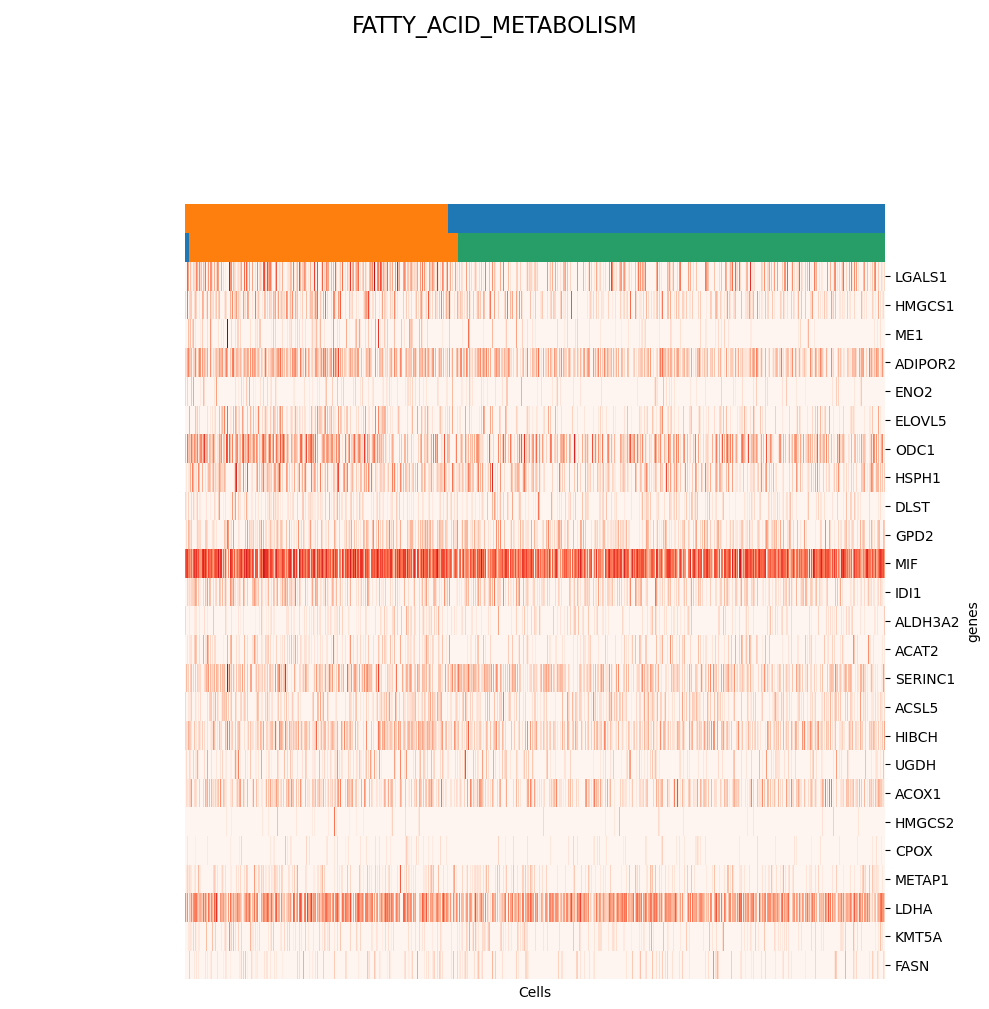

In [131]:
plotGseaHeat(43, res)

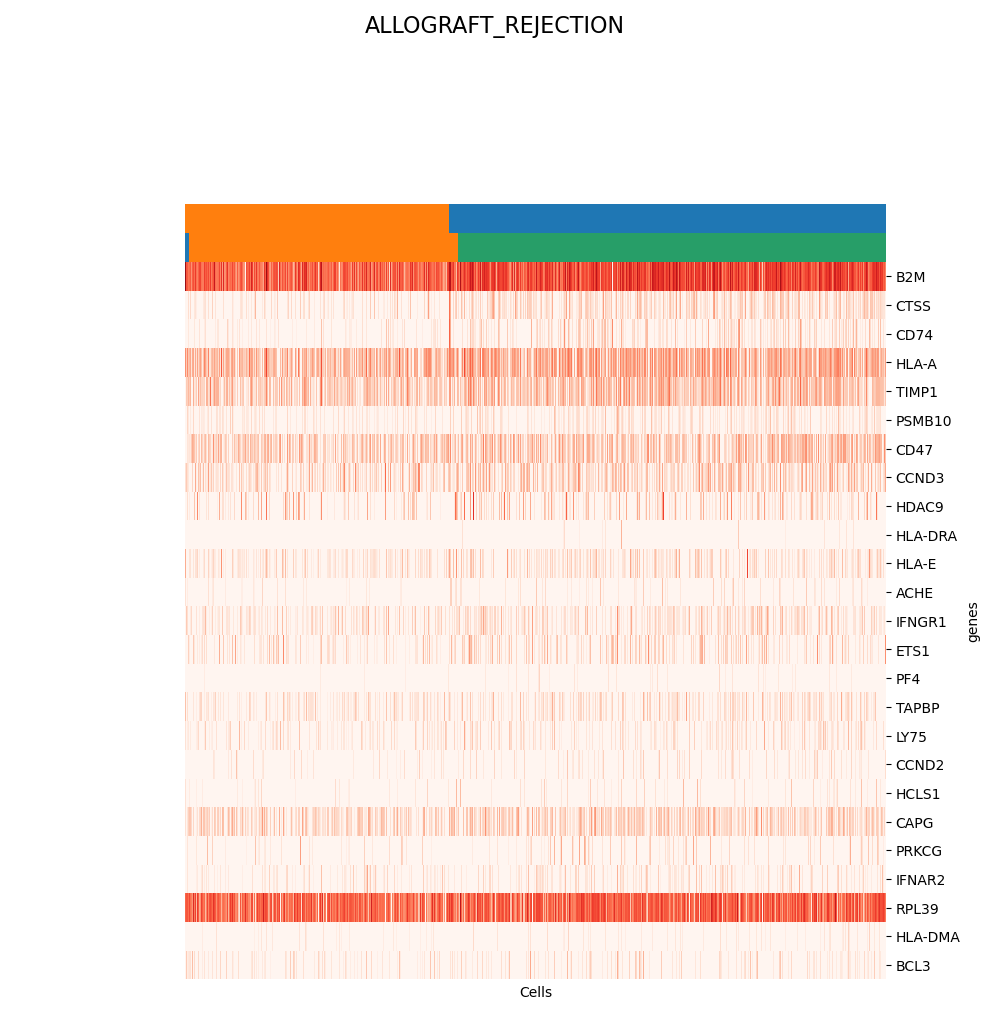

In [132]:
plotGseaHeat(22, res)

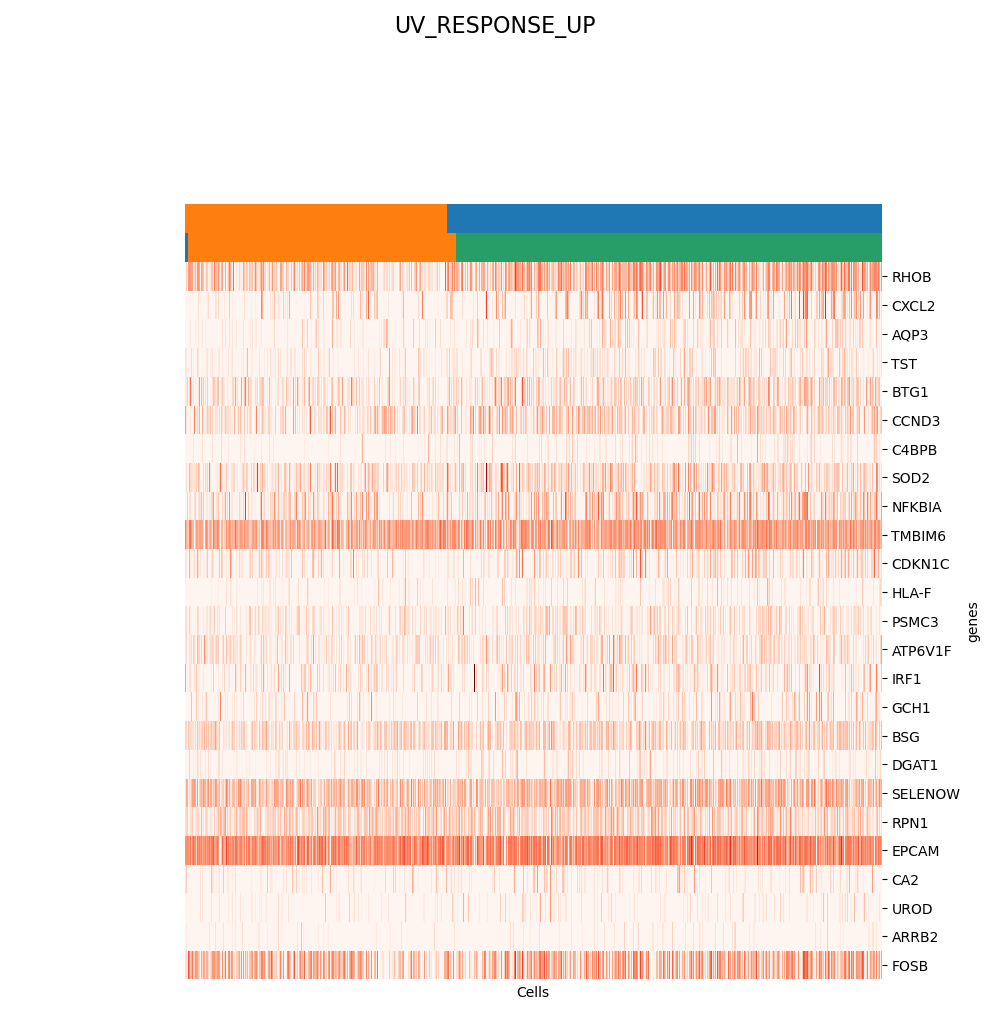

In [133]:
plotGseaHeat(24, res)

In [167]:
writeDir = "write/"

fileName = "pdacPdxMrtxGA60"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileTotal = writeDir + fileName + 'wImm.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [168]:
adata = sc.read_h5ad(resultsFile)
adata

AnnData object with n_obs × n_vars = 14508 × 1463
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'G1Score', 'G2MScore', 'scBasalScore', 'scClassicalScore', 'cellState', 'decoupler', 'zsig', 'pca_density_treatment', 'mrtxScore', 'vehScore'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'cellState_colors', 'decoupler_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pca_density_treatment_params', 'phase_colors', 'rank_genes_groups', 'treatment_colors', 'umap', 'zsig_colors'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [203]:
sc.pl.umap(adata, color=["treatment","cellState","scClassicalScore","scBasalScore"])

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [172]:
cellstate = adata.obs.cellState

In [173]:
adata = sc.read_h5ad(resultsFileQC)
adata = adata[cellstate.index]
adata

View of AnnData object with n_obs × n_vars = 14508 × 23942
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'treatment'

In [174]:
adata.obs["cellState"] = cellstate
adata.obs

/tmp/ipykernel_3931396/2281070606.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellState"] = cellstate


,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mm,pct_counts_mm,total_counts_mt,pct_counts_mt,treatment,cellState
AAACCCATCGGCTCTT-1-mrtx,3934,3895,10692.0,24.374826,31.337734,39.258157,52.719160,65.0,0.604258,834.0,7.800224,mrtx,classical
AAACGCTCATGAGTAA-1-mrtx,3762,3728,8546.0,19.111834,26.179958,34.840735,49.093234,56.0,0.651011,384.0,4.493330,mrtx,classical
AAACGCTGTGTACGCC-1-mrtx,4289,4238,13329.0,22.038321,30.641915,40.758965,55.274733,84.0,0.626258,766.0,5.746868,mrtx,classical
AAAGGTAGTACAGCGA-1-mrtx,5940,5865,22961.0,24.269488,31.067372,39.525709,52.692274,105.0,0.455215,1778.0,7.743565,mrtx,classical
AAAGGTAGTACAGTTC-1-mrtx,4029,3983,13239.0,23.740682,33.408629,43.663881,57.879678,42.0,0.316241,75.0,0.566508,mrtx,basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTACTGCGC-1-veh,5061,5043,13539.0,20.692704,27.059690,34.274134,46.963891,31.0,0.228445,900.0,6.647463,veh,classical
TTTGTTGGTCCGAAGA-1-veh,5418,5396,17575.0,22.947560,30.481223,38.503494,51.349355,26.0,0.147719,880.0,5.007113,veh,basal
TTTGTTGTCCGTTGGG-1-veh,5369,5358,14744.0,19.267484,24.757972,31.724325,44.350416,27.0,0.182791,1457.0,9.881986,veh,basal
TTTGTTGTCCTAGCTC-1-veh,3047,3044,6523.0,19.128440,25.902141,34.740061,50.611621,17.0,0.259939,234.0,3.587306,veh,classical


In [175]:
adata.obs.groupby('cellState')['treatment'].value_counts()

/tmp/ipykernel_3931396/2804383007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('cellState')['treatment'].value_counts()


cellState  treatment
basal      veh          9815
           mrtx          178
classical  veh          3327
           mrtx         1188
Name: count, dtype: int64

In [176]:
adata.obs['treatmentNum'] = pd.Categorical(adata.obs['treatment'], categories=["veh","mrtx"], ordered=True)
indices = adata.obs.sort_values(['cellState', 'treatmentNum']).index
adata = adata[indices,:]
cellStateCols = [cellStateColDict[cs] for cs in adata.obs.cellState]

In [177]:
bdata = adata[adata.obs.cellState == "classical"].copy()

bdata.var['mt'] = bdata.var_names.str.startswith('mt-') 
bdata = bdata[:, np.logical_not(bdata.var.mt)]
bdata.var_names = [g.upper() for g in bdata.var_names]
bdata

AnnData object with n_obs × n_vars = 4515 × 23942
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'treatment', 'cellState', 'treatmentNum'
    var: 'mt'

In [178]:
#geneSet = "MSigDB_Hallmark_2020"

In [179]:
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
resKegg = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets=geneSet,
        cls=bdata.obs.treatmentNum,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 8)
t2=time.time()
print(t2-t1)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/gseapy/gsea.py:105: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True)


88.04834246635437


In [180]:
resKegg.res2d#.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,UV_RESPONSE_UP,-0.627748,-2.74975,0.0,0.0,0.0,80/151,21.58%,CDKN1C;AMD1;BTG1;EIF5;DNAJB1;IRF1;DNAJA1;ATP6V...
1,gsea,DNA_REPAIR,-0.629927,-2.656858,0.0,0.0,0.0,94/149,24.60%,NME3;GPX4;EDF1;TAF10;APRT;ARL6IP1;GTF2B;IMPDH2...
2,gsea,ADIPOGENESIS,-0.597808,-2.656558,0.0,0.0,0.0,109/191,25.16%,ABCA1;CD151;SOD1;GPX4;CAT;DHRS7;PIM3;SSPN;ECH1...
3,gsea,HEME_METABOLISM,-0.570863,-2.646915,0.0,0.0,0.0,85/176,22.18%,CAT;YPEL5;BTG2;BPGM;SELENBP1;TMEM9B;HTATIP2;GD...
4,gsea,PROTEIN_SECRETION,-0.6285,-2.529483,0.0,0.0,0.0,65/96,24.00%,ABCA1;SOD1;CAV2;GNAS;SSPN;AP2M1;RAB2A;ERGIC3;A...
5,gsea,MYC_TARGETS_V1,-0.684322,-2.467358,0.0,0.0,0.0,136/195,20.66%,PABPC1;RPS10;RACK1;PABPC4;HNRNPA1;RPS5;EEF1B2;...
6,gsea,P53_PATHWAY,-0.564668,-2.4392,0.0,0.0,0.0,127/192,29.25%,BTG1;CD81;RACK1;TSPYL2;SOCS1;KLF4;EPHX1;VAMP8;...
7,gsea,OXIDATIVE_PHOSPHORYLATION,-0.669282,-2.436121,0.0,0.0,0.0,146/200,21.76%,SLC25A6;ATP5MC2;GPX4;ATP6V1F;ECH1;PDK4;ECHS1;S...
8,gsea,FATTY_ACID_METABOLISM,-0.550127,-2.426123,0.0,0.0,0.0,86/143,25.57%,HSPH1;PRDX6;EPHX1;ECH1;ERP29;ECHS1;PCBD1;SDHD;...
9,gsea,XENOBIOTIC_METABOLISM,-0.516246,-2.405111,0.0,0.0,0.0,90/168,28.18%,COMT;SERTAD1;CAT;PSMB10;DHRS7;EPHX1;ID2;TMBIM6...


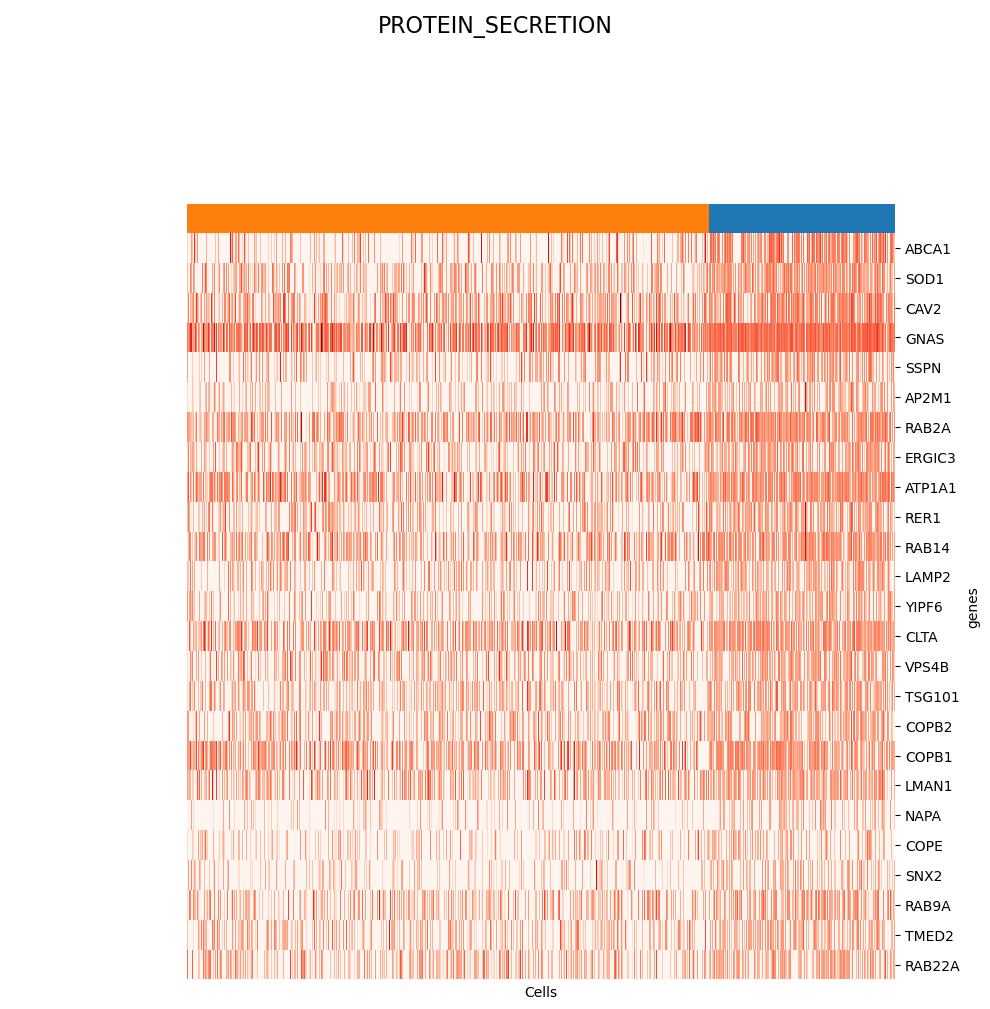

In [186]:
plotGseaHeat(4, resKegg)

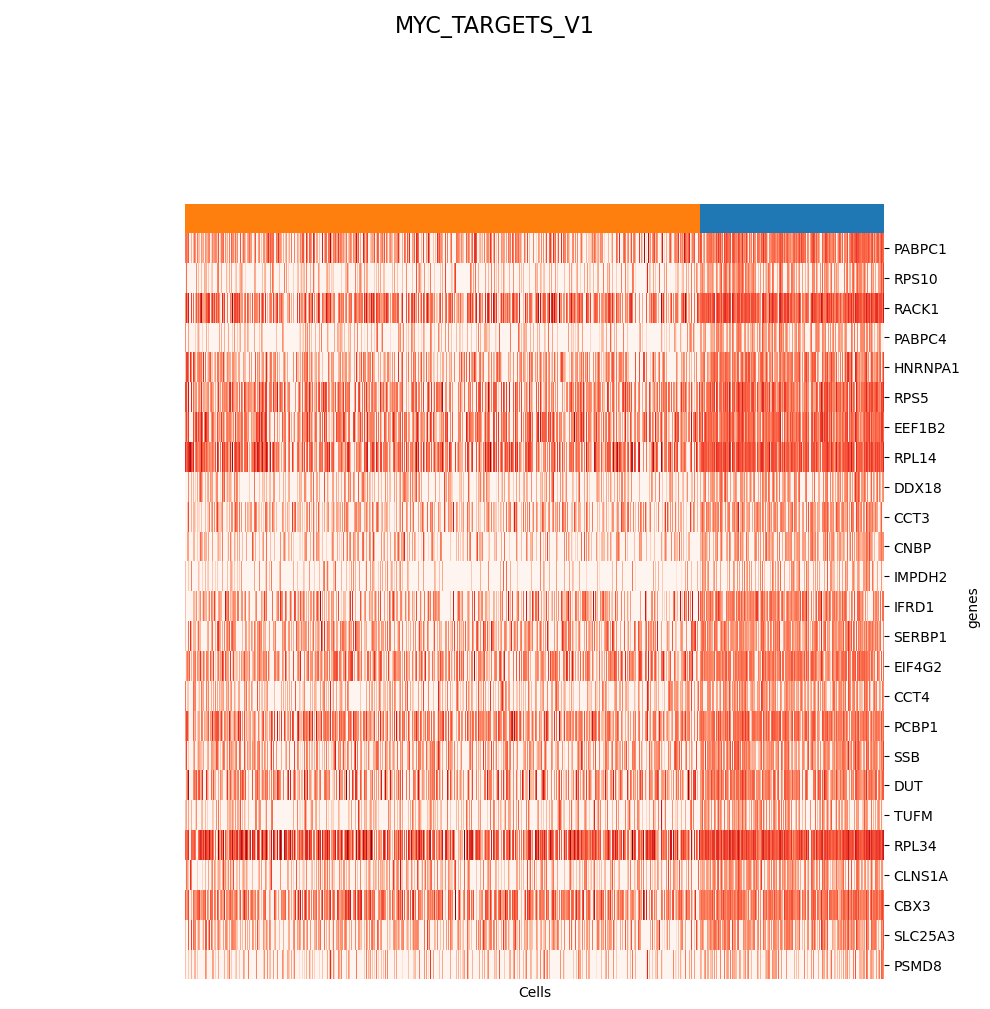

In [184]:
plotGseaHeat(5, resKegg)

In [187]:
writeDir = "write/"

fileName = "pdacPdxMrtx106"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileTotal = writeDir + fileName + 'wImm.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [188]:
adata = sc.read_h5ad(resultsFile)
adata

AnnData object with n_obs × n_vars = 7298 × 1495
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'G1Score', 'G2MScore', 'scBasalScore', 'scClassicalScore', 'cellState', 'decoupler', 'zsig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'GMM_colors', 'cellState_colors', 'decoupler_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_color

In [189]:
adata.uns["cellState_colors"]

array(['#1f77b4', '#ff7f0e'], dtype=object)

In [190]:
mrtxVehCmap = {"veh":'#ff7f0e',"mrtx":'#1f77b4'}

cellStateColDict = {"EMT":'#1f77b4', "basal":'#ff7f0e', "classical":'#279e68', "inter":'#d62728'}


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

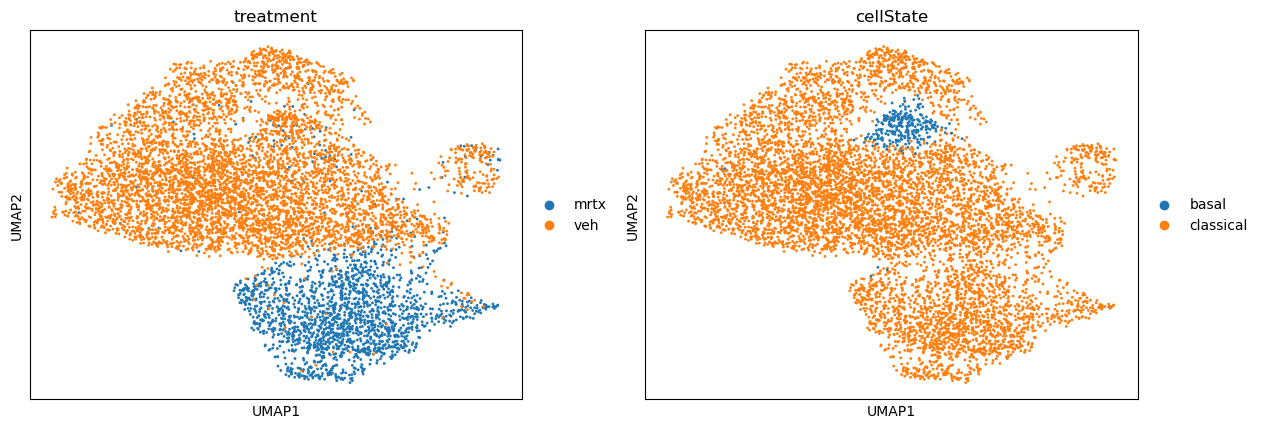

In [191]:
sc.pl.umap(adata, color=["treatment","cellState"])

In [192]:
cellstate = adata.obs.cellState

In [193]:
adata = sc.read_h5ad(resultsFileQC)
adata = adata[cellstate.index]
adata

View of AnnData object with n_obs × n_vars = 7298 × 22243
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'treatment'

In [194]:
adata.obs["cellState"] = cellstate
adata.obs

/tmp/ipykernel_3931396/2281070606.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellState"] = cellstate


,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification,GMM,treatment,cellState
AAACCCAGTGTTGCCG-1-mrtx,22.0,237.0,9.0,1559.0,5612,5593,21741.0,14.956187,22.168188,31.490572,...,2.690769,1.0,0.0,2.045283e-03,0.937547,0.060407,PC106-ANS191-MRTX4-B0258,PC106-ANS191-MRTX4-B0258,mrtx,classical
AAACGAACAGTGCGCT-1-mrtx,22.0,259.0,15.0,1677.0,4751,4735,13544.0,15.145045,23.074658,33.080548,...,1.181335,1.0,0.0,1.877308e-03,0.928307,0.069816,PC106-ANS191-MRTX4-B0258,PC106-ANS191-MRTX4-B0258,mrtx,classical
AAAGAACAGCATTGAA-1-mrtx,25.0,3091.0,43.0,3189.0,3650,3636,8915.0,18.800089,25.000000,33.470614,...,8.143579,2.0,0.0,2.997449e-04,0.266101,0.733599,Doublet,Doublet,mrtx,classical
AAAGGGCAGCGTACAG-1-mrtx,13.0,1523.0,17.0,103.0,3761,3745,9767.0,19.060239,25.400061,34.226888,...,9.624245,1.0,0.0,3.708152e-07,0.991408,0.008592,PC106-ANS189-MRTX2-B0256,PC106-ANS189-MRTX2-B0256,mrtx,classical
AAAGGGCCAATTCGTG-1-mrtx,20.0,307.0,12.0,2493.0,5482,5462,18324.0,15.725324,22.880618,31.651975,...,2.701375,1.0,0.0,1.256811e-03,0.907417,0.091326,PC106-ANS191-MRTX4-B0258,PC106-ANS191-MRTX4-B0258,mrtx,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACTATCCC-1-veh,0.0,0.0,0.0,0.0,1479,1473,2291.0,15.608696,23.695652,35.043478,...,4.714098,0.0,0.0,NaN,NaN,NaN,Negative,NaN,veh,classical
TTTGTTGGTAGCCAGA-1-veh,0.0,0.0,0.0,0.0,3375,3359,8542.0,16.678305,23.812849,33.601024,...,2.645750,0.0,0.0,NaN,NaN,NaN,Negative,NaN,veh,classical
TTTGTTGTCGCCGAAC-1-veh,0.0,0.0,0.0,0.0,7573,7544,37936.0,15.960946,23.237454,32.990342,...,1.668600,0.0,0.0,NaN,NaN,NaN,Negative,NaN,veh,classical
TTTGTTGTCGGCCTTT-1-veh,0.0,0.0,0.0,0.0,7786,7759,39665.0,17.022776,23.845476,32.462564,...,5.306946,0.0,0.0,NaN,NaN,NaN,Negative,NaN,veh,classical


In [195]:
adata.obs.groupby('cellState')['treatment'].value_counts()

/tmp/ipykernel_3931396/2804383007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('cellState')['treatment'].value_counts()


cellState  treatment
basal      veh           240
           mrtx           26
classical  veh          5151
           mrtx         1881
Name: count, dtype: int64

In [196]:
adata.obs['treatmentNum'] = pd.Categorical(adata.obs['treatment'], categories=["veh","mrtx"], ordered=True)
indices = adata.obs.sort_values(['cellState', 'treatmentNum']).index
adata = adata[indices,:]
cellStateCols = [cellStateColDict[cs] for cs in adata.obs.cellState]

In [197]:
bdata = adata[adata.obs.cellState == "classical"].copy()

bdata.var['mt'] = bdata.var_names.str.startswith('mt-') 
bdata = bdata[:, np.logical_not(bdata.var.mt)]
bdata.var_names = [g.upper() for g in bdata.var_names]
bdata

AnnData object with n_obs × n_vars = 7032 × 22243
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'treatment', 'cellState', 'treatmentNum'
    var: 'mt'

In [198]:
#geneSet = "MSigDB_Hallmark_2020"

In [199]:
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
resGo = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets=geneSet,
        cls=bdata.obs.treatmentNum,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 8)
t2=time.time()
print(t2-t1)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/gseapy/gsea.py:105: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True)


127.89319634437561


In [204]:
resGo.res2d#.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,MTORC1_SIGNALING,0.621924,2.530984,0.0,0.0,0.0,99/194,16.92%,ENO1;SLC2A1;GAPDH;HSP90B1;LDHA;SCD;DDIT4;HSPD1...
1,gsea,E2F_TARGETS,0.721658,2.483887,0.0,0.0,0.0,120/198,14.03%,HMGA1;NAP1L1;MKI67;TUBB;PTTG1;NME1;CDC20;MYC;T...
2,gsea,MYC_TARGETS_V1,0.783144,2.47503,0.0,0.0,0.0,128/195,10.13%,RPS10;RPL34;RPL22;RPL18;RPL14;SNRPG;SNRPD2;RPS...
3,gsea,G2M_CHECKPOINT,0.631924,2.335084,0.0,0.0,0.0,106/195,13.78%,HMGA1;MKI67;MT2A;CENPF;PTTG1;SMAD3;CDC20;MYC;T...
4,gsea,MYC_TARGETS_V2,0.705271,2.249669,0.0,0.0,0.0,32/57,13.87%,CBX3;NPM1;HSPD1;MYC;PA2G4;HK2;MCM4;DDX18;SRM;N...
5,gsea,HYPOXIA,0.497979,2.165662,0.0,0.0,0.0,76/187,24.20%,MIF;ENO1;S100A4;SLC2A1;GAPDH;LDHA;MT2A;ANXA2;D...
6,gsea,PROTEIN_SECRETION,-0.51659,-2.037298,0.0,0.011783,0.01,57/95,28.67%,TSPAN8;RAB9A;CLN5;DST;SGMS1;ARFGEF1;AP1G1;GOLG...
7,gsea,GLYCOLYSIS,0.436285,1.993044,0.0,0.001466,0.01,77/189,29.57%,MIF;PKM;ENO1;LDHA;DDIT4;TXN;TFF3;HSPA5;PGK1;PP...
8,gsea,UNFOLDED_PROTEIN_RESPONSE,0.508242,1.976585,0.0,0.0014,0.011,62/108,33.84%,RPS14;HSP90B1;NPM1;DDIT4;HSPA5;ERO1A;EIF4A1;XP...
9,gsea,OXIDATIVE_PHOSPHORYLATION,0.554275,1.93024,0.004082,0.002384,0.021,96/199,19.64%,COX7C;ATP5MG;COX7A2;UQCRH;ATP5F1E;LDHA;UQCRB;A...


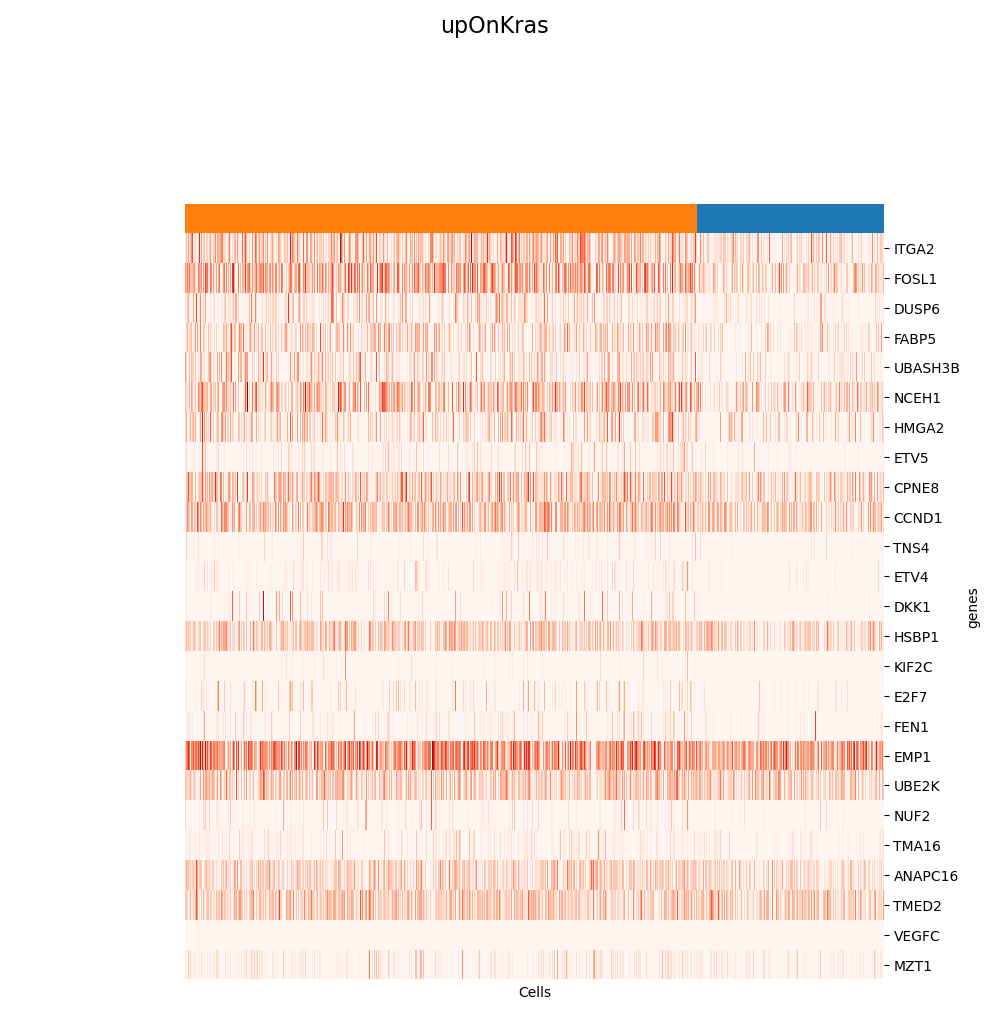

In [207]:
plotGseaHeat(11, resGo)

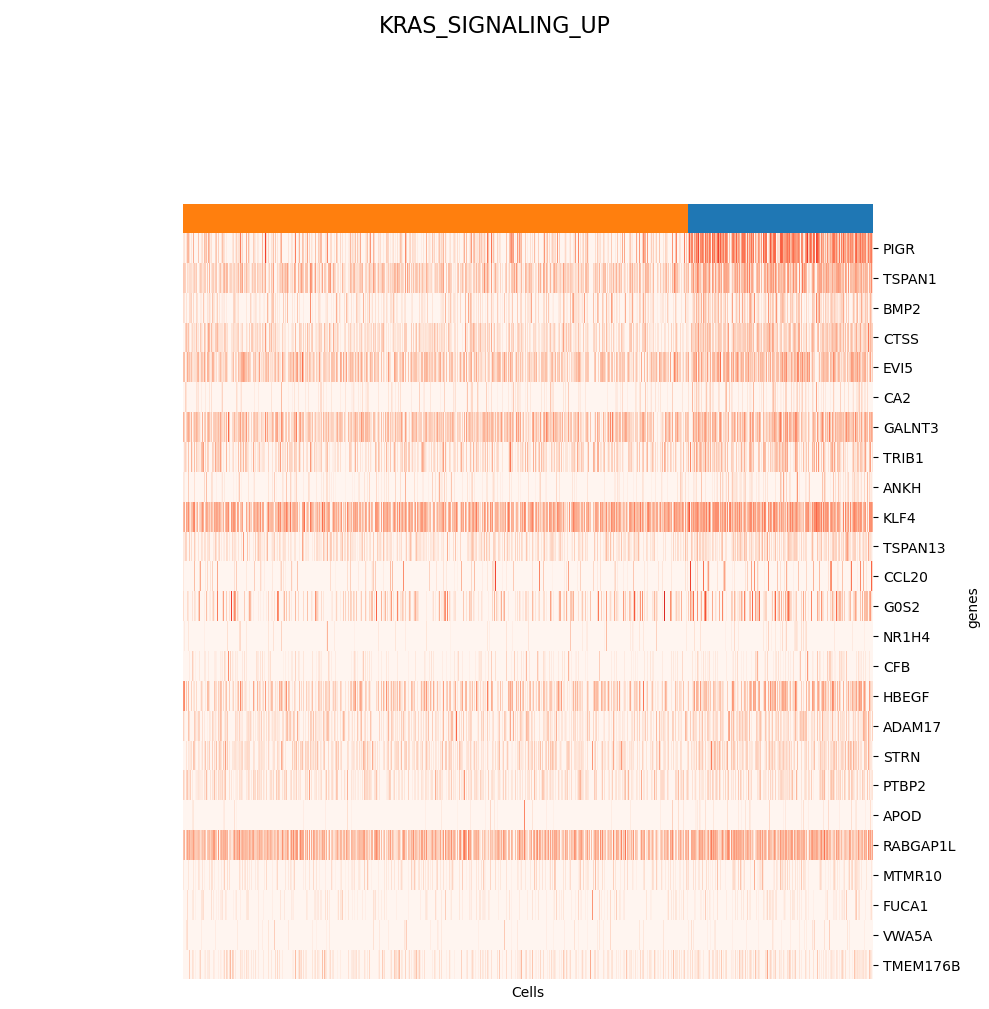

In [206]:
plotGseaHeat(17, resGo)

In [226]:
pdx1NES = res.res2d[["Term","NES","FWER p-val"]].copy()
pdxGA90NES = resKegg.res2d[["Term","NES","FWER p-val"]].copy()
pdx106NES = resGo.res2d[["Term","NES","FWER p-val"]].copy()

pdx1NES.index = pdx1NES["Term"]
pdxGA90NES.index = pdxGA90NES["Term"]
pdx106NES.index = pdx106NES["Term"]

#pdx1NES = pdx1NES[pdx1NES["FWER p-val"]<0.2]
#pdxGA90NES = pdxGA90NES[pdxGA90NES["FWER p-val"]<0.2]
#pdx106NES = pdx106NES[pdx106NES["FWER p-val"]<0.2]

pdx1NES["PDX1 FWER p-val"] = pdx1NES["FWER p-val"]
pdxGA90NES["PDXGA90 FWER p-val"] = pdxGA90NES["FWER p-val"]
pdx106NES["PDX106 FWER p-val"] = pdx106NES["FWER p-val"]

pdx1NES["PDX1 NES"] = pdx1NES["NES"]
pdxGA90NES["PDXGA90 NES"] = pdxGA90NES["NES"]
pdx106NES["PDX106 NES"] = pdx106NES["NES"]

pdx1NES = pdx1NES[["PDX1 NES","PDX1 FWER p-val"]]
pdxGA90NES = pdxGA90NES[["PDXGA90 NES","PDXGA90 FWER p-val"]]
pdx106NES = pdx106NES[["PDX106 NES","PDX106 FWER p-val"]]

ness = pdx1NES.join(pdxGA90NES).join(pdx106NES).dropna()
ness = ness.sort_values("PDX1 NES")
ness

,PDX1 NES,PDX1 FWER p-val,PDXGA90 NES,PDXGA90 FWER p-val,PDX106 NES,PDX106 FWER p-val
Term,,,,,,
INTERFERON_GAMMA_RESPONSE,-2.335219,0.0,-2.023694,0.01001,-1.599186,0.241
OXIDATIVE_PHOSPHORYLATION,-2.221228,0.0,-2.436121,0.0,1.93024,0.021
INTERFERON_ALPHA_RESPONSE,-2.217772,0.0,-1.350718,0.582583,-1.588892,0.255
COMPLEMENT,-1.909311,0.022,-2.346987,0.0,-1.408284,0.525
COAGULATION,-1.861682,0.04,-2.102851,0.003003,1.582361,0.269
ALLOGRAFT_REJECTION,-1.7512,0.091,-1.733276,0.111111,1.379467,0.598
KRAS_SIGNALING_DN,-1.722247,0.119,-1.506798,0.342342,-1.802186,0.077
UV_RESPONSE_UP,-1.627492,0.216,-2.74975,0.0,-1.585162,0.26
ADIPOGENESIS,-1.589115,0.261,-2.656558,0.0,-1.221242,0.798


In [227]:
ness.columns

Index(['PDX1 NES', 'PDX1 FWER p-val', 'PDXGA90 NES', 'PDXGA90 FWER p-val',
       'PDX106 NES', 'PDX106 FWER p-val'],
      dtype='object')

In [228]:
def numToSize(x):
    if x < 1e-10:
        return 200
    elif x < 0.005:
        return 100
    elif x < 0.01:
        return 50
    elif x < 0.1:
        return 10
    else:
        return 0

/tmp/ipykernel_3931396/3410019128.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sizes = pval.applymap(numToSize).values
/tmp/ipykernel_3931396/3410019128.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
/tmp/ipykernel_3931396/3410019128.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(j, locTick[i], s=sizes[i, j], c=plt.cm.RdYlBu(nes[i, j]), label=f'{observation}-{location}', alpha=0.6)


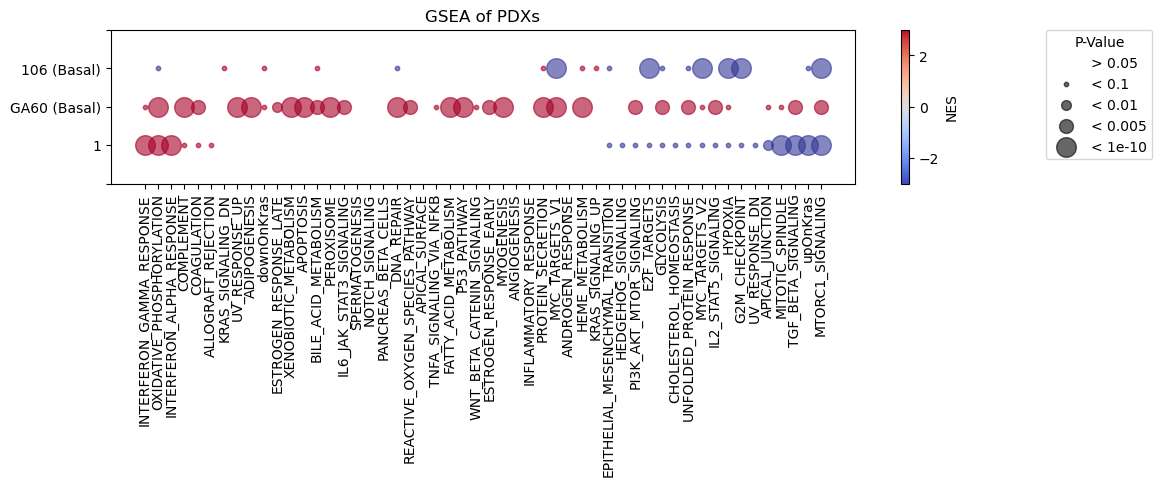

In [230]:
#made with the help of microspft copilot

import matplotlib.pyplot as plt
import numpy as np

# Define observations and locations
observations = ["1","GA90","106"]
locations = ness.index
locTick = [0.25,0.5,0.75]
# Generate random strength and size attributes for each observation at each location
nes = ness[['PDX1 NES', 'PDXGA90 NES','PDX106 NES']].T.values
pval = ness[['PDX1 FWER p-val', 'PDXGA90 FWER p-val', 'PDX106 FWER p-val']].T

sizes = pval.applymap(numToSize).values

# Create a color map from blue to red
cmap = plt.cm.get_cmap('coolwarm')


# Create a dot plot
fig, ax = plt.subplots(figsize=(12,2))
for i, observation in enumerate(observations):
    for j, location in enumerate(locations):
        ax.scatter(j, locTick[i], s=sizes[i, j], c=plt.cm.RdYlBu(nes[i, j]), label=f'{observation}-{location}', alpha=0.6)


sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=-3, vmax=3))
plt.colorbar(sm, ax=ax, orientation='vertical', label='NES')

sizes = np.unique(sizes)
# Add a legend for the size of the dots
legend_labels = ['> 0.05', '< 0.1', '< 0.01', '< 0.005', '< 1e-10']
legend_handles = []
for size, label in zip(sizes, legend_labels):
    handle = ax.scatter([], [], s=size, c='black', alpha=0.6, label=label)
    legend_handles.append(handle)

# Simplify the legend to only include necessary items
# We will only show the smallest and largest sizes for clarity
ax.legend(handles=legend_handles, labels=legend_labels, title='P-Value', loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.)

# Customize the plot
ax.set_xticks(range(len(locations)))
ax.set_xticklabels(locations,rotation=90)
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(["","1","GA60 (Basal)","106 (Basal)",""])

#ax.set_yticks([0,0.25,0.5,0.75,1])
#ax.set_yticklabels(["","1","GA60 (Basal)","106 (Basal)",""])

ax.set_title('GSEA of PDXs')

# Show the plot
plt.show()

#fig.savefig("figures/PdxHallmarksGsea.svg",bbox_inches="tight")

In [ ]:
geneSet = {
"GAVISH_3CA_MALIGNANT_METAPROGRAM_1_CELL_CYCLE_G2_M":["ARL6IP1","ASPM","AURKA","AURKB","BIRC5","CCNA2","CCNB1","CCNB2","CDC20","CDCA3","CDCA8","CDK1","CDKN3","CENPA","CENPE","CENPF","CENPW","CKAP2","CKS1B","CKS2","DEPDC1","DLGAP5","ECT2","GTSE1","H4C3","HMGB2","HMMR","KIF20B","KIF23","KIF2C","KNSTRN","KPNA2","MAD2L1","MKI67","NUF2","NUSAP1","PBK","PLK1","PRC1","PTTG1","SMC4","STMN1","TACC3","TOP2A","TPX2","TUBA1B","UBE2C","UBE2S","UBE2T","ZWINT"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_2_CELL_CYCLE_G1_S":["ASF1B","ATAD2","CDC45","CDC6","CDCA4","CDCA5","CDK1","CENPK","CENPM","CENPU","CHAF1A","CLSPN","DHFR","DNAJC9","DNMT1","DUT","E2F1","FEN1","GINS2","GMNN","H4C3","HELLS","HMGB2","MAD2L1","MCM2","MCM3","MCM4","MCM5","MCM6","MCM7","MYBL2","ORC6","PCLAF","PCNA","PKMYT1","PSMC3IP","RAD51AP1","RFC2","RFC4","RNASEH2A","RRM1","RRM2","SLBP","TK1","TMEM106C","TYMS","UBE2T","UHRF1","USP1","ZWINT"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_3_CELL_CYLCE_HMG_RICH":["ANAPC11","ANP32B","ATP5MC1","ATP5MC3","CKS1B","COX5A","COX8A","DUT","ERH","H2AZ1","H2AZ2","H4C3","HMGA1","HMGB1","HMGB2","HMGN1","HMGN2","HNRNPA2B1","HSPD1","HSPE1","IFT25","LSM4","MCM7","MIF","NAA38","NME1","NUCB2","PCLAF","PCNA","RAN","RANBP1","SIVA1","SLC25A5","SLIRP","SNRPB","SNRPD1","SNRPD3","SNRPE","SNRPF","SNRPG","SRSF7","STMN1","SUMO2","TK1","TPI1","TUBA1B","TUBB","TYMS","UQCRQ","YBX1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_4_CHROMATIN":["AHCTF1","ARGLU1","ASH1L","ATAD2","ATAD5","BAZ1B","BDP1","CEP350","CLINT1","DST","ENAH","GOLGA4","GOLGB1","GOLIM4","H1-2","H1-4","H1-5","H2AC20","KCNQ1OT1","KMT2A","MACF1","MSH6","MT-ND6","NOP14","NRDC","PAXBP1","PCM1","PHF3","PTPN11","RANBP2","RIF1","ROCK2","SENP6","SETD2","SLK","SMARCA5","SMC1A","SMC5","SMCHD1","SPAG9","SPEN","SUZ12","SYNE2","TASOR2","TJP1","TRIM44","TRIP11","UACA","ZMYM4","ZNF638"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_5_STRESS":["ATF3","BTG2","CCN1","CCNL1","CDKN1A","CITED2","CXCL2","DDIT3","DDIT4","DNAJA1","DNAJB1","DUSP1","EGR1","EGR2","FOS","FOSB","GADD45B","HERPUD1","HES1","HSPA1A","HSPA1B","HSPA6","HSPH1","ID1","ID2","ID3","IER2","IER3","IRF1","JUN","JUNB","KLF10","KLF4","KLF6","MAFF","MCL1","NFKBIA","NFKBIZ","NR4A1","PLK2","PMAIP1","PPP1R15A","RASD1","RHOB","SAT1","SERTAD1","SOCS3","TOB1","TRIB1","ZFP36"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_METAPROGRAM_6_HYPOXIA":["ADM","AK4","AKAP12","ALDOA","ANGPTL4","ANKRD37","BNIP3","BNIP3L","C4orf3","CA12","CA9","CAV1","DDIT3","DDIT4","DNAJB9","EGLN3","ENO1","ENO2","EPB41L4A-AS1","ERO1A","ERRFI1","FAM162A","GBE1","GPI","HILPDA","HK2","IGFBP3","IGFBP5","INSIG2","LDHA","LGALS3","MT1X","MT2A","NDRG1","NDUFA4L2","NRN1","P4HA1","PDK1","PFKFB3","PFKP","PGK1","PLOD2","S100A10","SLC16A3","SLC2A1","SLC3A2","TMEM45A","VEGFA","VIM","WSB1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_7_STRESS_IN_VITRO":["ARF4","ASNS","ATF3","ATF4","BTG1","CARS1","CCDC174","CEBPB","CEBPG","DDIT3","DDIT4","DNAJB9","EIF1B","EPB41L4A-AS1","GADD45A","GADD45B","GARS1","GDF15","HERPUD1","HSPA5","HSPA9","MAP1LC3B","MTHFD2","NUPR1","OSER1","PDRG1","PHGDH","PPP1R15A","PSAT1","RSRC2","SARS1","SHMT2","SLC3A2","SNHG12","SNHG15","SNHG32","SNHG7","SNHG8","SQSTM1","STC2","TAF1D","TRIB3","TXNIP","UPP1","WARS1","XBP1","YARS1","ZFAND2A","ZFAS1","ZNF622"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_8_PROTEASOMAL_DEGRADATION":["ANXA1","CCNB1","CCT5","CCT7","CCT8","CDC123","DCAF13","DDX39A","DPM1","ECH1","EIF3I","EIF4A1","EIF4A3","GSTO1","HSPA5","ILF2","IMPDH2","LAPTM4A","MCTS1","MDH1","MRPL13","NDUFA9","NDUFS2","NQO1","NUP37","PCMT1","PDHA1","PDIA3","PGK1","POLR2G","PRDX1","PRDX2","PRMT1","PSMA3","PSMA4","PSMB1","PSMB3","PSMB6","PSMC2","PSMC4","PSMD13","PSME2","RTCB","SLC3A2","SNRPB2","SPCS2","SSB","SSBP1","TUBB4B","XRCC6"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_9_UNFOLDED_PROTEIN_RESPONSE":["ARF4","ATF4","CALR","CCPG1","CDK2AP2","CKAP4","CRELD2","DNAJB11","DNAJB9","DNAJC3","ERLEC1","FKBP11","FKBP2","HERPUD1","HM13","HSP90B1","HSP90B2P","HSPA5","HYOU1","ISG20","KDELR2","LAPTM4A","LMAN1","LMAN2","MANF","MLEC","MYDGF","OSTC","PDIA3","PDIA4","PDIA6","PLPP5","PPIB","PRDX4","RPN2","RRBP1","SDF2L1","SEC61G","SEC63","SEL1L","SELENOK","SELENOS","SLC35B1","SLC3A2","SRPRA","SRPRB","TMED9","TXNDC15"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_10_PROTEIN_MATURATION":["APLP2","APMAP","APP","ATP6AP1","ATP6AP2","AZGP1","CFI","CLU","CTSA","CTSL","DDOST","EPCAM","EPHX1","EPRS1","GDF15","GGH","GRN","HEXB","HLA-A","HLA-C","HSP90B1","HSPA5","ITM2B","LAMP1","LAMP2","LAPTM4A","LGALS3BP","LMAN2","LRPAP1","MAGED2","MALAT1","NEAT1","OS9","PDIA3","PDIA4","PDIA6","PIGT","PPIB","PRDX4","PSAP","RPN2","SERPINA1","SERPINE2","SIL1","SLC3A2","SPP1","TIMP1","TM9SF2","TMEM59","TSPAN1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_11_TRANSLATION_INITIATION":["ABHD14B","AHCY","APEX1","C19orf48P","CCDC85B","CCNB1IP1","CCNG1","CFAP68","EIF2A","EIF2S3","EIF3D","EIF3E","EIF3F","EIF3M","EIF4B","EPB41L4A-AS1","EPRS1","EXOSC5","FBL","H2AC25","HSD17B11","IGBP1","IMPDH2","LETMD1","LTA4H","LYRM4","MRPL10","MRPL45","MYC","NBEAL1","NME1","NOA1","NOB1","OXA1L","PAICS","PPP1R14B","RGS10","RPL22L1","RSL1D1","SLC27A5","SNHG19","SNHG32","SNHG7","SNHG8","SRM","TKT","TOP1MT","ZFAS1","ZNF277","ZNF581"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_12_EMT_1":["A2M","ACTA2","BGN","C1R","C1S","CALD1","CAV1","CCDC80","CCN1","CCN2","COL1A1","COL1A2","COL3A1","COL4A1","COL4A2","COL6A1","COL6A2","COL6A3","CTSK","CXCL12","DCN","FBLN1","FN1","FSTL1","ID3","IGFBP4","IGFBP5","IGFBP7","LGALS1","LUM","MGP","MMP2","MYL9","NNMT","POSTN","PRSS23","RARRES2","SERPING1","SNAI2","SPARC","SPARCL1","TAGLN","TCF4","TGFBI","TIMP1","TIMP3","TPM1","TPM2","TSC22D3","VIM"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_13_EMT_2":["ANXA3","C15orf48","CAV1","CAVIN3","CDA","CDKN1A","COL17A1","CST6","DCBLD2","EMP3","F3","FLNA","FN1","FSTL3","IGFBP6","IGFBP7","IL32","INHBA","ITGA3","ITGA6","ITGAV","ITGB1","ITGB6","KRT17","KRT7","LAMA3","LAMB3","LAMC2","LGALS1","MMP7","MT2A","PDLIM7","PDPN","PLAU","PLAUR","PMEPA1","PRSS23","PTHLH","RBP1","RHOD","S100A2","SERPINE1","SERPINE2","TGFBI","TGM2","THBS1","TNC","TNFRSF12A","TPM1","VIM"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_14_EMT_3":["ANXA1","ANXA2","ANXA3","C19orf33","CD24","CKB","CLDN4","CLIC1","CRIP1","CRIP2","EMP1","EMP3","EZR","FLNA","FXYD3","HSPB1","IFI27","IL32","ISG15","KLF6","KRT18","KRT19","KRT7","KRT8","LGALS1","LGALS3","LMNA","MDK","MMP7","MYADM","MYL12A","PHLDA2","PLP2","RAB11FIP1","RHOC","S100A10","S100A11","S100A14","S100A16","S100A4","S100A6","S100P","SH3BGRL3","STMN1","TAGLN2","TM4SF1","TMSB4X","TNFRSF12A","TUBA1A","VIM"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_15_EMT_4":["ALDH3A1","ANTXR1","ASPN","ASS1","BCAM","C12orf75","C1R","C1S","CAV1","CCL2","CD74","COL17A1","CXCL14","DAPL1","DCN","DST","EGR1","FTH1","GLUL","HOPX","HTRA1","IFIT3","IFITM1","IGFBP5","KRT15","LTF","MOXD1","NCOA7","NFIB","NINJ1","NTRK2","PNRC1","SDCBP","SELENOP","SERPINE2","SERPINF1","SERPINH1","SESN3","SFRP1","SLC47A2","SNAI2","SNHG32","SOCS3","SOX4","SPARC","THBS2","TIMP1","TP53AIP1","TSC22D1","TXNIP"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_16_MES_GLIOMA":["ACTN1","ADAMTS9-AS2","AKAP12","ANXA1","ANXA2","BCAT1","CADPS","CAMK2D","CD44","CLIC4","CREB5","CYTOR","DIRAS3","EGR1","ELL2","EMP1","F3","FRMD5","GADD45A","GAP43","GFAP","GNG12","HIVEP3","IGF2BP2","IGFBP3","IGFBP7","IL1RAP","JAG1","KLHL4","LMNA","LYST","METTL7B","MIR4435-2HG","NAMPT","NRP2","PDLIM4","PGM2L1","PLAT","RCAN1","S100A16","SAMD4A","SCG2","SLC4A7","TNC","TNFRSF12A","VCL","VIM","VMP1","WWTR1","ZYX"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_17_INTERFERON_MHC_II_1":["B2M","BST2","C1R","C1S","CD74","CXCL10","GBP1","GBP2","HLA-A","HLA-B","HLA-C","HLA-DMA","HLA-DPA1","HLA-DPB1","HLA-DQA1","HLA-DQB1","HLA-DRA","HLA-DRB1","HLA-DRB5","HLA-E","HLA-F","IFI27","IFI35","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFITM1","IFITM3","ISG15","ISG20","LAP3","MX1","OAS1","PARP14","PARP9","PLAAT4","PLSCR1","PSMB8","PSMB9","SAA1","SOD2","STAT1","TAP1","TNFSF10","TYMP","UBE2L6","WARS1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_18_INTERFERON_MHC_II_2":["A2M","ALDH1A1","ANXA1","ARPC1B","C1R","C1S","C3","CALM2","CD74","CD9","CLU","CRYAB","CTNNAL1","CTSD","DEPP1","DHRS3","EGFL8","GFRA3","GPM6B","GPX3","HLA-DMA","HLA-DPA1","HLA-DRA","HLA-DRB1","HLA-DRB5","IFI6","IFITM2","IFITM3","ISG15","LGALS1","LGALS3BP","MMP7","MT1X","MT2A","NNMT","PDK4","PLAT","PLP1","PMP22","RARRES2","S100A10","S100B","SELENOP","SEMA3B","SERPING1","TMEM176A","TMEM176B","TUBA1A","UCHL1","WFDC2"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_19_EPITHELIAL_SENESCENCE":["AGR2","ANXA1","AQP3","C15orf48","CEACAM5","CEACAM6","CLDN4","CLDN7","CLIC3","CRABP2","CXCL17","DSC2","ELF3","FABP5","GPRC5A","IGFBP3","IL1RN","KRT13","KRT16","KRT17","KRT6A","KRT6B","KRT7","LCN2","LY6D","LYPD3","MAL2","MALL","MUC4","PDZK1IP1","PI3","PRSS22","PSCA","S100A7","S100A8","S100A9","S100P","SAA1","SERPINB1","SERPINB3","SERPINB4","SLPI","SPRR1B","SPRR2A","SPRR2D","SPRR3","SULT2B1","TACSTD2","TSPAN1","WFDC2"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_20_MYC":["ATP5MC1","BZW2","C1QBP","CCT2","CCT5","CMSS1","CYCS","DCAF13","DCTPP1","DDX21","DKC1","EBNA1BP2","EIF4EBP1","EIF5A","ENO1","FABP5","FKBP4","GNL3","GPATCH4","HSPD1","HSPE1","LDHA","LDHB","MRPL12","MRPL3","MRTO4","MYC","NCL","NHP2","NIFK","NME1","NOLC1","NOP16","NOP56","NOP58","ODC1","PA2G4","PAICS","PHB1","PNO1","PPA1","PRMT1","RAN","RANBP1","RUVBL1","SLIRP","SNRPD1","SRM","TIMM13","TOMM40"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_21_RESPIRATION":["APRT","ATOX1","ATP5F1E","ATP5MC1","ATP5ME","ATP5MF","ATP5MK","COA3","COPS9","COX17","COX6B1","COX7B","H3-3A","LGALS1","LSM7","NDUFA1","NDUFA12","NDUFA3","NDUFA7","NDUFAB1","NDUFB1","NDUFB2","NDUFB4","NDUFB8","NDUFC1","NDUFS5","NDUFS6","NEDD8","NHP2","NME1","NOP10","OST4","PET100","PFDN2","PSMB3","ROMO1","RPL21","RPS21","RPS29","SEC61G","SEM1","SLIRP","SNRPD2","SNRPF","SNRPG","TIMM8B","TMEM258","UBL5","UQCR10"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_22_SECRETED_1":["ANXA1","AREG","ARID5B","ARL14","ARL5B","BIRC3","CCL2","CCL20","CCN1","CDKN1A","CSRNP1","CXCL1","CXCL2","CXCL8","DDX21","DUSP5","EDN1","EMP1","EPHA2","ERRFI1","FHL2","FOSL1","FOSL2","GEM","HBEGF","ICAM1","IER3","ITPKC","KDM6B","LIF","LUCAT1","MAFF","MIDN","MLF1","MYADM","MYC","NAMPT","NCOA7","PFKFB3","PHLDA1","PHLDA2","PIM1","PIM3","PLAUR","TM4SF1","TNFAIP3","TNFRSF12A","TRIB1","ZBTB43","ZC3H12A"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_23_SECRETED_2":["AGR2","AKR1C1","BPIFB1","C3","CD24","CD82","CFB","CLDN4","CLU","CP","CTSC","CXCL1","CXCL2","CXCL8","ELF3","FAM3D","FMO2","GSTA1","IGFBP3","KLK11","KRT19","KYNU","LCN2","LTF","MDK","MMP7","MSMB","MUC5B","NCOA7","NDRG2","PDZK1IP1","PIGR","PRSS23","RARRES1","RDH10","S100A9","SAA1","SAA2","SCGB1A1","SCGB3A1","SERPINF1","SLPI","SPINK1","TFF3","TGM2","TNFSF10","TSPAN1","TSPAN8","VMO1","WFDC2"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_24_CILIA":["C12orf75","C20orf85","C9orf24","CAPS","CAPSL","CES1","CETN2","CFAP144","CFAP276","CFAP90","CRIP1","DNAAF1","DNAH5","DNALI1","DPCD","DYNLRB2","DYNLT2B","EFHC1","FABP6","FAM229B","FOXJ1","GSTA1","HOATZ","IFT57","IGFBP2","IGFBP7","IQCG","KIF9","LRRC23","LRRIQ1","MLF1","MORN2","MRPS31","MS4A8","NUCB2","ODF3B","OSCP1","PIERCE1","PIFO","PLAC8","PSENEN","RSPH1","SLC44A4","SPA17","TPPP3","TSPAN1","TUBA1A","WDR54","ZMYND10"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_25_ASTROCYTES":["AGT","AHCYL1","ALDOC","APOE","AQP4","ATP1A2","ATP1B2","BCAN","CD9","CLU","CPE","CRYAB","CST3","EDNRB","F3","FABP7","GATM","GFAP","GJA1","GRAMD2B","HEPN1","HEY1","ID1","ID3","ID4","IFITM3","IGFBP7","ITM2C","MIR9-1HG","MLC1","MT1X","MT2A","MT3","NDRG2","NTRK2","PLP1","PLTP","PMP2","PON2","PSAT1","RAMP1","RASSF4","S100B","SCRG1","SLC1A3","SPARC","SPARCL1","TTYH1","VIM","ZFP36"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_26_NPC_GLIOMA":["ARL4D","BASP1","BEX2","CD24","CRMP1","CXADR","DCX","DDAH2","DLX5","DLX6-AS1","ELAVL4","ENO2","FNBP1L","GAP43","GNG3","GPC2","IGFBPL1","JPT1","KIF5C","KLHDC8A","MAP1B","MEG3","MIAT","MLLT11","NNAT","NREP","NSG1","NSG2","PAK3","PKIA","RBFOX2","RBP1","RND3","RTN1","SCG2","SCG3","SNAP25","SOX11","SOX4","STMN1","STMN2","STMN4","SYT1","TAGLN3","TCEAL7","TERF2IP","TMEM161B-DT","TUBB2A","TUBB3","UCHL1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_27_OLIGO_PROGENITOR":["ACAT2","ANGPTL2","APOD","ASCL1","BCAN","BCAS1","CA10","CNP","CNTN1","DHCR7","DLL1","DLL3","FDFT1","FGF12","FIBIN","GPR17","HES6","LHFPL3","LIMA1","LMF1","MPZL1","MSMO1","NEU4","NKAIN4","OLIG1","OLIG2","OMG","P2RX7","PACC1","PDGFRA","PGRMC1","PLP1","PLPPR1","PSAT1","PTGDS","RAB33A","RGR","RTKN","SCD5","SCRG1","SERINC5","SGK1","SIRT2","SLC1A1","SMOC1","SOX8","THY1","TNFRSF21","TNR","TUBB4A"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_28_OLIGO_NORMAL":["ABCA2","ANKS1B","ANLN","APLP1","APOD","ATP1B1","BIN1","CA2","CLDN11","CLDND1","CMTM5","CNP","CRYAB","ELOVL1","ERMN","FAM107B","GSN","HAPLN2","HSPA2","KLK6","LARP6","LHPP","MAG","MAL","MBP","MOBP","PACS2","PLAAT3","PLEKHB1","PLLP","PLP1","PPP1R14A","PTGDS","QDPR","RNASE1","S100A1","SCD","SELENOP","SIRT2","SLAIN1","SLC44A1","SLC48A1","SPOCK3","STMN4","TF","TMEM144","TUBB4A","UGT8"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_29_NPC_OPC":["ABAT","ARHGEF7","BAZ2B","BTG1","BTG2","CADM2","CHD7","DCX","DLL3","DOCK10","DSEL","FAM181B","FGFBP3","GLCCI1","GOLGB1","GRIA2","HIP1","KCNQ1OT1","KDM5B","KLF12","KLHL24","LDLRAD3","MAP2","MAP3K1","MMP16","MTSS1","MXD4","OLIG1","OLIG2","PEAK1","PNRC1","RAB3IP","REV3L","RFTN2","RFX4","SESN3","SOX11","SOX4","SOX5","SOX6","SPRY4","STMN4","TANC2","TFDP2","TRIO","TXNIP","UBE2H","VCAN","ZMYM2","ZNF91"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_30_PDAC_CLASSICAL":["AGR2","AGR3","AKR7A3","ANXA10","CA2","CDH17","CEACAM1","CEACAM5","CEACAM6","CEACAM7","CES2","CLDN18","CTSE","CXCL17","DUOX2","DUOXA2","FAM3D","FXYD3","GCNT3","GPX2","HPGD","ISG20","LGALS4","LINC01133","LYZ","MUC13","MUC5AC","MUC5B","MUCL3","OLFM4","PDE4C","PDZK1IP1","PHGR1","PIGR","PLA2G10","PLAC8","PSCA","REG4","SLC40A1","SLC44A4","SPINK1","TCN1","TFF1","TFF2","TFF3","TM4SF4","TSPAN1","TSPAN8","VSIG1","VSIG2"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_31_ALVEOLAR":["ABCA3","AK1","ALOX15B","ALPL","AQP1","C16orf89","C3","C4BPA","CACNA2D2","CXCL17","DHCR24","DMBT1","DUOX1","EPHX1","FABP5","FASN","HOPX","HSD17B6","LAMP3","LPCAT1","LRRK2","MFSD2A","MID1IP1","NAPSA","NNMT","NPC2","PEBP4","PGC","PIGR","PTPN13","RNASE1","S100A9","SCD","SCGB3A1","SCGB3A2","SDR16C5","SERPINA1","SFTA1P","SFTA2","SFTA3","SFTPA1","SFTPA2","SFTPB","SFTPC","SFTPD","SLC22A31","SLPI","SPINK5","SUSD2","TFPI"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_32_SKIN_PIGMENTATION":["APOE","ASAH1","AVPI1","BCL2A1","BIRC7","CAPN3","CCN3","CHCHD6","DAB2","DCT","FXYD3","GDF15","GJB1","GPNMB","GPR137B","GPR143","GYPC","ISG20","LGALS3","LINC00518","LYST","MBP","MITF","MLANA","MXI1","NBL1","NSG1","PHACTR1","PIR","PLP1","PMEL","QDPR","QPCT","RAB38","RRAGD","S100B","SH3BP5","SLC45A2","SNCA","SNX10","SPON2","TBC1D16","TBC1D7","TIMP2","TNFRSF14","TRIM2","TRPM1","TYRP1","WIPI1","ZNF106"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_33_RBCS":["AHSP","ANK1","APOC1","APOE","BLVRB","CA1","CA2","CASP3","CAST","CD36","CNRIP1","CSF2RB","DENND10","EPCAM","FAM178B","FBXO7","FCGRT","FECH","GATA1","GYPB","HAGH","HBA1","HBA2","HBB","HBD","HBG1","HBG2","HBQ1","HES6","HMBS","KCNH2","KLF1","LMNA","MPC2","MYC","NFIA","PLIN2","PRDX2","REXO2","RHAG","S100A6","SLC25A37","SMIM10","STRADB","SYNGR1","TFR2","TFRC","TMEM14C","UBAC1","UROD"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_34_PLATELET_ACTIVATION":["ACTN1","BIN2","C2orf88","CAVIN2","CCND3","CD36","CD9","CKB","CLU","CMTM5","DAD1","FCER1A","FCER1G","FERMT3","FLI1","FYB1","GATA2","GP9","GSN","GUCY1B1","HBD","ITGA2B","LAT","LGALS1","LIMS1","MAX","MGLL","MMRN1","MPIG6B","NRGN","PBX1","PDLIM1","PF4","PIM1","PKM","PLEK","PPIF","PRKAR2B","RAB27B","RAP1B","RGS18","SLC44A1","STOM","TGFB1","TMSB4X","TPM1","TPM4","VASP","VCL"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_35_HEMATO_RELATED_1":["ANKRD28","ARMH1","AVP","AZU1","BAALC","BST2","C1QTNF4","CD34","CD44","CD52","CD74","CFD","CLEC11A","CPA3","CRHBP","CSF3R","CST7","CTSG","ELANE","FAM30A","FOS","GLIPR1","HLA-DQB1","HOPX","ICAM3","IGLL1","ITM2C","KLF6","LYZ","MBOAT7","MDK","MGST1","MPO","MS4A3","NPDC1","PLAC8","PRSS57","PRTN3","PTPRCAP","RAB32","RNASE2","SELL","SERPINB1","SMIM24","SPINK2","SRGN","TNFSF13B","TSC22D3","VAMP5","ZFP36L2"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_36_IG":["ADA2","CCPG1","CD27","CD63","CD79A","CITED2","DERL3","DNAJB9","FCRL5","HERPUD1","HLA-F","IGHA1","IGHA2","IGHG1","IGHG2","IGHG3","IGHG4","IGHGP","IGHM","IGKC","IGKV1-12","IGKV4-1","IGLC1","IGLC2","IGLC3","IGLC5","IGLC6","IGLC7","IGLJ1","IGLJ2","IGLJ3","IGLL5","IGLV3-1","IGLV3-21","IGLV3-7","IGLV6-57","IRF4","ITGB7","JCHAIN","JSRP1","KLF6","MAN1A2","MIR4539","PRDX4","SEL1L3","SELENOM","TNFRSF17","TSC22D3","TXNIP"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_37_HEMATO_RELATED_2":["ABCC4","ALDH1A1","ATP6V0A2","BMP2K","CASP3","CD82","CD84","CNRIP1","CPA3","CPPED1","CTNNBL1","CYTL1","CYTOR","DEPTOR","EREG","FAM117A","FCER1A","FREM1","GATA2","GMPR","HBD","HPGDS","ICAM4","IL1B","KCNQ1OT1","KLF1","LXN","MINPP1","MPP1","NFE2","PBX1","PDCD4","PDLIM1","PDZD8","PKIG","PLEK","PLIN2","RAB37","RGS18","SLC40A1","SOD2","SOX4","STAM","STXBP6","TAFA2","TESPA1","TPSB2","ZEB2","ZMYND8"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_38_GLUTATHIONE":["ACSM2A","ACSM2B","AGT","AGXT2","AMN","AOC1","APOM","AQP1","AZGP1","BBOX1","C11orf54","CDHR5","CES2","CFI","CLDN10","CLTRN","CUBN","CXCL14","DDC","FOLR1","GAL3ST1","GAMT","GCHFR","GLYAT","GLYATL1","GPX3","GSTA1","GSTA2","KHK","LACTB2","LGALS2","LRP2","MIOX","MSRA","NAT8","PCSK1N","PDZK1","PEPD","PRAP1","PXMP2","RBP5","RIDA","SLC16A9","SLC17A3","SLC22A18","SLC5A12","SLC6A13","SMIM24","TNFAIP6","TSPAN1"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_39_METAL_RESPONSE":["ANXA1","BGN","C1R","C1S","C5orf46","CAV1","CEBPB","CKB","CP","DDIT4","DEPP1","EDN1","EMP3","EPB41L4A-AS1","FKBP5","FSTL3","GLUL","ID1","ID4","IER2","IGFBP5","KLF4","LGALS1","LOX","MMP7","MT1A","MT1E","MT1F","MT1M","MT1X","MT2A","MT3","NOL3","NPTX2","PLP2","PMP22","RSL24D1","S100A6","SMIM3","SNHG7","SOX4","STC1","TGFBI","TMEM45A","TMEM91","TSC22D3","TUBA1A","VCAM1","VCAN","ZBTB16"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_40_PDAC_RELATED":["ALDH1A3","ANKRD36C","ANXA1","APOL1","C15orf48","CD55","CEACAM1","CEACAM5","CEACAM6","CLDN23","CLIC3","COL6A1","CST6","EMP1","EPS8L1","F3","FLNB","IL1RN","IL32","ISG15","ISG20","KLF2","KLK10","KLK11","KLK6","KLK7","KRT16","KRT17","KRT23","LAMC2","LCN2","LDLR","LMO7","LRRC8A","MALL","MMP7","MT1X","MUC5AC","PLAUR","PSCA","RAB11FIP1","S100A4","SDCBP2","SLC16A3","SLC2A1","SLPI","SMIM5","TFF2","TIMP2","TNFRSF12A"],
"GAVISH_3CA_MALIGNANT_METAPROGRAM_41_UNASSIGNED":["AKAP9","ANKRD12","ATRX","BPTF","CCDC69","CEP350","CFLAR","DDX24","DDX5","DST","EIF3A","EIF5B","EPRS1","FNDC3B","GLCCI1","GOLGA4","GOLGB1","HIPK2","HNRNPU","HSP90B2P","HSP90B3P","IRF4","KMT2A","KMT2C","LUC7L3","MALAT1","MEF2C","MIR3648-1","MIR6515","MLEC","MT-ND6","NCL","NEAT1","NEB","PDIA4","PNISR","PNRC1","PRRC2C","RRBP1","SNORD18B","SNORD55","SNORD68","SON","TTC3","UBXN4","UTRN","XIST","ZBTB20","ZBTB38"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_STRESS":["ATF3","BCAM","BTG2","CCN1","CCNL1","CEBPD","CLDN4","CLU","CXCL1","CXCL2","CXCL8","DNAJB1","DUSP1","EGR1","ELF3","ERRFI1","FOS","FOSB","GADD45B","GDF15","HES1","ID1","IER2","IER3","IRF1","JUN","JUNB","JUND","KLF4","KLF6","KRT15","KRT17","KRT19","MAFF","MALAT1","NCOA7","NEAT1","NFKBIA","NR4A1","PPP1R15A","RHOB","SOCS3","SOX4","TACSTD2","TSC22D1","VMP1","WSB1","ZFP36","ZFP36L1","ZFP36L2"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_SECRETED":["AGR2","AKR1C1","AQP5","BPIFB1","C3","CEACAM6","CLU","CP","CTSC","CXCL1","CXCL17","CXCL6","CXCL8","CYP2F1","ELF3","FAM3D","GSTA1","IGFBP3","KLK11","KRT19","KRT7","LCN2","LTF","MDK","MGP","MMP7","MSMB","MUC5B","PIGR","PRSS23","PSCA","RARRES1","RHOV","S100A9","S100P","SAA1","SAA2","SCGB1A1","SCGB3A1","SERPINB3","SLPI","TFF3","TGM2","TMEM45A","TSPAN1","TSPAN8","VMO1","WFDC2","XBP1","ZG16B"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_ALVEOLAR":["ABCA3","AK1","ALPL","AQP1","AQP3","C16orf89","C3","C4BPA","CA2","CD74","CTSH","CXCL17","CXCL2","CYB5A","DBI","FABP5","HLA-DPA1","HLA-DPB1","HLA-DRA","HLA-DRB1","HOPX","LAMP3","LPCAT1","LRRK2","MALL","MFSD2A","MUC1","NAPSA","NNMT","NPC2","PEBP4","PGC","PIGR","PLA2G1B","RNASE1","SCGB3A1","SCGB3A2","SERPINA1","SFTA2","SFTA3","SFTPA1","SFTPA2","SFTPB","SFTPC","SFTPD","SLC34A2","SLPI","TCIM","TFPI","WIF1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_CILIA":["AGR3","C12orf75","C20orf85","C9orf24","CAPS","CAPSL","CCDC146","CCDC170","CCDC78","CES1","CETN2","CFAP126","CFAP144","CFAP276","CFAP53","CFAP90","CIBAR2","CRIP1","DNAAF1","DYNLL1","DYNLRB2","DYNLT2B","ECRG4","EFHC1","FAM229B","FOXJ1","HOATZ","IGFBP7","IK","KIF9","LRRIQ1","MORN2","MORN5","MRPS31","MS4A8","ODF3B","OMG","PIERCE1","PIFO","PSENEN","RSPH1","SNTN","TEKT1","TMEM190","TPPP3","TSPAN1","TUBA1A","TUBB4B","WDR54","ZMYND10"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_CELL_CYCLE":["ANP32E","ASPM","BIRC5","CCDC34","CCNB1","CCNB2","CDC20","CDK1","CDKN3","CENPF","CENPU","CENPW","CKS1B","CKS2","DEK","DTYMK","DUT","H2AZ1","H2AZ2","H4C3","HMGB2","HMGB3","HMGN2","KIF20B","KPNA2","MAD2L1","MKI67","NUDT1","NUSAP1","PCLAF","PCNA","PRC1","PTTG1","RPA3","RRM2","SMC2","SMC4","STMN1","TK1","TMPO","TOP2A","TPX2","TUBA1B","TUBB","TUBB4B","TYMS","UBE2C","UBE2S","UBE2T","ZWINT"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EPISEN":["AKR1B10","AQP3","CALML3","CALML5","CD24","CLDN4","CLIC3","CRABP2","CSTA","CSTB","DMKN","DSC2","FABP5","GJB2","GLTP","GPR15LG","IL1RN","IVL","KLK11","KRT1","KRT10","KRT13","KRT16","KRT4","KRT6A","KRT6B","KRT6C","KRTDAP","LY6D","LYPD3","MAL2","PDZK1IP1","PKP1","RAB25","RHCG","S100A7","S100A8","S100A9","SBSN","SERPINB1","SERPINB13","SERPINB3","SERPINB4","SLPI","SPINK5","SPRR1A","SPRR1B","SULT2B1","TMEM40","TMEM45A"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_V_ATPASE":["ADGRF5","ARHGAP18","ATP6AP2","ATP6V0A4","ATP6V0B","ATP6V0D2","ATP6V1A","ATP6V1B1","ATP6V1C2","ATP6V1G3","BSG","C12orf75","CA12","CA2","CD9","CLCNKA","CLCNKB","CLNK","CTSD","DHRS7","DSG2","EPCAM","EPS8","FAM24B","HEPACAM2","HLA-B","HLA-C","IGFBP5","IGFBP7","IL18","ITGA6","LGALS3","LINC01187","LITAF","MAL","MALAT1","MT-ND3","PLAAT4","PTGER3","RCAN2","RHCG","RTN4","SCIN","SLC25A39","SLC26A7","SMIM24","SMIM6","TFCP2L1","TMEM213","TMSB4X"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_METABOLISM_KIDNEY_1":["ACSM2A","ACSM2B","AKR1A1","AKR1C3","ALDOB","APOE","AZGP1","BBOX1","BHMT","C11orf54","CLTRN","CRYAB","CUBN","CXCL14","DAB2","DPEP1","FABP1","GATM","GLYAT","GLYATL1","GSTA1","HAO2","HPD","IL32","KHK","LGALS2","LRP2","MGST1","MIOX","MT1F","MT1G","MT1H","MT1X","NAT8","NEAT1","OCIAD2","PCK1","PDZK1","PDZK1IP1","PEPD","RBP5","RIDA","SLC16A9","SLC3A1","SLC5A12","SMIM24","SPP1","TMEM176A","TSPAN1","UGT2B7"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EPI_1":["ADIRF","AGER","AHNAK","ANKRD29","ANOS1","ANXA2","ANXA3","AQP4","C19orf33","CAV1","CAV2","CD151","CD55","CEACAM6","CLDN18","CLIC3","CLIC5","CST6","CYP4B1","EMP2","FMO2","GAS6","GGTLC1","GPRC5A","IFI27","IGFBP7","IL32","KRT19","KRT7","LIMCH1","LMO7","MYL9","PDLIM2","RAB11FIP1","RDX","RGCC","RTKN2","S100A10","S100A4","SCEL","SEMA3B","SLC39A8","SPARC","SPOCK2","SUSD2","TIMP3","TNNC1","TSPAN13","UPK3B","VEGFA"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_INTERFERON_MHC":["A2M","ANXA2","B2M","BST2","CAVIN2","CD74","CRHBP","CRIP2","DUSP1","EMCN","ENG","EPAS1","FKBP1A","GIMAP7","GNG11","HLA-A","HLA-B","HLA-C","HLA-DPA1","HLA-DPB1","HLA-DRA","HLA-DRB1","HLA-DRB5","HLA-E","ID1","ID3","IFI27","IFITM1","IFITM2","IFITM3","IGFBP5","IGFBP7","LGALS1","MGP","MT2A","MYL12A","NHERF2","PLAT","PLPP3","RAMP2","RAMP3","RNASE1","SPARC","TIMP3","TM4SF1","TMSB10","TMSB4X","TSC22D1","VAMP5","VIM"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EMT_LIKE_1":["ACTA2","ACTN1","AREG","C1R","CALD1","CAV1","CAVIN1","CCL2","CCN1","COL17A1","COL18A1","COL7A1","CRYAB","CXCL14","DCN","DST","FHL2","FLNA","IFITM3","IGFBP2","IGFBP7","ITGA6","ITGB1","ITGB4","KRT14","KRT15","KRT17","KRT5","LAMB3","LAMC2","LGALS1","MMP10","MT1E","MT1X","MT2A","MYC","MYL9","PDLIM1","PHLDA1","POSTN","S100A2","SERPINF1","SFN","SPARC","TAGLN","TGFBI","TIMP1","TNFRSF12A","TPM2","VIM"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_RESPIRATION":["ALDOA","ATP1B1","ATP5F1B","ATP5F1C","ATP5MC1","ATP5MC3","ATP5MG","ATP5MK","ATP5PD","ATP5PF","ATP5PO","BEX3","CBR1","CD24","CHCHD10","CKB","COX5A","COX5B","COX6B1","COX7B","COX8A","CYCS","CYSTM1","DEFB1","DUSP9","ENO1","FXYD2","GSTM3","GSTP1","HSPA2","IDH2","KNG1","LDHB","MPC1","MRPS6","NDUFA1","NDUFA5","NDUFB1","NDUFS6","NUDT4","PEBP1","PRDX2","PRDX3","S100A6","SLC25A4","SLC25A5","TMEM52B","UCHL1","UMOD","UQCRH"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_PDAC_RELATED_1":["AKR1B10","AKR1C3","APCS","C3","CA2","CD74","CD81","CEACAM6","CEACAM7","CFTR","CLDN10","CLU","CRISP3","CRP","DEFB1","DUOX2","DUOXA2","FOLR1","FXYD2","GATM","GPX2","HLA-DRA","HLA-DRB1","HLA-DRB5","HSD17B2","IFITM3","LCN2","LGALS2","LYZ","MMP7","MT1E","NNMT","OLFM4","PDZK1IP1","PIGR","REG1A","SERPINA1","SERPINA5","SERPING1","SLC3A1","SLC4A4","SOD2","SPINK1","SPP1","TCIM","TCN1","TFF1","TFF2","TFF3","TM4SF4"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_PDAC_RELATED_2":["ANXA1","APOL1","C15orf48","CD55","CEACAM5","CEACAM6","CLDN23","CLIC3","COL17A1","CTSE","DHRS9","DUOX2","DUOXA2","EPS8L1","ERO1A","F3","GPRC5A","IFI6","IL32","ISG20","ITGA2","KLK10","KRT19","KRT7","LAMC2","LMO7","MALL","MMP7","MUC1","MUC5AC","MUCL3","PDZK1IP1","PHGR1","PI3","PLAC8","PLAT","PLAUR","PSCA","REG4","S100A4","S100P","SLC2A1","SLC6A14","SLPI","TACSTD2","TFF1","TFF3","TIMP1","TRIM29","TSPAN1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EPI_2":["ACP3","ADIRF","ANXA1","ANXA2","ATP1B1","CA4","CD24","CD74","CLDN10","CLDN16","CLDN7","CLU","CXCL14","DEPTOR","HLA-B","IFITM3","IGFBP2","IGFBP6","ITM2C","KNG1","KRT17","KRT19","KRT7","LGALS3","LY6E","MAL","MGLL","MMP7","MUC1","PAPPA2","PCSK1N","PERP","PTH1R","S100A10","S100A11","S100A14","S100A2","S100A4","S100A6","S100A9","SLC12A1","SLPI","SOD2","SOD3","TACSTD2","TIMP1","TM4SF1","TSPAN1","TSPAN8","WFDC2"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_METABOLISM_KIDNEY_2":["ANXA2","AQP2","AQP3","ARG2","ASAH1","ATP1B1","BTG2","CA2","CALB1","CDH16","CLDN7","CLDN8","CLU","CTSH","EMX1","EPCAM","FOLR1","FXYD4","GATA3","GATA3-AS1","HMGCS2","HSD11B2","IER3","KRT19","LHX1","MAL2","MAN1A1","NDRG1","PAPPA","PTGER1","PTGR1","RALBP1","RCAN1","RTN3","S100A2","SCNN1B","SCNN1G","SCPEP1","SELENOM","SLC8A1","SMIM22","ST6GAL1","STC1","TACSTD2","TMSB4X","TPM4","TSPAN1","WFDC2","WNK1","WSB1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EMT_LIKE_2":["ANKRD36C","ANXA1","ANXA2","ANXA3","BIRC3","C15orf48","CALD1","CCL2","CCL28","CCND1","CD24","CDC42EP1","CLDN1","CLDN3","CST6","DEFB1","EMP3","GBP1","HLA-DQA1","IFI27","IL32","KRT17","KRT23","KRT7","LAMB3","LGALS1","LTF","MALL","MMP7","NFKBIA","PLAUR","RARRES1","RBP1","RND3","SAA1","SFN","SOD2","SPTSSB","TACSTD2","TGFB2","THBS1","TIMP1","TM4SF1","TMSB4X","TNFAIP2","TNFRSF12A","TPM1","TUBA1A","TYMP","VIM"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_COLON_RELATED":["ABCA5","AGR2","ANKRD36C","AQP3","BCAS1","CLCA1","DST","ELAPOR1","F3","FCGBP","FER1L6","GSN","HEPACAM2","HES6","HPCAL1","HSP90B1","HSPA5","IFI6","ITLN1","ITM2A","JMJD1C","KLK1","KRT20","LINC00261","LMAN1","LRRC26","LYPD8","MGLL","MLPH","MT1G","MUC2","PHGR1","PHLDA1","REG3A","REG4","REP15","RNASE1","SEC24D","SERPINA1","SLC12A2","SPINK1","SPINK4","ST6GALNAC1","SYTL2","TFF1","TFF3","TPSG1","WFDC2","XBP1","ZG16"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_NEUROENDOCRINE":["ASB9","BEX1","BEX2","BEX3","BTG3","CD99","CHGA","CHGB","CLU","CPE","DEPP1","ERO1B","FXYD2","GAD2","GCG","GNAS","HADH","IAPP","IGFBP7","INS","MAFB","MAP1B","MEG3","MEIS2","MIR7-3HG","NEUROD1","NKX2-2","NLRP1","OTULINL","PAM","PAX6","PCSK1N","PCSK2","PFN2","PTPRN","QPCT","RASD1","RHOBTB3","SCG2","SCG3","SCG5","SCGB2A1","SCGN","SEC11C","SHISAL2B","SLC30A8","STMN2","TTR","TUBA1A","UCHL1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_MYC":["AHCY","AKR1B10","ALG3","BZW2","C1QBP","CA2","CISD3","CKMT1A","DCTPP1","DKC1","EBNA1BP2","EBPL","EEF1E1","EIF4EBP1","EXOSC5","F12","FABP5","FBL","GCSH","GNL3","GPATCH4","IMPDH2","ISOC2","LYZ","MRPL12","MRPL24","MRPL3","MRPS12","MT1G","MYC","NIFK","NME1","NOB1","NOP16","NPM3","OLFM4","PAICS","PHB1","POLD2","PRMT1","REG4","RSL1D1","RUVBL1","SRM","STOML2","TKT","TOMM22","TOMM40","TPPP3","TRAP1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_ANDROGEN_PROSTATE":["ACP3","ADIRF","AGR2","AZGP1","CCN3","CDC42EP5","CPE","CRACR2B","DHRS7","ELAPOR1","FAM3D","GOLM1","H2AJ","IFI6","KLK11","KLK2","KLK3","LAMP2","LRRC26","MSMB","NDRG1","NKX3-1","NPDC1","NUCB2","PDLIM5","PLA2G2A","PLPP1","PPP1R1B","PPP3CA","RAMP1","RDH11","SCGB2A1","SEC11C","SLC12A2","SLC39A6","SLC44A4","SLC45A3","SMS","SORD","SPDEF","STEAP2","STEAP4","TFF1","TFF3","TMPRSS2","TRGC1","TSPAN1","TSPAN8","VSIG2","WNK4"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EPI3":["ANXA1","AREG","BNIP3","CALD1","CDKN1A","DDX21","ECM1","EGLN3","EPHA2","FGFBP1","FOSL1","FSCN1","GJB2","GJB3","HAS3","HBEGF","IER3","INHBA","KDM6B","KLHL21","KRT16","KRT17","KRT6A","KRT6B","KRT6C","LAMA3","LAMC2","LY6D","LYPD3","MAP7D1","NDRG1","NDUFA4L2","NOP16","NPPB","ODC1","PHLDA1","PHLDA2","PTPRE","S100A2","S100A8","S100A9","SERPINB2","SMOX","SOWAHC","TGM1","TNFRSF12A","TUBA1C","TUBB6","VEGFA","ZC3H12A"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_PDAC_RELATED_3":["ACE2","ADIRF","ALDOB","AMN","ANPEP","AOC1","APOA1","APOA4","APOB","CD74","CDH17","CDHR2","CDHR5","CES2","CLDN3","CYP2C18","CYP3A4","DHRS11","FABP1","FABP2","FOLH1","HPGD","HSD17B2","IL32","ITM2C","KRT20","MEP1A","MT1G","MT1H","MTTP","MUC13","PCK1","PDK4","PHGR1","PIGR","PLAC8","PRAP1","RBP2","SELENOP","SGK1","SI","SLC26A3","SLC5A1","SMIM24","TM4SF20","TM4SF4","TMPRSS15","TSPAN8","UGT2A3","VNN1"],
"GAVISH_3CA_METAPROGRAM_EPITHELIAL_EPI4":["AGR2","APLP2","APP","AREG","BCAM","BSG","CALR","CANX","CCL20","CD47","CD63","CD74","CD9","CEACAM6","CST3","CTSH","EPCAM","HLA-A","HLA-B","HSP90B1","ICAM1","ITGB1","ITM2B","LAPTM4A","LGALS3BP","LMAN1","LY6E","MYDGF","NAPSA","NPC2","P4HB","PAEP","PDIA3","PDIA6","PERP","PPIB","PSAP","SFTPB","SPINT2","SYNGR2","SYPL1","TACSTD2","TFPI","TMCO1","TMED10","TMED2","TMED9","TMEM59","TSPAN13","WFDC2"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_NOTCH_SIGNALING":["ADAMTS1","ADAMTS6","ALPL","ARL15","ATP13A3","CLDN5","CXCL12","CXCL2","DEPP1","DLL4","EDN1","EFNB2","EMP3","ENPP2","FAM107A","FBLN2","FBLN5","FN1","GJA4","GJA5","HES4","HEY1","ICAM2","IGF2","IGFBP3","JAG1","JAG2","KCTD12","LTBP4","MECOM","NHERF2","NUDT4","PCSK5","PLLP","PLPP1","PODXL","PPA1","PPP1R14A","RHOB","S100A4","SAT1","SEMA3G","SERPINE2","SOX17","SRGN","STC1","STMN1","SULF1","THSD7A","VEGFC"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_HEV_1":["ACKR1","ACTN1","ADIRF","ARL4A","C7","CCL14","CCL2","CD74","CEBPD","CLU","CPE","CXCL2","CYP1B1","DUSP23","FBLN2","HAPLN3","HLA-DMA","HLA-DPA1","HLA-DPB1","HLA-DQA1","HLA-DQB1","HLA-DRA","HLA-DRB1","HLA-DRB5","ICAM1","IER3","IL1R1","IL33","LIFR","MGP","MMRN1","NCOA7","NNMT","NPC2","NR2F2","PLAT","POSTN","PRCP","PTGDS","RAMP3","SELE","SELP","SLCO2A1","SNCG","SOD2","TFPI","TSPAN7","VCAM1","VWF","ZNF385D"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_1":["ACE","ADGRF5","ANGPT2","ANGPTL2","CA2","CDH13","COL15A1","COL4A1","COL4A2","CXCR4","EDNRB","ESM1","FCN3","FLT1","GJA1","GRB10","HECW2","HSPG2","HTRA1","IGFBP3","INSR","ITGA1","IVNS1ABP","KDR","LAMA4","LBH","MCAM","MIR4435-2HG","MLEC","MMP2","MYO1B","NHERF2","NID1","NOTCH4","PDGFD","PLPP3","PLVAP","PODXL","PTP4A3","PXDN","RGCC","SPARC","SPRY4","STC1","TIMP3","TM4SF18","TNFRSF4","TP53I11","UNC5B","VWA1"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_STRESS":["ADAMTS1","APOLD1","ARID5A","ATF3","BAG3","BHLHE40","BRD2","BTG2","C11orf96","CCL2","CCNL1","CDKN1A","CSRNP1","CXCL2","DNAJA1","DNAJB1","EGR1","FOS","FOSB","FOSL2","GADD45B","HES1","HEXIM1","HSPA1A","HSPA1B","HSPH1","ICAM1","IER2","IER3","IRF1","JUN","JUNB","JUND","KDM6B","KLF4","MAFF","MCL1","MIDN","NFKBIA","NFKBIZ","NR4A1","PPP1R15A","RND1","SERTAD1","SLC2A3","SOCS3","SOD2","TNFRSF10D","ZC3HAV1","ZFP36"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_2":["ADD3","ADIRF","AKAP12","ANGPT2","APOD","ARL4A","CCDC80","CCL21","CD9","CISD1","CLDN5","CLU","EFEMP1","FABP4","FABP5","FLT4","FN1","FXYD6","GFUS","GYPC","IGF1","IGFBP5","LAPTM5","LIMS1","LYVE1","MAF","MFAP2","MMRN1","MRC1","NR2F1","NR2F2","NRP2","NTS","PARD6G","PDPN","PPFIBP1","PPP1R2","PROX1","PTPRE","RARRES2","RBP1","RELN","RGS16","SEMA3A","SNCG","STMN1","TFF3","TFPI","TIMP1","TSPAN5"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_CELL_CYCLE":["ANP32E","ASPM","BIRC5","CDK1","CDKN3","CENPF","CENPM","CENPW","CKAP2","CKS1B","CKS2","CLSPN","DTYMK","DUT","GGH","H2AX","H2AZ1","H4C3","HMGB2","HMGN2","KIF20B","KIF22","KPNA2","MAD2L1","MCM7","MKI67","NUSAP1","PCLAF","PCNA","PRC1","PTTG1","RPA3","RRM2","SKA2","SMC2","SMC4","STMN1","TK1","TMEM106C","TMPO","TOP2A","TUBA1B","TUBA1C","TUBB","TUBB4B","TYMS","UBE2C","UBE2S","UBE2T","ZWINT"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_3":["A2M","AQP1","BTNL9","CA4","CALCRL","CAVIN2","CD36","CD93","CLDN5","CLEC14A","EDN1","EGFL7","ENG","EPAS1","ESAM","FAM107A","FCN3","GIMAP7","GNG11","GPIHBP1","GPX3","HSPG2","HYAL2","ID1","IFI27","IFNGR1","IGFBP7","IL7R","LIFR","MGP","MT1E","MT1M","MT1X","MT2A","NOTCH4","PECAM1","PLVAP","PTPRB","RAMP2","RAMP3","RGCC","RNASE1","SLC6A4","SPARC","SPARCL1","TCIM","TM4SF1","TMEM100","TNFSF10","VWF"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_4":["ADGRF5","AQP1","ARHGDIB","ARRDC2","BTNL9","CEBPB","CMTM8","COL4A1","CRHBP","EFNB1","EHD3","EMCN","ESM1","F8","FCN3","FGL2","FLT1","GJA5","GMFG","HECW2","ID2","IGFBP5","IL13RA2","IL1RL1","ITGA8","KDR","LDB2","LGALS3BP","LINC00551","MEG3","MGP","NOSTRIN","NRP1","NTN4","PLAT","PLPP1","PLPP3","POMP","PRX","RBMS1","S100A4","SGK1","SLC14A1","SLC44A1","SOST","SYNE1","TBX3","TGFBR2","TMEM204","TSPAN7"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_5":["ADM","APOD","CHST1","CHST15","CLDN5","COL12A1","COL4A1","COTL1","CTHRC1","CXCR4","CYTL1","DEPP1","EFCAB14","EIF4EBP1","ESM1","FABP5","FSCN1","GMFG","GPIHBP1","GYPC","HOMER3","IGF2","IL32","JUP","LAMA4","LGALS1","LOX","LXN","LY6H","MARCKS","MCAM","MGLL","MMP2","NID2","PCDH12","PDGFB","PGF","PXDN","RGCC","RGS3","RND3","SLC38A1","SLC4A7","SMAD1","SMTN","TNFAIP8L1","TNFRSF4","TP53I11","TSPAN15","WFS1"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_INTERFERON":["APOL2","APOL6","BST2","CMPK2","CXCL10","CXCL11","EIF2AK2","EPSTI1","GBP1","GBP2","GBP4","HAPLN3","IFI35","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IRF1","IRF7","ISG15","ISG20","LAP3","LY6E","MT2A","MX1","MX2","NT5C3A","OAS1","OAS2","OAS3","PARP14","PLAAT4","PPM1K","RIGI","RSAD2","SAMD9","SAMD9L","SAMHD1","SERPING1","STAT1","TAP1","TAP2","TNFSF10","TRIM22","UBE2L6","USP18","WARS1","XAF1"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_HEV_2":["ACKR1","ADAM15","ADAMTS1","ADAMTS6","ADIRF","APLNR","APOL1","CALCRL","CRIP1","DUSP23","EHBP1L1","EMP3","ENTPD1","EPHB4","FBLN2","FN1","HEG1","HYAL2","IGFBP5","ITGA6","KLF2","MALL","MARCKS","NDRG1","NOS3","NR2F2","PCDH12","PCDH17","PGM5","PLAC9","PLEC","PRCP","PTGDS","RAMP3","SELE","SELP","SEMA3F","SLC6A6","SLCO2A1","SPTAN1","STC1","TEK","TGM2","THBD","TNXB","TSHZ2","VCAM1","VCAN","VEGFC","VWF"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_6":["ACE","ADIRF","ANXA1","ANXA3","APP","CA4","CAPZA2","CARD16","CAV2","CD82","CNN3","CYP3A5","DEPP1","DNAJC1","EDNRB","EMCN","EMP2","FENDRR","FRY","GNG11","HLA-DMA","HLA-DQA1","HLA-DQB1","HPGD","ICAM2","IL1RL1","IL32","ITM2A","LGALS1","MARCKS","MYLK","NHERF2","PRX","RPN1","S100A3","S100A4","SERPINB1","SERPINB6","SERPINE1","SGK1","SLC14A1","SOSTDC1","SPARC","SPARCL1","TMEM100","TMEM204","TSPAN12","TSPAN15","TUBA1A","TYMP"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_ENDO_7":["AKAP12","ATOH8","BTNL9","CA4","CARHSP1","CD320","CD36","CDC42EP4","COL15A1","CTSH","DDIT4","DHRS3","DNASE1L3","EDNRB","F2RL3","FAM167B","FCN3","FXYD6","GAS6","GYPC","HES1","HLA-DQA1","ID2","ITM2A","MLEC","MT1E","MT1M","MT1X","MT2A","NHERF2","NKX2-3","NOSTRIN","NOTCH4","NQO1","OSBPL1A","PLPP1","PLPP3","RAMP3","RBP7","RGCC","SELENOP","SGK1","SIPA1L2","SPP1","STC1","TM4SF18","TMEM204","TMEM88","TSC22D1","VWA1"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_NF_KB":["ABL2","ACKR1","ADAMTS4","ADAMTS9","AKAP12","ARID5A","BIRC3","C11orf96","C2CD4B","CCL2","CDKN1A","CLU","CSF3","CXCL2","CXCL8","DDX21","EMP1","ETS2","GJA1","HIF1A","ICAM1","IER3","IGFBP7","IL6","ISG20","LITAF","LMNA","MT1A","MYC","NAMPT","NCOA7","NDRG1","NFKBIA","NNMT","PLVAP","PMP22","PNP","POSTN","PTPRE","RND1","SELE","SERPINB1","SOD2","THBS1","TIMP1","TMEM70","TNFAIP3","TUBB6","UGCG","VCAM1"],
"GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_COAGULATION":["ACTN1","ADIRF","AHNAK","ANAPC16","ARL4A","BGN","CALM3","CCL14","CCN1","CLU","COTL1","CST3","DAD1","DDIT4","DNASE1L3","EFEMP1","FABP5","FAM167B","FN1","FXYD5","HTRA1","IGFBP7","LDB2","LGALS1","MARCKS","MEF2C","MIF","MPZL2","MRPL20","NFIB","NRP2","NUPR1","PLVAP","PMP22","PRCP","PRDX5","QSOX1","RBP5","RGCC","RPS27L","S100A10","S100A4","SNCG","SPARCL1","TFF3","TFPI","TM4SF18","TSPO","VCAM1","VWF"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_1":["ACTA2","AEBP1","ASPN","CCDC80","CCN2","COL10A1","COL11A1","COL12A1","COL1A1","COL1A2","COL3A1","COL5A1","COL5A2","COL6A3","COL8A1","COMP","CTHRC1","CTSK","CXCL14","DCN","DPT","ELN","FBLN1","FBN1","FN1","FNDC1","IGFBP3","IGFBP5","INHBA","ISLR","ITGBL1","LUM","MFAP2","MFAP5","MMP11","MMP2","MXRA5","PALLD","PLAU","POSTN","PRSS23","SDC1","SFRP2","SFRP4","SPARC","SULF1","TAGLN","THBS2","TIMP3","VCAN"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_PERICYTE_LIKE":["A2M","ACTA2","ACTG2","ADIRF","ANGPT2","ARHGDIB","CAV1","CNN1","COL18A1","COL4A1","COL4A2","COX4I2","CRIP1","CRIP2","CSRP1","CSRP2","EGFL6","EPAS1","EPS8","ESAM","FRZB","GJA4","HIGD1B","IGFBP7","ITGA1","JAG1","MAP1B","MCAM","MEF2C","MGP","MYH11","MYL9","MYLK","NDUFA4L2","NOTCH3","NR2F2","PDGFRB","PGF","PLN","PLXDC1","PPP1R14A","PTP4A3","RGS5","SOD3","SPARCL1","TAGLN","TFPI","TINAGL1","TPM2","TPPP3"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_COMPLEMENT":["ABCA8","ADH1B","APOD","APOE","C3","C7","CCDC80","CCN5","CFD","CFH","CLU","COL14A1","CXCL12","CXCL14","DPT","EFEMP1","FBLN1","FBLN5","FGF7","FMO2","GPC3","GPNMB","GPX3","GSN","IGF1","IGFBP6","ITM2A","MFAP4","MFAP5","MGP","MGST1","MT1X","OGN","PI16","PLA2G2A","PLAC9","PODN","PRELP","PTGDS","RARRES1","SELENOP","SERPINF1","SFRP1","SFRP2","SFRP4","SOD3","SPARCL1","SRPX","TNXB","TXNIP"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_STRESS":["ADAMTS1","ATF3","BAG3","BRD2","BTG2","C11orf96","CCL2","CCN1","CCNL1","CDKN1A","CSRNP1","CXCL2","DNAJA1","DNAJB1","DUSP1","EGR1","FOS","FOSB","GADD45B","GEM","HES1","HSPA1A","HSPA1B","HSPH1","ICAM1","ID1","ID2","IER2","IER3","IL6","IRF1","JUN","JUNB","KDM6B","KLF4","MAFF","MCL1","MYC","NAMPT","NFKBIA","NFKBIZ","NR4A1","NR4A2","PPP1R15A","SAT1","SERTAD1","SOCS3","SOD2","TNFAIP3","ZFP36"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_HYPOXIA":["ADM","AKR1B1","ANGPTL4","BNIP3","C15orf48","CA12","CCL2","CD82","CHI3L1","COL7A1","CXCL1","CXCL2","CXCL3","CXCL5","CXCL6","CXCL8","DDIT4","EGLN3","ENO1","FAM162A","G0S2","HILPDA","IER3","IGFBP3","IL11","IL24","IL6","INHBA","MME","MMP1","MMP3","MT1E","MT2A","NAMPT","NDRG1","PGK1","PLAU","PLIN2","PTGES","SCG5","SERPINE1","SLC16A3","SOD2","STC1","STEAP1","TMEM158","TNFAIP6","UPP1","VEGFA","WNT5A"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CELL_CYCLE":["ANLN","ANP32E","ARL6IP1","ASPM","BIRC5","CCNB1","CCNB2","CDC20","CDK1","CDKN3","CENPF","CENPW","CKAP2","CKS1B","CKS2","DTYMK","GGH","H2AZ1","H2AZ2","H4C3","HMGB2","HMGB3","HMGN2","KIF20B","KPNA2","MAD2L1","MCM7","MKI67","NUSAP1","PCLAF","PCNA","PTTG1","RPA3","RRM2","SMC2","SMC4","STMN1","TK1","TMEM106C","TOP2A","TPX2","TUBA1B","TUBA1C","TUBB","TYMS","UBE2C","UBE2S","UBE2T","ZWINT"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_INTERFERON":["APOL1","BST2","CCL11","CCL2","CD74","CMPK2","CTSS","CXCL10","CXCL11","CXCL9","EPSTI1","GBP1","GBP2","GBP4","HAPLN3","IDO1","IFI27","IFI35","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFITM1","IRF7","ISG15","ISG20","LAP3","MMP11","MT2A","MX1","MX2","OAS1","OAS3","OASL","PARP14","PLAAT4","PLSCR1","PSMB9","RIGI","RSAD2","SOD2","STAT1","TAP1","TNFSF10","TNFSF13B","UBE2L6","VCAM1","WARS1","XAF1"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_MYOFIBROBLASTS":["ACTA2","ACTG2","ALDH1B1","C12orf75","C5orf46","CKAP4","CNN1","COL11A1","COTL1","CRABP2","CREB3L1","CSRP1","EIF4EBP1","FSCN1","GJB2","GLIPR1","GLIPR2","IDH2","KDELR3","LOX","LOXL2","LRRC59","MFAP5","MYL9","NEXN","NME1","PDLIM7","POSTN","PPP1R14B","PYCR1","RPL22L1","SEC13","SMYD3","SRM","STMN1","SUGCT","TAGLN","TGFBI","TIMP3","TNC","TNFRSF12A","TPM1","TPM2","TUBA1A","TUBA1B","TUBA1C","TUBB2A","TUBB6","YIF1A","ZYX"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_PI16_POS":["ACKR3","ADAMTS5","ADAMTSL4","AIF1L","ALDH1A3","ANXA3","BASP1","CADM3","CCN3","CD248","CD55","CLEC3B","CMAHP","COL14A1","CREB5","CRIP1","DBN1","EFHD1","EMILIN2","EMP3","FBN1","FLNB","FNDC1","GAS7","HTRA3","IGFBP5","IGFBP6","LIMCH1","LURAP1L","MARCKS","METRNL","MFAP5","PCOLCE2","PCSK6","PI16","PLA1A","PPP1R14B","PROCR","PRSS23","PTGS1","SBSN","SCARA5","SEMA3C","THBD","TMEM100","TNXB","TPPP3","UAP1"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_METAL_RESPONSE":["ADAMTS9","ADIRF","CALB2","CD74","CEMIP","CFB","CHI3L1","CLDN1","CXCL1","CXCL6","CYSTM1","DAB2","EGFL6","EZR","GBP2","HP","ID1","ID3","IL13RA2","KRT18","KRT19","KRT8","MGST1","MT1E","MT1F","MT1G","MT1H","MT1X","MT2A","PDZK1IP1","PLA2G2A","PLAT","PRG4","PROCR","RARRES1","SAA1","SAA2","SEL1L3","SELENOP","SERPINB4","SLC34A2","SLC39A8","SLC40A1","SLPI","TM4SF1","TMEM176B","UPK1B","UPK3B","WFDC2","YPEL3"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_2":["APCDD1","APOE","ASPN","BPGM","BST2","C1QTNF6","CHCHD10","CHN1","COL18A1","COL4A1","COL4A2","COL5A3","COL7A1","CTSC","CYGB","F2R","FMOD","GGT5","GPM6B","GUCY1A1","HES4","HSPA1A","HTRA3","ID4","IGFBP3","IL24","ITGA1","LAMB1","LAMP5","LOXL2","MEST","MMP11","NOTCH3","NREP","OLFM2","PAG1","PDGFRB","PLXDC1","POSTN","PRSS23","SFRP2","SPARCL1","SPATS2L","SPON2","SPRY1","TGFB3","TMEM204","TNFAIP6","TNFRSF21","WNT5A"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_3":["A2M","ADH1B","AOC3","BMP5","C7","CCN1","CCN2","CDH11","CES1","CFD","DST","ELN","FBLN5","FGFR4","FHL1","FIBIN","FMO2","FN1","FOS","G0S2","GPC3","GPM6B","INMT","ITGA8","LBH","LIMCH1","LTBP2","LUM","MACF1","MAMDC2","METTL7A","MFAP4","MYH10","PLEKHH2","PLPP3","PPP1R14A","PTGDS","RARRES2","RGCC","SCN7A","SELENOP","SLIT2","SPINT2","SRGN","TCF21","TGM2","TIMP3","USP53","VEGFD"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_MHC_II_CYTOKINE":["ABI3BP","ACOT7","ADRA2A","APOE","BIRC3","C3","C7","CCL19","CCL2","CCL21","CCN1","CD24","CD74","CHI3L1","CHI3L2","CLSTN3","CLU","CTSH","CTSS","CXCL1","CXCL12","CXCL13","CXCL14","CYP1B1","DEPP1","DNAJB1","FMO1","FRZB","HLA-DRA","HLA-DRB1","HSD11B1","IER3","LAP3","LXN","PTGDS","RAMP3","RARRES1","RBP5","RGS16","RRAD","SERPINB9","SOCS3","SOD2","TGM2","TIMP1","TMEM176A","TMEM176B","TNFSF13B","UBD","VCAM1"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_4":["ANKRD36C","ARGLU1","ARHGEF12","ASH1L","ATXN1","BPTF","CCNL2","COL11A1","COL12A1","DDX17","DST","DYNC1H1","ENAH","FAT1","GOLGB1","HNRNPH1","HNRNPU","KCNQ1OT1","LAMB1","LENG8","LPP","LUC7L3","MACF1","MALAT1","MAP4K4","MEG3","MXRA5","NEAT1","NFAT5","NKTR","OGT","PEAK1","PHLDB1","PNISR","RBM5","RIF1","RNF213","RUNX1","SPEN","STAT2","SULF1","SYNE1","TEAD1","TRIO","VMP1","WSB1","XAF1","XIST","ZKSCAN1","ZNF638"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_LIPID_METABOLISM":["ADISSP","AGTR1","APOLD1","ARHGDIB","ASAH1","CCDC102B","CCND1","CCND2","CD36","COL3A1","COL4A1","COL4A2","COL6A3","COX4I2","CYBA","CYGB","EDNRB","FABP4","FABP5","FAM162B","FRMD3","FXYD6","GMFG","GUCY1A2","HIGD1B","IFI27","IFI6","IMPA2","ISG15","ITGA1","ITM2C","KCNE4","KCNJ8","LPL","MARCKSL1","MYO1B","NID1","OAZ2","PAG1","PLAT","PLXDC1","PRXL2A","RASD1","SEPTIN11","SEPTIN4","SLC12A2","STEAP4","TFPI","THY1","TXNIP"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_5":["ACTA2","ACTG2","AEBP1","ASPN","BCAM","CCN1","CD9","CLU","CNN1","COL14A1","CRYAB","CSRP1","DEPP1","EGR1","FXYD1","GADD45B","HSPA1A","IGFBP2","IGFBP5","LBH","LITAF","LMOD1","LTBP1","MSRB3","MT1E","MT1M","MT1X","MTHFD2","MYH11","NDUFA4","NET1","NEXN","NNMT","NTRK2","PDK4","PDLIM5","PHLDA2","PLN","PPP1R12B","RARRES2","RERGL","S100A4","S100A6","SORBS2","SYNPO2","TAGLN","THBS1","TIMP3","TM4SF1","TXNIP"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_6":["ANXA3","BAMBI","BDKRB1","CD44","CD9","CITED2","CLIC3","CRIP1","CRIP2","DES","EMP1","EMP3","ERRFI1","EZR","FLNB","FSTL3","GPRC5A","HAS1","IGFBP6","IL18","JUND","KLF2","KLF6","KRT18","KRT19","KRT7","LINC01133","LRRFIP1","LUM","MAP1B","MEG3","MRGPRF","MYADM","PHLDA2","PLEC","RHOB","SERPINB2","SERPINE1","SLC12A8","SPON2","TAGLN","TGM1","TIMP3","TM4SF1","TNFRSF11B","TOB1","TPPP3","TUBB2A","UAP1","YWHAH"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_7":["ADM","AKR1B1","APCDD1","APOD","BMP4","CACNA2D3","CCL11","CCL2","CH25H","CP","CPE","CPXM2","CRABP1","CRABP2","CXCL1","CXCL14","CXCL6","DIO2","DLL1","DPT","F2R","FMOD","GGT5","GPM6B","IGF2","IGFBP2","MASP1","MFAP4","MGP","MGST1","MRPS6","PAPPA","PDGFRA","PLPP1","PLPP3","PRSS12","PTGDS","RGCC","SERPINE2","SLC5A3","SPON1","SPRY1","STC1","TMEM176B","TNFRSF11B","TNFRSF21","TWIST2","WLS","WNT2","WNT5A"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_8":["ANO1","CADPS","CD248","CDC42EP3","CDKN2B","CLDN11","COL10A1","COL16A1","COMP","CRIM1","CST1","CST2","CXCL14","CYP1B1","DPEP1","ECRG4","EGR2","ELN","ENG","F2R","FRZB","HAND2-AS1","IGFBP2","IGFBP3","IGFBP5","INMT","ITGB5","ITGBL1","LAMP5","LRRC32","LTBP2","MATN3","MEST","MMP28","NFIX","NR2F1","NT5DC2","NTM","PKDCC","PPP1R14A","PRELP","RAMP1","RFTN1","SEMA3C","SERPINE1","SLC6A6","STRA6","TNS1","TSHZ2","ZCCHC24"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_MHC_II":["ALDH1A1","AP1S2","ARHGAP15","CD74","CD9","CLU","COL8A1","CRYAB","CTNNAL1","ENDOD1","FABP5","FAM107B","FSTL3","FXYD1","GPC1","GPM6B","HBEGF","HLA-DMA","HLA-DPA1","HLA-DPB1","HLA-DRA","HLA-DRB1","HLA-DRB5","IGFBP5","ITGB8","LGI4","MAP1B","MARCKSL1","MEF2C","NES","OCIAD2","PAPPA","PDGFA","PDLIM4","PLP1","PMEPA1","PTN","RASSF4","RCAN1","RDX","S100B","SEMA3B","SLC22A17","SORBS2","SPP1","STMN1","TGFBI","TMEM176B","TSPAN15","VWA1"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_9":["AKR1C1","ANXA1","APOD","C11orf96","CCL2","CD59","CREM","CTSL","CXCL3","CYTOR","DDX21","EMP1","FOSL1","FTH1","GEM","GPRC5A","HMGA1","HMOX1","HSPA5","IER3","IGFBP7","IL1R1","IL6","INHBA","ITPRIP","KCNE4","LIF","MAP1B","MIR4435-2HG","MT1A","MYC","NR3C1","PHLDA1","PTGS2","PTX3","SERPINE1","SLC4A7","SOD2","SPRY2","SPSB1","THAP2","THBS1","THBS2","TM4SF1","TNFRSF12A","TXN","TXNRD1","UGDH","VASN","VEGFA"],
"GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CAF_10":["AGT","BMP4","BMP5","COL12A1","CST1","CXCL14","CXCR4","DLL1","DMKN","EMID1","ETS2","F2R","F2RL2","F3","FABP5","FENDRR","GDF15","GJA1","GMFG","HSD17B2","IGFBP2","IL7R","LSP1","MEST","MGLL","MME","MMP11","NSG1","PAG1","PDGFD","PDGFRA","PDPN","PLAT","PLAU","PPP1R14A","PRDM1","PROCR","RBP1","SOX6","SPRY1","TGFBI","TGM2","TM4SF1","TMEM176A","TMEM176B","TNFSF11","TRPA1","TSLP","TSPAN33","WNT5A"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_LIPID_ASSOCIATED":["A2M","ACP5","APOC1","APOE","ASAH1","C1QA","C1QB","C1QC","C2","CCL18","CCL3","CD14","CD163","CD59","CD9","CFD","CREG1","CTSC","CTSD","CTSL","CYP27A1","DAB2","F13A1","FCGR3A","FOLR2","FUCA1","GCHFR","GM2A","GPNMB","GPR34","IFI27","LGALS3","LGMN","LIPA","MS4A4A","MSR1","NPL","NUPR1","PLA2G7","PLD3","PLTP","RNASE1","SELENOP","SLC40A1","SLCO2B1","SPP1","STAB1","TMEM176B","TREM2","VSIG4"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MONOCYTE_SECRETED":["AQP9","AREG","ATF3","BCL2A1","C15orf48","CCL20","CCL3","CCL3L3","CCL4","CCL4L2","CD55","CD83","CXCL2","CXCL3","CXCL8","DUSP2","EREG","FCN1","FOSB","G0S2","GPR183","HBEGF","IER3","IL1B","IL1RN","LYZ","NAMPT","NFKBIA","NFKBIZ","NLRP3","NR4A2","OLR1","PLAUR","PLIN2","PPP1R15A","PTGS2","RGS2","S100A8","S100A9","SAMSN1","SLC11A1","SLC25A37","SLC2A3","SOCS3","SOD2","THBS1","TIMP1","TNFAIP3","TREM1","VCAN"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_CELL_CYCLE":["ANP32E","BIRC5","CARHSP1","CDK1","CDKN3","CENPF","CENPM","CENPW","CKS1B","CKS2","DEK","DNMT1","DTYMK","DUT","GGH","H2AZ1","H2AZ2","H4C3","HMGB1","HMGB2","HMGB3","HMGN2","IDH2","KPNA2","MCM7","MKI67","NUCKS1","NUSAP1","PCLAF","PCNA","PTTG1","RANBP1","RPA3","SKA2","SMC2","SMC4","STMN1","TK1","TMEM106C","TMPO","TOP2A","TUBA1B","TUBB","TUBB4B","TYMS","UBE2C","ZWINT"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_INTERFERON":["ANKRD22","APOBEC3A","CALHM6","CCL2","CCL8","CXCL10","CXCL11","CXCL9","EPSTI1","GBP1","GBP2","GBP4","GBP5","IDO1","IFI27","IFI35","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFITM1","IFITM3","IL4I1","IRF7","ISG15","ISG20","LAP3","LY6E","MT2A","MX1","MX2","NT5C3A","OAS1","OAS2","PARP14","PLAAT4","PPA1","PSMB9","PSME2","RSAD2","SAMD9L","SERPING1","STAT1","TAP1","TNFSF10","TNFSF13B","UBE2L6","VAMP5","WARS1"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MES_GLYCOLYSIS":["ADAM8","ADM","ANXA1","ANXA2","APOC1","BNIP3","C15orf48","CD52","CD9","CSTB","CTSL","EMP3","ENO1","ERO1A","FABP5","FBP1","FN1","GPNMB","HK2","LDHA","LGALS1","LGALS3","LSP1","MARCO","MIF","MT1E","MT1G","MT1X","MT2A","NDRG1","NUPR1","P4HA1","PLIN2","RALA","RGCC","RNASE1","S100A10","S100A4","S100A6","S100A8","S100A9","SCD","SDC2","SLC2A1","SLC2A3","SPP1","TIMP1","UPP1","VCAN","VIM"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MAC_1":["ABI3","APOBEC3A","BCL2A1","CD48","CD52","CD55","CDKN1C","CFD","CFP","CLEC12A","CORO1A","COTL1","CRIP1","CYTIP","FCGR3A","FCN1","FGR","HCK","HES1","IFITM2","IFITM3","LILRA1","LILRA5","LILRB2","LRRC25","LST1","LTA4H","LY6E","LYST","MAFB","MS4A7","MT2A","MTSS1","MYO1G","NAAA","PELATON","PLAC8","POU2F2","RAC2","RHOC","S100A4","S100A8","S100A9","SERPINA1","SPN","STXBP2","TCF7L2","TIMP1","VAMP5","WARS1"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_STRESS_HSP":["ATF3","BAG3","BTG2","CACYBP","CCL3","CCL4","CLK1","CXCR4","DDIT4","DNAJA1","DNAJA4","DNAJB1","DUSP1","EGR1","FKBP4","FOS","FOSB","GADD45B","HSP90AA1","HSP90AB1","HSPA1A","HSPA1B","HSPA6","HSPA8","HSPB1","HSPD1","HSPE1","HSPH1","IER2","IER5","JUN","JUNB","KLF2","KLF4","KLF6","MAFB","MALAT1","NR4A1","NR4A2","PMAIP1","PPP1R15A","RGS1","RGS2","RHOB","SGK1","TSC22D3","UBC","ZFAND2A","ZFP36","ZFP36L2"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MAC_2":["ACOT7","AGRP","AKR1C3","ALDH2","ALOX5AP","AQP3","CCL18","CD52","CES1","CYP27A1","FABP4","FAM89A","FBP1","FHL1","FN1","GCHFR","GPD1","GYPC","HDDC2","IFI27","IGFBP2","INHBA","LGALS3BP","LPL","LTA4H","MARCO","MCEMP1","MGST1","NMB","NUPR1","PCOLCE2","PDLIM1","PHLDA3","PLAAT3","PPARG","PPIC","RBP4","RETN","RND3","S100A13","SCD","SERPINA1","SERPING1","STXBP2","TCF7L2","TGM2","TREM1","UBASH3B","VMO1"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_PROTEASOMAL_DEGRADATION":["ATP6V0D1","CALR","CCL2","CCT5","CD9","CTSL","CYP27A1","DNASE2","FABP5","FBP1","FCGR1A","FPR1","GCHFR","GLIPR2","HM13","HSP90B1","HSPA5","LGALS3","LRPAP1","LTA4H","MANF","MARCO","MDH1","MGST3","MNDA","MYDGF","NAGK","NME1","PDIA6","PLA2G7","PRDX1","PSMA3","PSMA4","PSMA5","PSMB6","PSMC2","PSMC3","PSMD7","PSMD8","PSME2","RENBP","S100A8","S100A9","SDF2L1","SLC3A2","SPP1","TREM2","TUBA1A","TUBA1B","VSIG4"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MAC_3":["A2M","ABI3","ADAM28","ALOX5AP","AXL","BTG2","C1QA","C1QB","C1QC","C3","CALHM6","CCL3","CCL3L3","CCL4","CCL4L2","CD14","CD69","CD9","CD93","CSF1R","CX3CR1","CXCR4","ENTPD1","EPB41L2","ETV5","FCGBP","FCGR3A","GIMAP4","GPR34","HERPUD1","HLA-DQA1","HTRA1","IFI44L","IFNGR1","IL1B","LPAR6","LTC4S","MAFB","MARCKS","MEF2C","OLFML3","PLD4","RB1","RGS1","SLCO2B1","STAB1","TREM2","USP53","VSIR","YWHAH"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_MYC_MITOCHONDRIA":["ADISSP","ALOX5AP","APEX1","ATP5MC1","BOLA3","C1QBP","CCDC85B","CCT2","CCT3","CCT5","CCT6A","CLEC5A","CORO1A","CYC1","DCTPP1","EBNA1BP2","EIF5A","FABP5","GGCT","HNRNPAB","HSPA5","HSPD1","ISOC2","KCNN4","LDHB","MANF","MRPL12","MRPL3","MRPL4","MRPL52","MRPS12","MRPS34","NHP2","NME1","NOP16","PA2G4","PDCD5","PHB1","PPA1","PPP1R14B","PRMT1","PSMC4","RANBP1","RRP7A","SDF2L1","SNRPD1","SPP1","SRM","TIMM13","TOMM40"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_UNFOLDED_PROTEIN_RESPONSE":["AARS1","ADM","ARF4","CALR","CALU","CDK2AP2","CRELD2","DDIT3","DNAJB11","DNAJB9","DNAJC1","EGLN3","GBP2","HM13","HMOX1","HSP90B1","HSPA5","HYOU1","ISG15","LMAN1","LY6E","MANF","MT2A","NDRG1","NUCB2","OSTC","PDIA3","PDIA4","PDIA6","PPIB","SDC2","SDF2L1","SEC11C","SELENOM","SELENOS","SLC33A1","SLC3A2","SMIM14","SNHG12","SPCS2","SSR2","TAP1","TMED2","TMEM258","TMEM45A","TRAM1","TXN","WARS1","XPOT","ZFAS1"],
"GAVISH_3CA_METAPROGRAM_MACROPHAGES_RESPIRATION":["ATOX1","ATP5F1EP2","ATP5ME","ATP5MF","BLVRB","BRI3","C4orf48","CALM3","CCL2","CHCHD10","COPS9","COX6C","COX7B","CTSZ","CXCL9","DAB2","DNPH1","DUSP23","FABP5","GADD45GIP1","HAMP","HCST","HMOX1","HSPE1","IFI27L2","ISG15","MICOS13","MRPL41","MRPL51","NDUFA3","NDUFB2","NDUFB7","NDUFS6","POLR2L","PSME2","RBX1","RNASE1","RPL38","RPS21","RPS29","S100A8","S100A9","SLIRP","STAB1","TIMM8B","TXN","TXNDC17","UQCC2","UQCRQ","VAMP5"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_T_REG":["ACP5","ARID5B","BATF","BTG3","CARD16","CASP1","CD27","CD7","CORO1B","CST7","CTLA4","CTSC","CXCR6","DNPH1","DUSP4","FOXP3","GADD45A","GBP2","GBP5","GLRX","HLA-DRB1","ICOS","IFI6","IL1R2","IL2RA","IL2RB","LAIR2","LAYN","LGALS1","LTB","MAGEH1","MIR4435-2HG","NAMPT","PHLDA1","PIM2","PKM","PMAIP1","RTKN2","SAT1","SYNGR2","TBC1D4","TIGIT","TNFRSF18","TNFRSF1B","TNFRSF4","TNFRSF9","TYMP","UCP2","UGP2"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_NAIVE_1":["ALOX5AP","ANXA1","AREG","BTG2","CCL5","CCR7","CD48","CD55","CD69","CXCR4","DNAJB1","DUSP1","DUSP2","FAM177A1","FOS","FOSB","FOXP1","GIMAP4","GIMAP7","GPR171","GPR183","GZMA","IER2","IL7R","JUN","JUNB","KLF2","KLRB1","LEPROTL1","LMNA","NOSIP","NR4A2","PLAAT4","PLAC8","PPP2R5C","PTGER4","RGCC","SELL","SLC2A3","SNHG8","SOCS3","TCF7","TMEM123","TOB1","TRAT1","TXNIP","YPEL5","ZFP36","ZFP36L2","ZNF331"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_CELL_CYCLE":["ASF1B","ASPM","AURKB","BIRC5","CCNA2","CDK1","CDKN3","CENPF","CENPM","CENPW","CKS1B","CKS2","DDX39A","DNAJC9","DTYMK","DUT","FEN1","H2AZ1","H4C3","HMGB2","HMGN2","KIF22","KPNA2","MAD2L1","MCM7","MKI67","NUDT1","NUSAP1","PCLAF","PCNA","PHF19","PTTG1","RRM2","SMC2","SMC4","STMN1","TK1","TMEM106C","TMPO","TOP2A","TPX2","TUBA1B","TUBA1C","TUBB","TUBB4B","TYMS","UBE2C","UBE2T","ZWINT"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_CYTOTOXIC":["ALOX5AP","ANKRD28","ANXA1","ANXA2","APOBEC3G","BHLHE40","C12orf75","CCL3","CCL4","CCL4L2","CCL5","CD6","CD63","CD96","CD99","CKLF","CLEC2B","COTL1","CST7","CTSD","CTSW","CXCL13","CXCR6","CYTOR","DUSP4","GNLY","GZMA","GZMB","GZMH","GZMK","GZMM","HLA-DPA1","HLA-DPB1","HLA-DRA","HLA-DRB1","HOPX","ID2","IFNG","ITGB2","JUN","KLRB1","LAG3","LGALS1","NKG7","PDCD1","PLIN2","PRF1","RBPJ","ZEB2"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_DYSFUNCTION":["AHI1","AKAP13","ALOX5AP","BBLN","BTLA","CD200","CD40LG","CD84","CHI3L2","CHN1","CORO1B","COTL1","CPM","CXCL13","DUSP4","FABP5","FKBP5","ICA1","IL6ST","ITM2A","KLRB1","LIMS1","MAF","MAGEH1","NAP1L4","NMB","NR3C1","NUDT16","PASK","PDCD1","PPP1CC","PVALB","RBPJ","RGS2","RNF19A","SESN1","SFXN1","SH2D1A","SLA","SMCO4","TBC1D4","TCF7","THADA","TIGIT","TNFRSF18","TOX","TOX2","TSHZ2","YWHAQ"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_INTERFERON":["CHST12","CMPK2","EIF2AK2","EPSTI1","GBP1","HELZ2","HERC5","HSH2D","IFI35","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IRF7","ISG15","ISG20","LAP3","LY6E","MT2A","MX1","MX2","NT5C3A","OAS1","OAS2","OAS3","OASL","PALM2AKAP2","PARP10","PARP14","PARP9","PLSCR1","PPM1K","RBCK1","RIGI","RSAD2","RTP4","SAMD9","SAMD9L","SHFL","SP110","STAT1","STAT2","TNFSF10","TRIM22","UBE2L6","USP18","XAF1","ZBP1"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_GLYCOLYSIS_MYC":["ATP5MC1","C1QBP","CCND2","CCT2","CCT3","CCT5","DCTPP1","DDX21","DNPH1","DUT","EBNA1BP2","EEF1E1","EIF5A","EIF5B","FABP5","HSPD1","IL1R2","IL2RA","LSM2","LSM5","MRPL12","MRPL14","NDUFAB1","NDUFB3","NHP2","NME1","NOLC1","PAICS","PCNA","PDCD5","PGAM1","PHB1","PKM","PPA1","PRDX1","PRMT1","RANBP1","SMS","SNRPD1","SNRPE","SRM","SSBP1","TIMM13","TNFRSF18","TNFRSF4","TNFRSF9","TOMM40","TUBB","TXN","TXNDC17"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_NAIVE_2":["ALKBH7","APEX1","C1orf162","CCR7","CD27","CREBRF","EIF2S3","EPB41L4A-AS1","FHIT","FOXP1","GIMAP1","GIMAP2","GIMAP5","ICAM2","IL6ST","ITGB1","KLF2","KLRB1","LEF1","LINC00861","LPAR6","MAL","MCUB","MYC","NOSIP","PIM2","PLAC8","PRKCA","PRKCQ-AS1","PRMT2","RASGRP2","RIC3","RIPOR2","RSL1D1","SATB1","SELL","SH3BP5","SMDT1","SNHG32","SNHG7","SNORA50C","SORL1","ST13","TAGAP","TCF7","TIMP1","TMEM243","TRABD2A","TRAT1","TSHZ2"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_UNASSIGNED":["ALOX5AP","ANXA2","ANXA5","ANXA6","APOBEC3G","APRT","ARPC1B","ARPC4","ARPC5","ATP5PF","BBLN","BRK1","CAP1","CKLF","CLIC1","COPS9","CORO1A","CORO1B","COTL1","DAD1","DBI","EMP3","GZMA","ID2","IFI27L2","ISG15","KLRB1","LCK","LCP1","LGALS1","LGALS3","LSP1","LTB","LY6E","MT2A","NEDD8","PARK7","PKM","PPP1CA","PRDX1","PRELID1","PSME2","S100A10","S100A4","SEC61G","TRAPPC1","TSPO","TXN","UCP2","YWHAQ"],
"GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_STRESS_HSP":["AHSA1","ANXA1","BAG3","BTG2","CACYBP","CCL20","CHORDC1","CLK1","DEDD2","DNAJA1","DNAJA4","DNAJB1","DNAJB4","DOK2","DUSP1","FABP5","FKBP4","GADD45B","GEM","HBP1","HSP90AA1","HSP90AB1","HSPA1A","HSPA1B","HSPA6","HSPB1","HSPD1","HSPE1","HSPH1","ID2","IRF1","JUN","JUNB","MRPL18","MYLIP","NEU1","NUDC","ODC1","PLIN2","PMAIP1","PPP1R15A","REL","RGS2","SERPINH1","SOCS3","SQSTM1","TCP1","TRA2B","TSPYL2","ZFAND2A"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_CYTOTOXIC":["ALOX5AP","APOBEC3G","CAPG","CCL3","CCL4","CCL4L2","CD27","CD63","CD7","CKLF","CMC1","CST7","CTSD","CTSW","CXCL13","CXCR6","DUSP2","DUSP4","GNLY","GZMA","GZMB","GZMH","GZMK","HAVCR2","HLA-DPA1","HLA-DPB1","HLA-DRA","HLA-DRB1","HOPX","ID2","IFNG","ITGB2","ITM2A","ITM2C","KLRB1","KLRC1","KLRD1","KLRG1","LAG3","LGALS1","NKG7","PRF1","RBPJ","RGS1","RGS2","SAMSN1","TIGIT","TRGC2","ZNF683"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_CELL_CYCLE":["ASPM","AURKB","BIRC5","CARHSP1","CCNA2","CDK1","CDKN3","CENPF","CENPM","CKS1B","CKS2","DDX39A","DEK","DNAJC9","DUT","FABP5","H2AZ1","H2AZ2","H4C3","HMGB2","HMGN2","KIF22","MAD2L1","MCM7","MKI67","NUDT1","NUSAP1","PCLAF","PCNA","PTTG1","RANBP1","RPA3","RRM2","SIVA1","SMC2","SMC4","STMN1","TK1","TMEM106C","TMPO","TOP2A","TPX2","TUBA1B","TUBB","TUBB4B","TYMS","UBE2C","UBE2T","ZWINT"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_MEMORY_NAIVE_1":["ANXA1","AREG","BIRC3","BTG2","CCR7","CD55","CD69","CREM","CXCR4","DNAJA1","DNAJB1","DUSP1","DUSP2","EIF3E","FAM177A1","FOS","FOSB","GADD45B","GPR183","GZMK","IER2","IL7R","JUN","JUNB","KLF6","LEPROTL1","LMNA","LTB","MYADM","NFKBIA","NR4A2","PIK3IP1","PIK3R1","PPP1R15A","RGCC","RGS1","RGS2","SELL","SLC2A3","SNHG8","TMEM123","TNFAIP3","TOB1","TSC22D3","TUBA4A","TUBB4B","TXNIP","YPEL5","ZFP36","ZNF331"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_INTERFERON":["BST2","CD38","CMPK2","EIF2AK2","EPSTI1","GBP1","HELZ2","HERC5","IFI16","IFI35","IFI44","IFI44L","IFI6","IFIH1","IFIT1","IFIT2","IFIT3","IRF7","ISG15","ISG20","LAP3","LGALS9","LY6E","MT2A","MX1","MX2","NMI","NT5C3A","OAS1","OAS2","OAS3","OASL","PARP14","PARP9","PLSCR1","PPM1K","RIGI","RSAD2","SAMD9","SAMD9L","SAT1","SP110","STAT1","TNFSF10","TRIM22","TYMP","UBE2L6","USP18","XAF1","ZBP1"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_UNASSIGNED_1":["AKAP9","APMAP","ARGLU1","ATRX","BTN3A2","CAP1","CD27","CMC1","DDX17","EVL","FYB1","GCC2","GIMAP1","GIMAP4","GIMAP7","GPSM3","GZMK","HLA-DRB1","HLA-F","IKZF3","IL7R","ITGB2","KLRB1","KLRG1","LCK","LIMD2","MBNL1","MBP","MPHOSPH8","N4BP2L2","NKTR","PIK3IP1","PLEK","PNISR","POLR2J3","PPP1R18","PRPF38B","PRPF4B","PTP4A2","RESF1","RNF213","SAMD3","SH2D1A","STK17A","SYNE2","TBC1D10C","TRAF3IP3","TRGC2","TXNIP","UCP2"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_NAIVE_2":["AIF1","ALKBH7","AQP3","ATP5F1A","CCR7","CD27","CD55","EIF2S3","EIF3D","EIF3E","EIF3L","ERP29","FCMR","FOXP1","GIMAP1","IL7R","KLF2","LDHB","LDLRAP1","LEF1","LTB","MAL","MYC","NDFIP1","NOSIP","NUCB2","PHB2","PIK3IP1","PLAC8","PPA1","PRKCA","PRKCQ-AS1","PRMT2","RASGRP2","RCAN3","RIPOR2","RSL1D1","SATB1","SELL","SNHG32","SNHG7","SNHG8","SORL1","ST13","TCF7","TMEM123","TRAT1","TXK","TXNIP","UXT"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_GLYCOLYSIS_MYC":["ATP5MC1","BANF1","BATF","BIRC3","C1QBP","CALR","CCT2","CCT5","CCT6A","CRTAM","CXCL13","DCTPP1","DNPH1","DUT","EIF3I","EIF5A","ENO1","FABP5","FBL","GTF3C6","HSP90AB1","HSP90B1","ILF2","IMPDH2","LSM5","NDUFAB1","NFKBIA","NHP2","NME1","NOP16","PARK7","PGAM1","PHB1","PKM","PPA1","PRDX1","PRMT1","RAN","RANBP1","SEC11C","SNRPD1","SNRPE","TIMM13","TNFRSF18","TNFRSF9","TNIP2","TXNDC17","VDAC1","XCL1","XCL2"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_CHROMATIN":["AHNAK","AKAP9","AKNA","ANKRD11","ARGLU1","ATF7IP","ATM","ATRX","BDP1","BPTF","CBLB","CEP350","CHD2","DDX17","DDX6","DYNC1H1","EML4","FYN","GCC2","GOLGA4","GOLGB1","GPRIN3","IKZF3","ITGA4","KMT2A","LINC-PINT","MACF1","MT-ND6","MYH9","NEAT1","NKTR","NUFIP2","OGA","PCSK7","PDE3B","PHF3","RASGRP1","RESF1","ROCK1","RORA","SETX","SLFN5","SMCHD1","SMG1","SYNE1","SYNE2","UTRN","XIST","ZNF292"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_UNASSIGNED_2":["ACTB","ANXA5","APOBEC3G","ARPC1B","ARPC4","ARPC5","ATP5MC3","BLOC1S1","C12orf75","CALM3","CAP1","CAPG","CAPZB","CD52","CKLF","CLIC1","CORO1A","COTL1","EMP3","ENO1","FKBP1A","GZMA","GZMH","IL32","ITM2C","LGALS1","LSP1","LY6E","MT2A","MYL12A","PARK7","PFN1","PGAM1","PKM","PPP1CA","PPP1R18","PSMA7","PSME1","PSME2","RAC2","S100A11","S100A4","SH3BGRL3","SLC25A5","SNRPE","STMN1","TBC1D10C","TPI1","TUBB","TXN"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_HEAT_SHOCK":["AHSA1","ANKRD37","BAG3","BATF","CACYBP","CCL3","CCL4L2","CHORDC1","CLK1","DEDD2","DNAJA1","DNAJA4","DNAJB1","DOK2","DUSP1","DUSP4","FKBP4","FOSB","GADD45B","HSP90AA1","HSP90AB1","HSPA1A","HSPA1B","HSPA4","HSPA6","HSPB1","HSPD1","HSPE1","HSPH1","IFNG","JUN","MRPL18","NEU1","NR4A1","NR4A2","NUDC","PMAIP1","PPP1R15A","PTGES3","RGS2","RHOB","SERPINH1","SQSTM1","STIP1","TAF7","TCP1","TNFSF14","TSPYL2","TXNIP","ZFAND2A"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_NAIVE_3":["ALOX5AP","ANKRD28","AQP3","CCL20","CCR6","CEBPD","CELF2","CERK","CTSH","CXCR6","ERN1","FKBP11","FURIN","GNA15","GNLY","GPR171","GPR65","GPX1","HOPX","HPGD","IFI44","IFNGR1","IL4I1","IL7R","JAML","KLRB1","LGALS3","LST1","LTB","MAF","NCR3","NFKBIA","NINJ1","ODF2L","PERP","PFKFB3","PHACTR2","PRDM1","RBMS1","RBPJ","RORA","SATB1","SNX9","SPOCK2","TANK","TMIGD2","TNFRSF18","TNFRSF25","TNFSF13B","TTC39C"],
"GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_DYSFUNCTION":["AP2M1","ARID5B","BATF","BBLN","BIRC3","CCR7","CD27","CD82","CHN1","CNIH1","CORO1B","CRTAM","CTLA4","CXCL13","DNPH1","DUSP4","EIF3I","FKBP1A","FKBP5","GBP2","GEM","GPX4","HSPB1","ICA1","ICOS","IGFLR1","IL6ST","IL7R","ITM2A","KLRB1","LTB","MAF","MAGEH1","NFKBIA","NR3C1","PARK7","PEBP1","PGAM1","PKM","PMAIP1","RBPJ","SNX9","SPOCK2","STAT3","TBC1D4","TIGIT","TNFRSF18","TNFRSF4","TNFRSF9","UCP2"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_PLASMA":["CD63","CRELD2","DERL3","DNAJB9","ERLEC1","FKBP11","FKBP2","HERPUD1","HSP90B1","HSPA5","IGHA1","IGHA2","IGHG1","IGHG2","IGHG3","IGHG4","IGHGP","IGKC","IGLC2","IGLC3","ITM2C","JCHAIN","KRTCAP2","LMAN1","MANF","MYDGF","MZB1","NUCB2","P4HB","PDIA4","PDIA6","PIM2","PPIB","PRDX4","RABAC1","RPN2","SDC1","SDF2L1","SEC11C","SEC61B","SELENOS","SPCS1","SPCS2","SPCS3","SSR3","SSR4","TMEM258","TMEM59","TNFRSF17","XBP1"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_MHC_II":["ACTB","ACTG1","ARHGDIB","ARPC1B","BANK1","BTG1","CD37","CD48","CD52","CD53","CD69","CD74","CD79B","CD83","CORO1A","COTL1","CXCR4","GPR183","GPSM3","HLA-DMA","HLA-DMB","HLA-DPA1","HLA-DPB1","HLA-DQA1","HLA-DQB1","HLA-DRA","HLA-DRB1","HLA-DRB5","IFITM2","JUNB","LAPTM5","LCP1","LIMD2","LTB","LY86","MS4A1","MYL12A","NAP1L1","PFN1","PTPRC","RAC2","REL","SELL","SH3BGRL3","SMIM14","STK17A","TMSB4X","TXNIP","VPREB3","ZFAS1"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_CELL_CYCLE":["ANP32B","ANP32E","AURKB","BIRC5","CDK1","CDKN3","CENPM","CKS1B","CKS2","DEK","DUT","ENO1","GAPDH","H2AZ1","H2AZ2","H4C3","HMGA1","HMGB1","HMGB2","HMGN2","IRAG2","KPNA2","LDHA","MCM7","MKI67","NUSAP1","PCLAF","PCNA","PKM","PTTG1","RAN","RANBP1","RRM2","SLC25A5","SMC4","SNRPD1","SNRPF","STMN1","TCL1A","TK1","TOP2A","TUBA1B","TUBB","TUBB4B","TYMS","UBE2C","ZWINT"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_STRESS":["ADAM28","AREG","BIRC3","BTG2","CCR7","CD22","CD55","CD69","CD72","CD83","CLEC2D","CREM","DUSP1","DUSP2","FCER2","FCMR","FOS","FOSB","FOXP1","GADD45B","GPR183","HVCN1","IER2","IGHD","IGHM","IL4R","JUN","JUNB","KLF2","KLF6","LINC00926","LY9","NFKBIA","NR4A1","NR4A2","PHACTR1","PPP1R15A","RGS2","RHOH","SELL","SLC2A3","SNX2","TCL1A","TSPAN13","VPREB3","VPS37B","YPEL5","ZFP36","ZFP36L2","ZNF331"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_MEMORY":["ACP5","AIM2","ANXA2","ARPC1B","BHLHE41","BLK","CAPG","CAPZB","CCDC50","CD27","CD82","CD86","CD99","CLECL1P","COTL1","CRIP1","CTSH","CXCR3","EMP3","ENTPD1","EVI2B","FCRL5","GPR183","GRN","GSTK1","HCST","HOPX","IFI30","IGFLR1","IGHA1","ISCU","ITGB1","LGALS1","LSP1","NEAT1","PLEK","PLP2","PTPN1","RGCC","RGS1","S100A10","S100A11","S100A4","S100A6","SCIMP","SRGN","SUB1","TNFRSF13B","UBE2N","VIM"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_METABOLISM_MYC":["ABRACL","APRT","ATP5MC1","C1QBP","CALR","CCT3","CCT6A","CD83","DDX21","EIF4A1","EIF5A","ENO1","ERH","FABP5","HMGA1","HNRNPAB","HSP90AB1","HSPD1","HSPE1","IMPDH2","LDHA","LDHB","MIF","NDUFAB1","NHP2","NME1","NME2","PA2G4","PGAM1","PKM","PPA1","PRDX1","PRELID1","PRMT1","PSMA4","PSMB3","PSME2","RAN","RANBP1","RPL22L1","SNRPD1","SNRPE","SNRPF","SYNGR2","TIMM13","TPI1","TUBA1B","TUBB","TXN","VDAC1"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_GERMINAL_CENTER":["ABRACL","ACTG1","BASP1","BCAS4","BCL7A","CCDC144A","CCDC88A","CD22","CD40","CD79B","CPNE3","DAAM1","DBI","FAM3C","GCHFR","GGA2","GRHPR","HMCES","HMGA1","HMGN1","HOPX","IRAG2","JCHAIN","KLHL6","LAT2","LCK","LCP1","LMO2","LPP","MARCKSL1","MTF2","NEIL1","P2RX5","PARP1","POU2AF1","PPP2CA","PRDX6","PRPSAP2","RFTN1","RGS1","RGS13","RNGTT","SERPINA9","STAG3","SUSD3","SYNE2","TCL1A","TMEM123","UBE2J1","UCP2"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_INTERFERON":["APOL6","BST2","CHST12","CMPK2","DYNLT1","EIF2AK2","EPSTI1","GBP1","GBP4","HERC5","IFI35","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFITM1","IRF7","ISG15","ISG20","LAP3","LY6E","MNDA","MT2A","MX1","MX2","NMI","NT5C3A","OAS1","OAS2","OAS3","PARP14","PARP9","PLSCR1","PPM1K","RABGAP1L","RNF213","RSAD2","SAMD9","SAMD9L","SLFN5","SOCS1","STAT1","TAP1","TNFSF10","TRIM22","UBE2L6","USP18","XAF1"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_PROGENITOR":["ARPP21","BACH2","BCL7A","CCDC112","CCDC191","CD24","CD38","CD72","CD9","CD99","CDC25B","CMTM7","DNTT","EBF1","GAPDH","GLRX","H1-10","HMGB2","IGLL1","IGLL5","ITM2C","LDLRAD4","MLXIP","MME","MT1X","MZB1","NEIL1","NIBAN3","NSMCE1","PCDH9","PTPRE","RCSD1","RGS2","S1PR4","SNHG7","SOX4","SSBP2","STMN1","TCF4","TCL1A","TKT","TMEM243","TOP2B","TP53INP1","TRAM1","UBE2J1","VDAC1","VPREB1","VPREB3","YBX3"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_B_CELLS_1":["ADAM19","ANKRD11","ARGLU1","ARID1B","ASH1L","ATF7IP","ATM","ATOSA","ATRX","B4GALT1","BDP1","BIRC3","BPTF","C1orf56","CCNL1","CD22","CDC42SE1","CDK13","CLEC2D","CTNNB1","FTX","GOLGB1","HNRNPH1","IKZF3","ITSN2","KMT2A","LNPEP","MBNL1","MDM4","NEAT1","NKTR","OGA","PARP14","PCSK7","PPP3CA","PRDM2","PSMA3-AS1","RASGEF1B","RBM6","RSRP1","SEL1L3","SET","SFPQ","STX7","SYNE2","TNRC6B","TTN","TUT4","XIST","ZNF292"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_RESPIRATION":["ANXA2","ATP5MC3","ATP5ME","ATP5MF","ATP5PF","ATP5PO","BTF3","CHCHD2","CLIC1","COX6B1","COX6C","COX7A2","COX7B","CYCS","DBI","GLRX","H2AZ1","HMGB1","HSPE1","IGHA1","JCHAIN","JPT1","LGALS1","LSM3","NDUFB3","NDUFS5","NME1","NOP10","NPM1","PDIA6","POLR2L","POMP","PPA1","PPIA","PPIB","PRDX1","PSME2","PTMA","RAN","RPS7","SEC61B","SNRPD2","SNRPG","SSR2","SSR3","SUB1","TMA7","TMSB10","TXN","UQCRH"],
"GAVISH_3CA_METAPROGRAM_B_CELLS_HSP_STRESS":["AHSA1","ANKRD12","BCL2A1","CACYBP","CCL4","CCR7","CD69","CD83","CHORDC1","DDX5","DEDD2","DNAJA1","DNAJB1","DNAJB4","DUSP2","EGR1","EGR3","FKBP4","FOS","HSP90AA1","HSP90AB1","HSPA1A","HSPA1B","HSPA6","HSPA8","HSPB1","HSPD1","HSPE1","HSPH1","IER2","IGHA1","IGHG1","JUN","KLF6","MIR155HG","MRPL18","MYC","NFKBIA","NFKBID","NR4A1","NUDC","PMAIP1","SLBP","SLC5A3","SMIM14","STIP1","TAF7","UBB","UBC","ZFAND2A"]
}


In [ ]:
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
resOnco = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets=geneSet,
        cls=bdata.obs.treatmentNum,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 8)
t2=time.time()
print(t2-t1)

In [ ]:
resOnco.res2d[resOnco.res2d.Term=="GAVISH_3CA_MALIGNANT_METAPROGRAM_30_PDAC_CLASSICAL"]

In [ ]:
resOnco.res2d.head(20)

In [ ]:
plotGseaHeat(0, resOnco)

In [ ]:
plotGseaHeat(2, resOnco)

In [ ]:
plotGseaHeat(12, resOnco)

In [ ]:
term = resOnco.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = resOnco.plot(terms=term[:6])

In [ ]:
# find degs
sc.tl.rank_genes_groups(bdata,
                        groupby='treatmentNum',
                        use_raw=False,
                        #layer='lognorm',
                        method='wilcoxon',
                        groups=["mrtx"],
                        reference='veh')

In [ ]:
sc.pl.rank_genes_groups(bdata, n_genes=25, sharey=False)


In [ ]:
result = bdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [ ]:
degs.head()


In [ ]:
# subset up or down regulated genes
degs_sig = degs[degs.mrtx_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.mrtx_logfoldchanges > 0]
#degs_dw = degs_sig[degs_sig.mrtx_logfoldchanges < 0]

In [ ]:
# Enricr API
enr_up = gp.enrichr(degs_up.mrtx_names,
                    gene_sets=geneSet,
                    outdir=None)

In [ ]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]


In [ ]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Mrtx Up", cmap = plt.cm.autumn_r)
plt.show()

In [ ]:
# find degs
sc.tl.rank_genes_groups(bdata,
                        groupby='treatmentNum',
                        use_raw=False,
                        #layer='lognorm',
                        method='wilcoxon',
                        groups=["veh"],
                        reference='mrtx')

In [ ]:
sc.pl.rank_genes_groups(bdata, n_genes=25, sharey=False)


In [ ]:
result = bdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [ ]:
degs.head()


In [ ]:
# subset up or down regulated genes
degs_sig = degs[degs.veh_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.veh_logfoldchanges > 0]
#degs_dw = degs_sig[degs_sig.veh_logfoldchanges < 0]

In [ ]:
# Enricr API
enr_up = gp.enrichr(degs_up.veh_names,
                    gene_sets=geneSet,
                    outdir=None)

In [ ]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]


In [ ]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Veh Up", cmap = plt.cm.autumn_r)
plt.show()